In [1]:
#add the services directory to the path so that we can import the modules
import sys
sys.path.append('../../')

#add the parent directory to the path so that we can import the modules
import sys
sys.path.append('..')

from features_dashboard.src.hopsworks_fs import GetFeaturesFromTheStore
from src.config import config 
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)  

2024-09-28 18:22:36,095 WARNING: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/897173
2024-09-28 18:22:37,915 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
#Instantiate the GetFeaturesFromTheStore class
get_features_from_the_store = GetFeaturesFromTheStore()
        
 #retrieve the flights data from the hopsworks feature store
flights_data = get_features_from_the_store.get_features(live_or_historical=config.live_or_historical)
f"retrieved {flights_data.shape[0]} rows and {flights_data.shape[1]} columns"

2024-09-28 18:22:38.215 | DEBUG    | features_dashboard.src.hopsworks_fs:get_features:362 - Getting the feature view


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.96s) 


'retrieved 5878 rows and 49 columns'

In [3]:
flights_data.head(10)

aircraft_iata_code aircraft_icao_code  aircraft_mtow_kg  \
3312               A320               A320      78000.133912   
3904               A320               A320      78000.133912   
5562               B738               B738      79015.726400   
2458               A321               A321      91000.080632   
3107               A320               A320      78000.133912   
5544               A318               A318      67999.791088   
5791               B738               B738      79015.726400   
5267               B788               B788     227929.980000   
5814               A320               A320      78000.133912   
2249               B738               B738      79015.726400   

      aircraft_malw_kg aircraft_engine_class  aircraft_num_engines  \
3312      65999.903960                   Jet                     2   
3904      65999.903960                   Jet                     2   
5562      66349.169800                   Jet                     2   
2458      77800.099840                   Jet                     2   
3107      65999.903960                   Jet                     2   
5544      57500.043472                   Jet                     2   
5791      66349.169800                   Jet                     2   
5267     172364.960000                   Jet                     2   
5814      65999.903960                   Jet                     2   
2249      66349.169800                   Jet                     2   

     airline_iata_code airline_icao_code           airline_name  altitude  \
3312                AF               AFR             Air France    655.32   
3904                U2               EZY                easyJet    129.54   
5562                DY               NOZ  Norwegian Air Shuttle    396.24   
2458                VY               VLG       Formosa Airlines    152.40   
3107                IB               IBE        Iberia Airlines    114.30   
5544                AF               AFR             Air France   5181.60   
5791                FR               RYR                Ryanair  10363.20   
5267                UX               AEA             Air Europa   5890.26   
5814                AF               AFR             Air France   2682.24   
2249                XZ               AEZ          Congo Express    975.36   

     flight_level arrival_airport_iata arrival_airport_icao  \
3312         FL22                  ORY                 LFPO   
3904          FL4                  ORY                 LFPO   
5562         FL13                  BGO                 ENBR   
2458          FL5                  PMI                 LEPA   
3107          FL4                  BCN                 LEBL   
5544        FL170                  MRS                 LFML   
5791        FL340                  FCO                 LIRF   
5267        FL193                  BCN                 LEBL   
5814         FL88                  ORY                 LFPO   
2249         FL32                  FCO                 LIRF   

           arrival_city  current_flight_time departure_airport_iata  \
3312              Paris           1725946696                    TLS   
3904              Paris           1725947121                    NCE   
5562             Bergen           1725947443                    OSL   
2458  Palma de Mallorca           1725947715                    BCN   
3107          Barcelona           1725947715                    MAD   
5544          Marseille           1725947910                    ORY   
5791               Rome           1725947973                    CTA   
5267          Barcelona           1725947982                    MAD   
5814              Paris           1725947991                    NCE   
2249               Rome           1725947991                    CTA   

     departure_airport_icao departure_city  direction flight_icao_number  \
3312                   LFBO       Toulouse     253.00            AFR76FH   
3904                   LFMN           Nice     254.00

In [4]:
flights_data.describe()

aircraft_mtow_kg  aircraft_malw_kg  aircraft_num_engines      altitude  \
count       5878.000000       5878.000000           5878.000000   5878.000000   
mean       76405.275039      64404.328739              2.000681   5230.341933   
std        18099.142842      14055.251057              0.036889   3430.195596   
min         5669.900000       5227.647800              2.000000      7.620000   
25%        76499.651576      60999.959344              2.000000   1965.960000   
50%        78000.133912      65999.903960              2.000000   5261.610000   
75%        79015.726400      67399.688872              2.000000   8534.400000   
max       412768.720000     285762.960000              4.000000  23561.000000   

       current_flight_time    direction  horizontal_speed  vertical_speed  \
count         5.878000e+03  5878.000000       5878.000000      5878.00000   
mean          1.726302e+09   218.945350        607.390642        -0.82887   
std           1.253336e+05   116.633616        191.394938        17.05459   
min           1.725947e+09     0.000000          0.000000       -73.72800   
25%           1.726239e+09    93.095000        470.408000         0.00000   
50%           1.726326e+09   265.570000        653.756000         0.00000   
75%           1.726401e+09   328.000000        759.320000         0.00000   
max           1.726440e+09   359.880000       1026.010000        72.57600   

       true_airspeed_ms  mach_number  departure_airport_lat  \
count       5878.000000  5878.000000            5878.000000   
mean         607.641600     1.883708              47.791738   
std          191.359856     0.615279               6.558033   
min            0.000000     0.000000              37.466801   
25%          470.408000     1.436995              43.629101   
50%          653.760000     1.994695              48.353802   
75%          759.320000     2.362360              51.470600   
max         1026.010000     3.335489              60.317200   

       arrival_airport_lat  departure_airport_long  arrival_airport_long  \
count          5878.000000             5878.000000           5878.000000   
mean             49.603901                6.343997              5.330912   
std               6.815665                7.233734              7.380691   
min              36.674900               -3.562640             -6.270070   
25%              43.439272                0.055278              2.379444   
50%              49.012798                7.215870              4.763890   
75%              53.421299               11.050200             10.924000   
max              64.930099               24.963301             25.354601   

       temperature_c  pressure_hpa  wind_speed_u_ms  wind_speed_v_ms  \
count    5878.000000   5878.000000      5878.000000      5878.000000   
mean      -10.972099    632.299762         6.219122        -6.074753   
std        23.823661    289.207905         9.369867        11.202546   
min       -59.300000    186.000000       -35.200000       -43.600000   
25%       -37.000000    270.000000         0.300000       -11.700000   
50%        -1.600000    694.000000         5.000000        -5.400000   
75%         9.600000    910.000000        11.500000        -0.300000   
max        24.300000   1024.000000        51.300000        33.700000   

       wind_speed_ms  geopotential_height_m  relative_humidity_percent  \
count    5878.000000            5878.000000                5878.000000   
mean       14.202797            4589.691732                  52.667268   
std         9.334381            3833.394479                  27.922974   
min         0.538516             111.100000                   1.100000   
25%         7.256032             955.100000                  32.600000   
50%        12.185237            3422.400000                  52.500000   
75%        18.792818            8657.100000                  76.700000   
max        51.360880           11823.900000                 100.000000   

       total_c

In [5]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 3312 to 2067
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aircraft_iata_code         5878 non-null   object 
 1   aircraft_icao_code         5878 non-null   object 
 2   aircraft_mtow_kg           5878 non-null   float64
 3   aircraft_malw_kg           5878 non-null   float64
 4   aircraft_engine_class      5878 non-null   object 
 5   aircraft_num_engines       5878 non-null   int64  
 6   airline_iata_code          5878 non-null   object 
 7   airline_icao_code          5878 non-null   object 
 8   airline_name               5878 non-null   object 
 9   altitude                   5878 non-null   float64
 10  flight_level               5878 non-null   object 
 11  arrival_airport_iata       5878 non-null   object 
 12  arrival_airport_icao       5878 non-null   object 
 13  arrival_city               5878 non-null   object 

In [6]:
import datetime

columns_to_keep = [
    'current_flight_time', 'route', 'flight_id', 'aircraft_icao_code', 
    'global_radiation_w_m2', 'direction', 'departure_airport_lat', 'arrival_airport_lat', 
    'departure_airport_long', 'arrival_airport_long','aircraft_mtow_kg', 'aircraft_malw_kg', 'aircraft_engine_class',
    'aircraft_num_engines', 'horizontal_speed', 'mach_number', 'true_airspeed_ms', 'altitude', 'flight_level', 
    'latitude', 'longitude', 'vertical_speed', 'temperature_c', 'pressure_hpa', 'wind_speed_u_ms', 'wind_speed_v_ms',
    'wind_speed_ms', 'geopotential_height_m', 'relative_humidity_percent', 'specific_humidity_kg_kg',
    'total_cloud_cover_octas', 'high_cloud_cover_octas', 'prob_contrails_percent', 
]

# Apply mask to your DataFrame
flights_data_contrails = flights_data[columns_to_keep].set_index('current_flight_time')

#cast latitude, longitude to float
flights_data_contrails['latitude'] = flights_data_contrails['latitude'].astype(float)
flights_data_contrails['longitude'] = flights_data_contrails['longitude'].astype(float)

#Converting the 'current_flight_time' column to a timestamp
flights_data_contrails.index = flights_data_contrails.index.map(lambda x: datetime.datetime.fromtimestamp(x))

# Remove seconds, focus only on hours and minutes
flights_data_contrails.index = pd.to_datetime(flights_data_contrails.index).floor('min')

# Aggregate by taking the mean for dynamic features and first for static features
# Aggregate by taking the mean for dynamic features and first for static features
flights_data_contrails = flights_data_contrails.groupby(['current_flight_time', 'flight_id']).agg({
    'route' : 'first',
    'aircraft_icao_code': 'first',
    'aircraft_mtow_kg': 'first',
    'aircraft_malw_kg': 'first',
    'aircraft_engine_class': 'first',
    'aircraft_num_engines': 'first',
    'mach_number': 'mean',
    'true_airspeed_ms': 'mean',
    'altitude': 'mean',
    'flight_level': 'first',
    'latitude': 'mean',
    'longitude': 'mean',
    'horizontal_speed': 'mean',
    'vertical_speed': 'mean',
    'temperature_c': 'mean',
    'pressure_hpa': 'mean',
    'wind_speed_u_ms': 'mean',
    'wind_speed_v_ms': 'mean',
    'wind_speed_ms': 'mean',
    'geopotential_height_m': 'mean',
    'relative_humidity_percent': 'mean',
    'specific_humidity_kg_kg': 'mean',
    'total_cloud_cover_octas': 'mean',
    'high_cloud_cover_octas': 'mean',
    'global_radiation_w_m2': 'mean',
    'prob_contrails_percent': 'mean',
    'direction': 'mean',
    'departure_airport_lat': 'first',
    'arrival_airport_lat': 'first',
    'departure_airport_long': 'first',
    'arrival_airport_long': 'first'
}).reset_index()

flights_data_contrails = (
    flights_data_contrails
    .set_index('current_flight_time')
    .groupby('flight_id')
    .apply(lambda x: x)
    .drop('flight_id', axis=1)
    .reset_index(level='flight_id')
    )


#df_toulouse_paris = flights_data_contrails[flights_data_contrails['route'] == 'Toulouse - Paris']
#mask = flights_data_contrails['route'] == 'Toulouse - Paris'
with pd.option_context('display.max_rows', None):
    display(flights_data_contrails.head(50))
    #display(flights_data_contrails[mask].head(10))
#print(len(df_toulouse_paris))

flight_id                  route aircraft_icao_code  \
current_flight_time                                                       
2024-09-14 19:04:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:10:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:16:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:22:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:29:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:34:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:40:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:45:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:52:00     5M132        Madrid - Malaga               AT76   
2024-09-14 19:58:00     5M132        Madrid - Malaga               AT76   
2024-09-14 20:03:00     5M132        Madrid - Malaga               AT76   
2024-09-14 08:59:00     A3110  Athens - Thessaloniki               A320   
2024-09-14 09:14:00     A3110  Athens - Thessaloniki               A320   
2024-09-14 09:21:00     A3110  Athens - Thessaloniki               A320   
2024-09-14 09:29:00     A3110  Athens - Thessaloniki               A320   
2024-09-13 12:03:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 10:54:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 10:59:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 11:05:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 11:14:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 11:18:00     A3114  Athens - Thessaloniki               A320   
2024-09-15 11:29:00     A3114  Athens - Thessaloniki               A320   
2024-09-13 12:19:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 12:29:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 12:36:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 12:44:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 12:47:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 12:54:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 12:31:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 12:37:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 12:44:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 12:50:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 13:02:00     A3116  Athens - Thessaloniki               A320   
2024-09-15 13:10:00     A3116  Athens - Thessaloniki               A320   
2024-09-13 15:03:00     A3118  Athens - Thessaloniki               A320   
2024-09-13 15:14:00     A3118  Athens - Thessaloniki               A320   
2024-09-13 15:20:00     A3118  Athens - Thessaloniki               A320   
2024-09-15 14:59:00     A3118  Athens - Thessaloniki               A21N   
2024-09-15 15:04:00     A3118  Athens - Thessaloniki               A21N   
2024-09-15 15:14:00     A3118  Athens - Thessaloniki               A21N   
2024-09-13 15:55:00     A3120  Athens - Thessaloniki               A320   
2024-09-13 16:00:00     A3120  Athens - Thessaloniki               A320   
2024-09-13 16:02:00     A3120  Athens - Thessaloniki               A320   
2024-09-13 16:14:00     A3120  Athens - Thessaloniki               A320   
2024-09-13 16:19:00     A3120  Athens - Thessaloniki               A320   
2024-09-14 16:29:00     A3120  Athens - Thessaloniki               A320   
2024-09-14 16:32:00     A3120  Athens - Thessaloniki               A320   
2024-09-14 16:36:00     A3120  Athens - Thessaloniki               A320   
2024-09-13 17:56:00     A3122  Athens - Thessaloniki               A320   
2024-09-13 17:59:00     A3122  Athens - Thessaloniki               A320   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                   

In [7]:
flights_data_contrails.head(10)

flight_id            route aircraft_icao_code  \
current_flight_time                                                 
2024-09-14 19:04:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:16:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:22:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:29:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:34:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:40:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:45:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:52:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:58:00     5M132  Madrid - Malaga               AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:16:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:22:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:29:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:34:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:40:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:45:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:52:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:58:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                     2     1.110544           362.992   
2024-09-14 19:10:00                     2     1.255991           412.996   
2024-09-14 19:16:00                     2     1.374667           444.480   
2024-09-14 19:22:00                     2     1.501312           483.372   
2024-09-14 19:29:00                     2     1.507064           485.224   
2024-09-14 19:34:00                     2     1.512816           487.076   
2024-09-14 19:40:00                     2     1.541577           496.336   
2024-09-14 19:45:00                     2     1.441891           496.336   
2024-09-14 19:52:00                     2     1.847960           579.676   
2024-09-14 19:58:00                     2     1.385822           442.628   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-14 19:04:00   3284.22        FL108   40.5758    -3.7437   
2024-09-14 19:10:00   4884.42        FL160   40.2907    -3.6359   
2024-09-14 19:16:00   6111.24        FL200   39.8695    -3.7003   
2024-09-14 19:22:00   6393.18        FL210   39.5341    -3.8082   
2024-09-14 19:29:00   6393.18        FL210   39.0761    -4.1408   
2024-09-14 19:34:00   6393.18        FL210   38.7348    -4.3855   
2024-09-14 19:40:00   6393.18        FL210   38.2853    -4.4615   
2024-09-14 19:45:00   6393.18        FL210   37.8972    -4.5077   
2024-09-14 19:52:00   5593.08        FL184   37.3940    -4.5670   
2024-09-14 19:58:00   2804.16         FL92   36.9781    -4.7259   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00           362.992             0.0           -7.3   
2024-09-14 19:10:00           412.996             0.0           -4.1   
2024-09-14 19:16:00           444.480             0.0          -13.0   
2024-09-14 19:22:00           483.372             0.0          -15.2   
2024-09-14 19:29:00           485.224             0.0          -15.2

In [8]:

def floor_and_fill_timestamps(
    df: pd.DataFrame, 
    flight_id_column: str, 
    keep: str = 'last'
    ) -> pd.DataFrame:
    """
    Floors timestamps to the nearest minute, removes duplicates within the same flight, 
    and fills missing timestamps at 1-minute intervals for each flight.

    Parameters:
    df (pd.DataFrame): Input DataFrame with flight tracking data.
    flight_id_column (str): Column name representing the flight identifier.
    keep (str): Whether to keep 'first' or 'last' duplicate rows within each flight. Default is 'last'.
    
    Returns:
    pd.DataFrame: Processed DataFrame with continuous timestamps.
    """
    # Step 1: Floor the timestamps to the nearest minute
    df.index = pd.to_datetime(df.index).floor('T')
    
    # Step 2: Remove duplicates within the same flight (since data is already sorted)
    df = (
        df
        .groupby(flight_id_column)
        .apply(lambda group: group[~group.index
        .duplicated(keep=keep)])
        .reset_index(level=0, drop=True)
        )
    
    # Step 3: Resample to fill any missing timestamps at 1-minute intervals within each flight group
    df = (
        df
        .groupby(flight_id_column)
        .resample('1T')
        .asfreq()
        .reset_index(level=0, drop=True)
        )
    
    return df


# Apply the resample_and_interpolate function to each flight_id
flights_data_contrails_resampled = floor_and_fill_timestamps(
    flights_data_contrails, 
    flight_id_column='flight_id', 
    keep='last'
    )
f"there are {flights_data_contrails_resampled.shape[0]} rows and {flights_data_contrails_resampled.shape[1]} columns in the resampled data"
with pd.option_context('display.max_rows', None):
    display(flights_data_contrails_resampled.tail(10))
    


flight_id           route aircraft_icao_code  \
current_flight_time                                                
2024-09-15 20:05:00       NaN             NaN                NaN   
2024-09-15 20:06:00    XZ2816  Catania - Rome               B738   
2024-09-15 20:07:00       NaN             NaN                NaN   
2024-09-15 20:08:00       NaN             NaN                NaN   
2024-09-15 20:09:00       NaN             NaN                NaN   
2024-09-15 20:10:00       NaN             NaN                NaN   
2024-09-15 20:11:00       NaN             NaN                NaN   
2024-09-15 20:12:00       NaN             NaN                NaN   
2024-09-15 20:13:00       NaN             NaN                NaN   
2024-09-15 20:14:00    XZ2816  Catania - Rome               B738   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-15 20:05:00               NaN               NaN                   NaN   
2024-09-15 20:06:00        79015.7264        66349.1698                   Jet   
2024-09-15 20:07:00               NaN               NaN                   NaN   
2024-09-15 20:08:00               NaN               NaN                   NaN   
2024-09-15 20:09:00               NaN               NaN                   NaN   
2024-09-15 20:10:00               NaN               NaN                   NaN   
2024-09-15 20:11:00               NaN               NaN                   NaN   
2024-09-15 20:12:00               NaN               NaN                   NaN   
2024-09-15 20:13:00               NaN               NaN                   NaN   
2024-09-15 20:14:00        79015.7264        66349.1698                   Jet   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-15 20:05:00                   NaN          NaN               NaN   
2024-09-15 20:06:00                   2.0      1.35020         437.07200   
2024-09-15 20:07:00                   NaN          NaN               NaN   
2024-09-15 20:08:00                   NaN          NaN               NaN   
2024-09-15 20:09:00                   NaN          NaN               NaN   
2024-09-15 20:10:00                   NaN          NaN               NaN   
2024-09-15 20:11:00                   NaN          NaN               NaN   
2024-09-15 20:12:00                   NaN          NaN               NaN   
2024-09-15 20:13:00                   NaN          NaN               NaN   
2024-09-15 20:14:00                   2.0      0.79201         256.38072   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-15 20:05:00       NaN          NaN       NaN        NaN   
2024-09-15 20:06:00   1516.38         FL50   41.5587    12.5209   
2024-09-15 20:07:00       NaN          NaN       NaN        NaN   
2024-09-15 20:08:00       NaN          NaN       NaN        NaN   
2024-09-15 20:09:00       NaN          NaN       NaN        NaN   
2024-09-15 20:10:00       NaN          NaN       NaN        NaN   
2024-09-15 20:11:00       NaN          NaN       NaN        NaN   
2024-09-15 20:12:00       NaN          NaN       NaN        NaN   
2024-09-15 20:13:00       NaN          NaN       NaN        NaN   
2024-09-15 20:14:00    205.74          FL7   41.7811    12.2887   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-15 20:05:00               NaN             NaN            NaN   
2024-09-15 20:06:00           437.072            0.00          -12.4   
2024-09-15 20:07:00               NaN             NaN            NaN   
2024-09-15 20:08:00               NaN             NaN            NaN   
2024-09-15 20:09:00               NaN             NaN            NaN   
2024-09-

In [9]:
flights_data_contrails_resampled.tail(100)

flight_id           route aircraft_icao_code  \
current_flight_time                                                
2024-09-15 18:35:00       NaN             NaN                NaN   
2024-09-15 18:36:00       NaN             NaN                NaN   
2024-09-15 18:37:00       NaN             NaN                NaN   
2024-09-15 18:38:00       NaN             NaN                NaN   
2024-09-15 18:39:00       NaN             NaN                NaN   
...                       ...             ...                ...   
2024-09-15 20:10:00       NaN             NaN                NaN   
2024-09-15 20:11:00       NaN             NaN                NaN   
2024-09-15 20:12:00       NaN             NaN                NaN   
2024-09-15 20:13:00       NaN             NaN                NaN   
2024-09-15 20:14:00    XZ2816  Catania - Rome               B738   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-15 18:35:00               NaN               NaN                   NaN   
2024-09-15 18:36:00               NaN               NaN                   NaN   
2024-09-15 18:37:00               NaN               NaN                   NaN   
2024-09-15 18:38:00               NaN               NaN                   NaN   
2024-09-15 18:39:00               NaN               NaN                   NaN   
...                               ...               ...                   ...   
2024-09-15 20:10:00               NaN               NaN                   NaN   
2024-09-15 20:11:00               NaN               NaN                   NaN   
2024-09-15 20:12:00               NaN               NaN                   NaN   
2024-09-15 20:13:00               NaN               NaN                   NaN   
2024-09-15 20:14:00        79015.7264        66349.1698                   Jet   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-15 18:35:00                   NaN          NaN               NaN   
2024-09-15 18:36:00                   NaN          NaN               NaN   
2024-09-15 18:37:00                   NaN          NaN               NaN   
2024-09-15 18:38:00                   NaN          NaN               NaN   
2024-09-15 18:39:00                   NaN          NaN               NaN   
...                                   ...          ...               ...   
2024-09-15 20:10:00                   NaN          NaN               NaN   
2024-09-15 20:11:00                   NaN          NaN               NaN   
2024-09-15 20:12:00                   NaN          NaN               NaN   
2024-09-15 20:13:00                   NaN          NaN               NaN   
2024-09-15 20:14:00                   2.0      0.79201         256.38072   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-15 18:35:00       NaN          NaN       NaN        NaN   
2024-09-15 18:36:00       NaN          NaN       NaN        NaN   
2024-09-15 18:37:00       NaN          NaN       NaN        NaN   
2024-09-15 18:38:00       NaN          NaN       NaN        NaN   
2024-09-15 18:39:00       NaN          NaN       NaN        NaN   
...                       ...          ...       ...        ...   
2024-09-15 20:10:00       NaN          NaN       NaN        NaN   
2024-09-15 20:11:00       NaN          NaN       NaN        NaN   
2024-09-15 20:12:00       NaN          NaN       NaN        NaN   
2024-09-15 20:13:00       NaN          NaN       NaN        NaN   
2024-09-15 20:14:00    205.74          FL7   41.7811    12.2887   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-15 18:35:00               NaN             NaN            NaN   
2024

In [10]:
mask = flights_data_contrails_resampled['route'] == 'Toulouse - Paris'
flights_data_contrails_resampled.tail(10)

flight_id           route aircraft_icao_code  \
current_flight_time                                                
2024-09-15 20:05:00       NaN             NaN                NaN   
2024-09-15 20:06:00    XZ2816  Catania - Rome               B738   
2024-09-15 20:07:00       NaN             NaN                NaN   
2024-09-15 20:08:00       NaN             NaN                NaN   
2024-09-15 20:09:00       NaN             NaN                NaN   
2024-09-15 20:10:00       NaN             NaN                NaN   
2024-09-15 20:11:00       NaN             NaN                NaN   
2024-09-15 20:12:00       NaN             NaN                NaN   
2024-09-15 20:13:00       NaN             NaN                NaN   
2024-09-15 20:14:00    XZ2816  Catania - Rome               B738   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-15 20:05:00               NaN               NaN                   NaN   
2024-09-15 20:06:00        79015.7264        66349.1698                   Jet   
2024-09-15 20:07:00               NaN               NaN                   NaN   
2024-09-15 20:08:00               NaN               NaN                   NaN   
2024-09-15 20:09:00               NaN               NaN                   NaN   
2024-09-15 20:10:00               NaN               NaN                   NaN   
2024-09-15 20:11:00               NaN               NaN                   NaN   
2024-09-15 20:12:00               NaN               NaN                   NaN   
2024-09-15 20:13:00               NaN               NaN                   NaN   
2024-09-15 20:14:00        79015.7264        66349.1698                   Jet   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-15 20:05:00                   NaN          NaN               NaN   
2024-09-15 20:06:00                   2.0      1.35020         437.07200   
2024-09-15 20:07:00                   NaN          NaN               NaN   
2024-09-15 20:08:00                   NaN          NaN               NaN   
2024-09-15 20:09:00                   NaN          NaN               NaN   
2024-09-15 20:10:00                   NaN          NaN               NaN   
2024-09-15 20:11:00                   NaN          NaN               NaN   
2024-09-15 20:12:00                   NaN          NaN               NaN   
2024-09-15 20:13:00                   NaN          NaN               NaN   
2024-09-15 20:14:00                   2.0      0.79201         256.38072   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-15 20:05:00       NaN          NaN       NaN        NaN   
2024-09-15 20:06:00   1516.38         FL50   41.5587    12.5209   
2024-09-15 20:07:00       NaN          NaN       NaN        NaN   
2024-09-15 20:08:00       NaN          NaN       NaN        NaN   
2024-09-15 20:09:00       NaN          NaN       NaN        NaN   
2024-09-15 20:10:00       NaN          NaN       NaN        NaN   
2024-09-15 20:11:00       NaN          NaN       NaN        NaN   
2024-09-15 20:12:00       NaN          NaN       NaN        NaN   
2024-09-15 20:13:00       NaN          NaN       NaN        NaN   
2024-09-15 20:14:00    205.74          FL7   41.7811    12.2887   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-15 20:05:00               NaN             NaN            NaN   
2024-09-15 20:06:00           437.072            0.00          -12.4   
2024-09-15 20:07:00               NaN             NaN            NaN   
2024-09-15 20:08:00               NaN             NaN            NaN   
2024-09-15 20:09:00               NaN             NaN            NaN   
2024-09-

In [11]:
def floor_and_fill_timestamps(
    df: pd.DataFrame, 
    flight_id_column: str, 
    keep: str = 'last'
    ) -> pd.DataFrame:
    """
    Floors timestamps to the nearest minute, removes duplicates within the same flight, 
    and fills missing timestamps at 1-minute intervals for each flight.

    Parameters:
    df (pd.DataFrame): Input DataFrame with flight tracking data.
    flight_id_column (str): Column name representing the flight identifier.
    keep (str): Whether to keep 'first' or 'last' duplicate rows within each flight. Default is 'last'.
    
    Returns:
    pd.DataFrame: Processed DataFrame with continuous timestamps.
    """
    # Step 1: Floor the timestamps to the nearest minute
    df.index = pd.to_datetime(df.index).floor('T')
    
    # Step 2: Remove duplicates within the same flight (since data is already sorted)
    df = (
        df
        .groupby(flight_id_column)
        .apply(lambda group: group[~group.index
        .duplicated(keep=keep)])
        .reset_index(level=0, drop=True)
        )
    
    # Step 3: Resample to fill any missing timestamps at 1-minute intervals within each flight group
    df = (
        df
        .groupby(flight_id_column)
        .resample('1T')
        .asfreq()
        .reset_index(level=0, drop=True)
        )
    
    return df


# Apply the resample_and_interpolate function to each flight_id
flights_data_contrails_resampled = floor_and_fill_timestamps(
    flights_data_contrails, 
    flight_id_column='flight_id', 
    keep='last'
    )
f"there are {flights_data_contrails_resampled.shape[0]} rows and {flights_data_contrails_resampled.shape[1]} columns in the resampled data"
with pd.option_context('display.max_rows', None):
    display(flights_data_contrails_resampled.head(10))


import warnings
warnings.filterwarnings('ignore')
import numpy as np
from typing import List

# Static and dynamic columns definition
static_columns = [
    'flight_id', 'route', 'aircraft_mtow_kg', 'aircraft_malw_kg', 
    'aircraft_engine_class', 'aircraft_num_engines', 'aircraft_icao_code',
    'departure_airport_lat', 'arrival_airport_lat', 'departure_airport_long', 'arrival_airport_long'
]

dynamic_columns = [
    'mach_number', 'true_airspeed_ms', 'altitude', 'flight_level', 'latitude', 'longitude', 'horizontal_speed',
    'vertical_speed', 'temperature_c', 'pressure_hpa', 'wind_speed_u_ms', 'wind_speed_v_ms',
    'wind_speed_ms', 'geopotential_height_m', 'relative_humidity_percent', 
    'specific_humidity_kg_kg', 'total_cloud_cover_octas', 'high_cloud_cover_octas', 'global_radiation_w_m2',
    'prob_contrails_percent', 'direction'
]

# Columns not directly related to altitude
not_altitude_related_columns = [
    'mach_number', 'true_airspeed_ms', 'horizontal_speed', 'vertical_speed', 'latitude', 'longitude', 
    'departure_airport_lat', 'arrival_airport_lat', 'departure_airport_long', 'arrival_airport_long'
]

# Weather-related columns
weather_columns = [
    'temperature_c', 'pressure_hpa', 'wind_speed_u_ms', 'wind_speed_v_ms',
    'wind_speed_ms', 'geopotential_height_m', 'relative_humidity_percent', 
    'specific_humidity_kg_kg', 'total_cloud_cover_octas', 'high_cloud_cover_octas', 'global_radiation_w_m2',
    'prob_contrails_percent'
]

# Get the columns related to altitude
altitude_related_columns = [
    'altitude', 'temperature_c', 'pressure_hpa', 'geopotential_height_m',
    'relative_humidity_percent', 'specific_humidity_kg_kg', 'total_cloud_cover_octas',
    'high_cloud_cover_octas', 'global_radiation_w_m2', 'prob_contrails_percent'
]

# Step 2: Forward fill static columns only for rows with NaN values
def forward_fill_static_columns(group: pd.DataFrame, static_columns: list) -> pd.DataFrame:
    """
    Forward fills static columns for rows with NaN values.
    
    Parameters:
    group (pd.DataFrame): Grouped DataFrame by flight_id.
    static_columns (list): List of static columns to forward fill.
    
    Returns:
    pd.DataFrame: Grouped DataFrame with forward filled static columns.
    """
    # Forward fill static columns only for rows with NaN values
    group[static_columns] = group[static_columns].ffill()
    
    return group

def interpolate_non_altitude_related_columns(group: pd.DataFrame, columns: list) -> pd.DataFrame:
    # Handle vertical speed separately to avoid interpolation when it should stay zero
    vertical_speed_column = 'vertical_speed'

    # Interpolate all non-altitude related columns except vertical speed
    columns_except_vertical_speed = [col for col in columns if col != vertical_speed_column]
    group[columns_except_vertical_speed] = group[columns_except_vertical_speed].interpolate(method='linear', limit_direction='both')

    # For vertical speed, only interpolate when the previous value is not zero
    for i in range(1, len(group)):
        if group[vertical_speed_column].iloc[i-1] != 0:
            group[vertical_speed_column].iloc[i] = group[vertical_speed_column].iloc[i-1]
        else:
            # Interpolate only if the previous value was not zero
            if pd.isna(group[vertical_speed_column].iloc[i]):
                group[vertical_speed_column].iloc[i] = group[vertical_speed_column].iloc[i-1]

    return group


def fill_flight_dataframe_first_steps(group: pd.DataFrame) -> pd.DataFrame:
    """
    Apply all functions to the grouped DataFrame.
    
    Parameters:
    group (pd.DataFrame): Grouped DataFrame by flight_id.
    
    Returns:
    pd.DataFrame: Processed DataFrame with forward filled static columns and interpolated dynamic columns.
    """
    # Step 1: Forward fill static columns only for rows with NaN values
    filled_df = forward_fill_static_columns(group, static_columns)
    
    # Step 2: Interpolate dynamic columns
    filled_df = interpolate_non_altitude_related_columns(group, not_altitude_related_columns)
    
    # Step 3: Handle altitude and related features
    #group = group.groupby('flight_id', group_keys=False).apply(lambda x: x)
    #filled_df = handle_altitude_and_related_features(group, altitude_related_columns)
    
    return filled_df

#Apply the forward_fill_static_columns function
#filled_df = forward_fill_static_columns(flights_data_contrails_resampled, static_columns)
#filled_df = filled_df.groupby('flight_id', group_keys=False).apply(lambda x: x)
# Find duplicate index rows
#duplicate_indices = filled_df[filled_df.index.duplicated(keep=False)]['flight_id']

# Display the duplicate rows
#print(duplicate_indices)
#Apply the interpolate_dynamic_columns function
#filled_df = interpolate_non_altitude_related_columns(filled_df, not_altitude_related_columns)
filled_df = fill_flight_dataframe_first_steps(flights_data_contrails_resampled)

# Display the updated DataFrame
with pd.option_context('display.max_rows', None):
    display(filled_df.head(10))


flight_id            route aircraft_icao_code  \
current_flight_time                                                 
2024-09-14 19:04:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:05:00       NaN              NaN                NaN   
2024-09-14 19:06:00       NaN              NaN                NaN   
2024-09-14 19:07:00       NaN              NaN                NaN   
2024-09-14 19:08:00       NaN              NaN                NaN   
2024-09-14 19:09:00       NaN              NaN                NaN   
2024-09-14 19:10:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:11:00       NaN              NaN                NaN   
2024-09-14 19:12:00       NaN              NaN                NaN   
2024-09-14 19:13:00       NaN              NaN                NaN   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00               NaN               NaN                   NaN   
2024-09-14 19:06:00               NaN               NaN                   NaN   
2024-09-14 19:07:00               NaN               NaN                   NaN   
2024-09-14 19:08:00               NaN               NaN                   NaN   
2024-09-14 19:09:00               NaN               NaN                   NaN   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00               NaN               NaN                   NaN   
2024-09-14 19:12:00               NaN               NaN                   NaN   
2024-09-14 19:13:00               NaN               NaN                   NaN   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544           362.992   
2024-09-14 19:05:00                   NaN          NaN               NaN   
2024-09-14 19:06:00                   NaN          NaN               NaN   
2024-09-14 19:07:00                   NaN          NaN               NaN   
2024-09-14 19:08:00                   NaN          NaN               NaN   
2024-09-14 19:09:00                   NaN          NaN               NaN   
2024-09-14 19:10:00                   2.0     1.255991           412.996   
2024-09-14 19:11:00                   NaN          NaN               NaN   
2024-09-14 19:12:00                   NaN          NaN               NaN   
2024-09-14 19:13:00                   NaN          NaN               NaN   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-14 19:04:00   3284.22        FL108   40.5758    -3.7437   
2024-09-14 19:05:00       NaN          NaN       NaN        NaN   
2024-09-14 19:06:00       NaN          NaN       NaN        NaN   
2024-09-14 19:07:00       NaN          NaN       NaN        NaN   
2024-09-14 19:08:00       NaN          NaN       NaN        NaN   
2024-09-14 19:09:00       NaN          NaN       NaN        NaN   
2024-09-14 19:10:00   4884.42        FL160   40.2907    -3.6359   
2024-09-14 19:11:00       NaN          NaN       NaN        NaN   
2024-09-14 19:12:00       NaN          NaN       NaN        NaN   
2024-09-14 19:13:00       NaN          NaN       NaN        NaN   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00           362.992             0.0           -7.3   
2024-09-14 19:05:00               NaN             NaN            NaN   
2024-09-14 19:06:00               NaN             NaN            NaN   
2024-09-14 19:07:00               NaN             NaN            NaN   
2024-09-14 19:08:00               NaN             NaN            NaN

flight_id            route aircraft_icao_code  \
current_flight_time                                                 
2024-09-14 19:04:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:09:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:11:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:12:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:13:00     5M132  Madrid - Malaga               AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:09:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:12:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:13:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544        362.992000   
2024-09-14 19:05:00                   2.0     1.134786        371.326000   
2024-09-14 19:06:00                   2.0     1.159027        379.660000   
2024-09-14 19:07:00                   2.0     1.183268        387.994000   
2024-09-14 19:08:00                   2.0     1.207509        396.328000   
2024-09-14 19:09:00                   2.0     1.231750        404.662000   
2024-09-14 19:10:00                   2.0     1.255991        412.996000   
2024-09-14 19:11:00                   2.0     1.275770        418.243333   
2024-09-14 19:12:00                   2.0     1.295550        423.490667   
2024-09-14 19:13:00                   2.0     1.315329        428.738000   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00       NaN          NaN  40.528283  -3.725733   
2024-09-14 19:06:00       NaN          NaN  40.480767  -3.707767   
2024-09-14 19:07:00       NaN          NaN  40.433250  -3.689800   
2024-09-14 19:08:00       NaN          NaN  40.385733  -3.671833   
2024-09-14 19:09:00       NaN          NaN  40.338217  -3.653867   
2024-09-14 19:10:00   4884.42        FL160  40.290700  -3.635900   
2024-09-14 19:11:00       NaN          NaN  40.220500  -3.646633   
2024-09-14 19:12:00       NaN          NaN  40.150300  -3.657367   
2024-09-14 19:13:00       NaN          NaN  40.080100  -3.668100   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00        362.992000             0.0           -7.3   
2024-09-14 19:05:00        371.326000             0.0            NaN   
2024-09-14 19:06:00        379.660000             0.0            NaN   
2024-09-14 19:07:00        387.994000             0.0            NaN   
2024-09-14 19:08:00        396.328000             0.0   

In [12]:
def drop_duplicates_by_flight_id_and_time(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function drops duplicate rows based on the combination of 'flight_id'
    and the index (which is the timestamp), keeping the last occurrence of each duplicate.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with duplicates dropped.
    """
    if 'flight_id' not in df.columns:
        raise ValueError("'flight_id' column not found in the DataFrame")
    
    # Reset the index to make it a column for duplicate check
    df_reset = df.reset_index()

    # Drop duplicates based on 'flight_id' and the index (now a column), keeping the last occurrence
    df_deduplicated = df_reset.drop_duplicates(subset=['flight_id', 'current_flight_time'], keep='last').copy()

    # Set the index back to its original form
    df_deduplicated.set_index('current_flight_time', inplace=True)

    return df_deduplicated

filled_df = drop_duplicates_by_flight_id_and_time(filled_df)
    
print(f"there are {filled_df.shape[0]} rows and {filled_df.shape[1]} columns in the deduplicated data")
print(f'there are {len(filled_df.index.unique())} unique timestamps in the deduplicated data')
# Display the updated DataFrame
#set a mask to display the rows with the timestamp '2024-09-14 19:04:00'
#mask = filled_df.index == '2024-09-14 19:04:00'
with pd.option_context('display.max_rows', None):
    display(filled_df.head(10))


there are 1062682 rows and 32 columns in the deduplicated data
there are 8202 unique timestamps in the deduplicated data


flight_id            route aircraft_icao_code  \
current_flight_time                                                 
2024-09-14 19:04:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:09:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:11:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:12:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:13:00     5M132  Madrid - Malaga               AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:09:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:12:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:13:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544        362.992000   
2024-09-14 19:05:00                   2.0     1.134786        371.326000   
2024-09-14 19:06:00                   2.0     1.159027        379.660000   
2024-09-14 19:07:00                   2.0     1.183268        387.994000   
2024-09-14 19:08:00                   2.0     1.207509        396.328000   
2024-09-14 19:09:00                   2.0     1.231750        404.662000   
2024-09-14 19:10:00                   2.0     1.255991        412.996000   
2024-09-14 19:11:00                   2.0     1.275770        418.243333   
2024-09-14 19:12:00                   2.0     1.295550        423.490667   
2024-09-14 19:13:00                   2.0     1.315329        428.738000   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00       NaN          NaN  40.528283  -3.725733   
2024-09-14 19:06:00       NaN          NaN  40.480767  -3.707767   
2024-09-14 19:07:00       NaN          NaN  40.433250  -3.689800   
2024-09-14 19:08:00       NaN          NaN  40.385733  -3.671833   
2024-09-14 19:09:00       NaN          NaN  40.338217  -3.653867   
2024-09-14 19:10:00   4884.42        FL160  40.290700  -3.635900   
2024-09-14 19:11:00       NaN          NaN  40.220500  -3.646633   
2024-09-14 19:12:00       NaN          NaN  40.150300  -3.657367   
2024-09-14 19:13:00       NaN          NaN  40.080100  -3.668100   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00        362.992000             0.0           -7.3   
2024-09-14 19:05:00        371.326000             0.0            NaN   
2024-09-14 19:06:00        379.660000             0.0            NaN   
2024-09-14 19:07:00        387.994000             0.0            NaN   
2024-09-14 19:08:00        396.328000             0.0   

In [13]:
# Get the columns related to altitude
altitude_related_columns = ['altitude', 'temperature_c', 'pressure_hpa', 'geopotential_height_m',
                            'relative_humidity_percent', 'specific_humidity_kg_kg', 'total_cloud_cover_octas',
                            'high_cloud_cover_octas', 'global_radiation_w_m2','prob_contrails_percent', 'wind_speed_ms', 'wind_speed_u_ms', 
                            'wind_speed_v_ms']

def handle_altitude_and_related_features(group: pd.DataFrame, altitude_related_columns: list) -> pd.DataFrame:
    
    # Loop through each row to handle altitude and related features
    for i in range(1, len(group)):
        # Only handle rows where altitude is NaN
        if pd.isna(group['altitude'].iloc[i]):
            # Check the vertical speed
            vertical_speed_prev = group['vertical_speed'].iloc[i-1]

            if vertical_speed_prev == 0:
                # Vertical speed is 0, so altitude remains constant
                group['altitude'].iloc[i] = group['altitude'].iloc[i-1]
                # Forward fill all altitude-related features
                group.loc[group.index[i], altitude_related_columns] = group.loc[group.index[i-1], altitude_related_columns]

            elif vertical_speed_prev > 0:
                # Ascending, interpolate altitude between previous row and next valid value
                next_valid_altitude = group['altitude'].iloc[i:].first_valid_index()
                if next_valid_altitude is not None:
                    # Convert label index to positional index
                    next_valid_pos = group.index.get_loc(next_valid_altitude)
                    
                    # Interpolate altitude with respect to time
                    group['altitude'].iloc[i] = np.interp(
                        group.index[i].timestamp(),
                        [group.index[i-1].timestamp(), group.index[next_valid_pos].timestamp()],
                        [group['altitude'].iloc[i-1], group['altitude'].iloc[next_valid_pos]]
                    )
                    
                    # Interpolate altitude-related features with respect to time
                    for feature in altitude_related_columns:
                        if feature != 'altitude':  # Skip altitude as it has been handled
                            group[feature].iloc[i] = np.interp(
                                group.index[i].timestamp(),
                                [group.index[i-1].timestamp(), group.index[next_valid_pos].timestamp()],
                                [group[feature].iloc[i-1], group[feature].iloc[next_valid_pos]]
                            )

            elif vertical_speed_prev < 0:
                # Descending, interpolate altitude between previous row and next valid value
                next_valid_altitude = group['altitude'].iloc[i:].first_valid_index()
                if next_valid_altitude is not None:
                    # Convert label index to positional index
                    next_valid_pos = group.index.get_loc(next_valid_altitude)
                    
                    # Interpolate altitude with respect to time
                    group['altitude'].iloc[i] = np.interp(
                        group.index[i].timestamp(),
                        [group.index[i-1].timestamp(), group.index[next_valid_pos].timestamp()],
                        [group['altitude'].iloc[i-1], group['altitude'].iloc[next_valid_pos]]
                    )
                    
                    # Interpolate altitude-related features with respect to time
                    for feature in altitude_related_columns:
                        if feature != 'altitude':  # Skip altitude as it has been handled
                            group[feature].iloc[i] = np.interp(
                                group.index[i].timestamp(),
                                [group.index[i-1].timestamp(), group.index[next_valid_pos].timestamp()],
                                [group[feature].iloc[i-1], group[feature].iloc[next_valid_pos]]
                            )

    return group


def fill_flight_dataframe_second_steps(group: pd.DataFrame) -> pd.DataFrame:
    """
    Apply all functions to the grouped DataFrame.
    
    Parameters:
    group (pd.DataFrame): Grouped DataFrame by flight_id.
    
    Returns:
    pd.DataFrame: Processed DataFrame with forward filled static columns and interpolated dynamic columns.
    """
    # Step 3: Handle altitude and related features
    groups = []  # Store processed groups
    for flight_id in filled_df['flight_id'].unique():
        group = fill_flight_dataframe_second_steps(
            filled_df.groupby('flight_id').get_group(flight_id), 
            altitude_related_columns
        )
        groups.append(group)  # Add the processed group to the list

    # Concatenate all groups at once after processing
    filled_df = pd.concat(groups)
        
    return filled_df

print(f'there are {len(filled_df['flight_id'].unique())} unique flight ids in the data')
groups = []  # Store processed groups
for flight_id in filled_df['flight_id'].unique():
    group = handle_altitude_and_related_features(
        filled_df.groupby('flight_id').get_group(flight_id), 
        altitude_related_columns
    )
    groups.append(group)  # Add the processed group to the list
print(f'there are {len(groups)} groups in the list')
# Concatenate all groups at once after processing
filled_df = pd.concat(groups)
print(f"there are {filled_df.shape[0]} rows and {filled_df.shape[1]} columns in the updated data")
#group = filled_df.groupby('flight_id').apply(lambda x: x).reset_index(level='flight_id')
#filled_df = handle_altitude_and_related_features(filled_df, altitude_related_columns).reset_index(level='flight_id', drop=True)
#filled_df = fill_flight_dataframe_second_steps(filled_df)
# Display the updated DataFrame
with pd.option_context('display.max_rows', None):
    display(filled_df.head(10))
    #display(group.head(10))

there are 427 unique flight ids in the data
there are 427 groups in the list
there are 1062682 rows and 32 columns in the updated data


flight_id            route aircraft_icao_code  \
current_flight_time                                                 
2024-09-14 19:04:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:09:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:11:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:12:00     5M132  Madrid - Malaga               AT76   
2024-09-14 19:13:00     5M132  Madrid - Malaga               AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:09:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:12:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:13:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544        362.992000   
2024-09-14 19:05:00                   2.0     1.134786        371.326000   
2024-09-14 19:06:00                   2.0     1.159027        379.660000   
2024-09-14 19:07:00                   2.0     1.183268        387.994000   
2024-09-14 19:08:00                   2.0     1.207509        396.328000   
2024-09-14 19:09:00                   2.0     1.231750        404.662000   
2024-09-14 19:10:00                   2.0     1.255991        412.996000   
2024-09-14 19:11:00                   2.0     1.275770        418.243333   
2024-09-14 19:12:00                   2.0     1.295550        423.490667   
2024-09-14 19:13:00                   2.0     1.315329        428.738000   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00   3284.22          NaN  40.528283  -3.725733   
2024-09-14 19:06:00   3284.22          NaN  40.480767  -3.707767   
2024-09-14 19:07:00   3284.22          NaN  40.433250  -3.689800   
2024-09-14 19:08:00   3284.22          NaN  40.385733  -3.671833   
2024-09-14 19:09:00   3284.22          NaN  40.338217  -3.653867   
2024-09-14 19:10:00   4884.42        FL160  40.290700  -3.635900   
2024-09-14 19:11:00   4884.42          NaN  40.220500  -3.646633   
2024-09-14 19:12:00   4884.42          NaN  40.150300  -3.657367   
2024-09-14 19:13:00   4884.42          NaN  40.080100  -3.668100   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00        362.992000             0.0           -7.3   
2024-09-14 19:05:00        371.326000             0.0           -7.3   
2024-09-14 19:06:00        379.660000             0.0           -7.3   
2024-09-14 19:07:00        387.994000             0.0           -7.3   
2024-09-14 19:08:00        396.328000             0.0   

In [14]:
#rename the aircrat_icao_code column to aircraft_type
filled_df.rename(columns={'aircraft_icao_code': 'aircraft_type'}, inplace=True)
with pd.option_context('display.max_rows', None):
    display(filled_df.head(5))

flight_id            route aircraft_type  \
current_flight_time                                            
2024-09-14 19:04:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga          AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544           362.992   
2024-09-14 19:05:00                   2.0     1.134786           371.326   
2024-09-14 19:06:00                   2.0     1.159027           379.660   
2024-09-14 19:07:00                   2.0     1.183268           387.994   
2024-09-14 19:08:00                   2.0     1.207509           396.328   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00   3284.22          NaN  40.528283  -3.725733   
2024-09-14 19:06:00   3284.22          NaN  40.480767  -3.707767   
2024-09-14 19:07:00   3284.22          NaN  40.433250  -3.689800   
2024-09-14 19:08:00   3284.22          NaN  40.385733  -3.671833   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00           362.992             0.0           -7.3   
2024-09-14 19:05:00           371.326             0.0           -7.3   
2024-09-14 19:06:00           379.660             0.0           -7.3   
2024-09-14 19:07:00           387.994             0.0           -7.3   
2024-09-14 19:08:00           396.328             0.0           -7.3   

                     pressure_hpa  wind_speed_u_ms  wind_speed_v_ms  \
current_flight_time                                                   
2024-09-14 19:04:00         555.0              7.4            -17.0   
2024-09-14 19:05:00         555.0              7.4            -17.0   
2024-09-14 19:06:00         555.0              7.4            -17.0   
2024-09-14 19:07:00         555.0              7.4            -17.0   
2024-09-14 19:08:00         555.0              7.4            -17.0   

                     wind_speed_ms  geopotential_height_m  \
current_flight_time                                         
2024-09-14 19:04:00      18.540766                 5404.6   
2024-09-14 19:05:00      18.540766                 5404.6   
2024-09-14 19:06:00      18.540766                 5404.6   
2024-09-14 19:07:00      18.540766                 5404.6   
2024-09-14 19:08:00      18.540766                 5404.6   

                     relative_humidity_percent  specific_humidity_kg_kg  \
current_flight_time                                                       
2024-09-14 19:04:00                       12.1                  0.00048   
2024-09-14 19:05:00                       12.1                  0.00048   
2024-09-14 19:06:00                       12.1                  0.00048   
2024-09-14 19:07:00                       12.1                  0.00048   
2024-09-14 19:08:00                       12.1                  0.00048   

                     total_cloud_cov

In [15]:
import pandas as pd
#Function to convert altitude in meters to flight level
def altitude_to_flight_level(
    altitude_meters : float
    ) -> int:
    """
    Convert altitude in meters to flight level (FL).
        
    Args:
        altitude_meters (float): Altitude in meters.
        
    Returns:
        int: Flight level (FL).
    """
    # Convert meters to feet
    altitude_feet = altitude_meters / 0.3048
        
    # Calculate the flight level
    flight_level = round(altitude_feet / 100)
        
    return flight_level

def compute_flight_level(df: pd.DataFrame, altitude_column: str = 'altitude') -> pd.DataFrame:
    """
    Computes the flight level based on altitude and adds it as a new column 'flight_level_computed' in the format 'FLXXX'.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the flight data.
    altitude_column (str): The name of the column containing altitude values in meters.
    
    Returns:
    pd.DataFrame: Updated DataFrame with computed flight levels in the 'FLXXX' format.
    """
    # Check if the altitude column exists
    if altitude_column not in df.columns:
        raise ValueError(f"Column '{altitude_column}' not found in the DataFrame")
    
    # Compute the flight level and format it as FLXXX
    df['flight_level'] = df[altitude_column].apply(
        lambda alt: f"FL{altitude_to_flight_level(alt):03}" if pd.notna(alt) else None
    )
    
    return df

filled_df = compute_flight_level(filled_df, altitude_column='altitude')
#save the filled_df to a csv file in the current directory
filled_df.to_csv('./filled_df.csv')

with pd.option_context('display.max_rows', None):
    display(filled_df.head(10))

flight_id            route aircraft_type  \
current_flight_time                                            
2024-09-14 19:04:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:09:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:11:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:12:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:13:00     5M132  Madrid - Malaga          AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:09:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:12:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:13:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544        362.992000   
2024-09-14 19:05:00                   2.0     1.134786        371.326000   
2024-09-14 19:06:00                   2.0     1.159027        379.660000   
2024-09-14 19:07:00                   2.0     1.183268        387.994000   
2024-09-14 19:08:00                   2.0     1.207509        396.328000   
2024-09-14 19:09:00                   2.0     1.231750        404.662000   
2024-09-14 19:10:00                   2.0     1.255991        412.996000   
2024-09-14 19:11:00                   2.0     1.275770        418.243333   
2024-09-14 19:12:00                   2.0     1.295550        423.490667   
2024-09-14 19:13:00                   2.0     1.315329        428.738000   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00   3284.22        FL108  40.528283  -3.725733   
2024-09-14 19:06:00   3284.22        FL108  40.480767  -3.707767   
2024-09-14 19:07:00   3284.22        FL108  40.433250  -3.689800   
2024-09-14 19:08:00   3284.22        FL108  40.385733  -3.671833   
2024-09-14 19:09:00   3284.22        FL108  40.338217  -3.653867   
2024-09-14 19:10:00   4884.42        FL160  40.290700  -3.635900   
2024-09-14 19:11:00   4884.42        FL160  40.220500  -3.646633   
2024-09-14 19:12:00   4884.42        FL160  40.150300  -3.657367   
2024-09-14 19:13:00   4884.42        FL160  40.080100  -3.668100   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00        362.992000             0.0           -7.3   
2024-09-14 19:05:00        371.326000             0.0           -7.3   
2024-09-14 19:06:00        379.660000             0.0           -7.3   
2024-09-14 19:07:00        387.994000             0.0           -7.3   
2024-09-14 19:08:00        396.328000             0.0           -7.3   
2024-09-14 19:09:00        404.662000       

In [16]:
import pandas as pd
#load the filled_df from the csv file
filled_df = pd.read_csv('./filled_df.csv', index_col=0)
print(f"there are {filled_df.shape[0]} rows and {filled_df.shape[1]} columns in the loaded data")
with pd.option_context('display.max_rows', None):
    display(filled_df.head(10))

there are 1062682 rows and 32 columns in the loaded data


flight_id            route aircraft_type  \
current_flight_time                                            
2024-09-14 19:04:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:05:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:06:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:07:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:08:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:09:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:10:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:11:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:12:00     5M132  Madrid - Malaga          AT76   
2024-09-14 19:13:00     5M132  Madrid - Malaga          AT76   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 19:04:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:05:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:06:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:07:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:08:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:09:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:10:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:11:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:12:00       22799.80188      22349.838616             Turboprop   
2024-09-14 19:13:00       22799.80188      22349.838616             Turboprop   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 19:04:00                   2.0     1.110544        362.992000   
2024-09-14 19:05:00                   2.0     1.134786        371.326000   
2024-09-14 19:06:00                   2.0     1.159027        379.660000   
2024-09-14 19:07:00                   2.0     1.183268        387.994000   
2024-09-14 19:08:00                   2.0     1.207509        396.328000   
2024-09-14 19:09:00                   2.0     1.231750        404.662000   
2024-09-14 19:10:00                   2.0     1.255991        412.996000   
2024-09-14 19:11:00                   2.0     1.275770        418.243333   
2024-09-14 19:12:00                   2.0     1.295550        423.490667   
2024-09-14 19:13:00                   2.0     1.315329        428.738000   

                     altitude flight_level   latitude  longitude  \
current_flight_time                                                
2024-09-14 19:04:00   3284.22        FL108  40.575800  -3.743700   
2024-09-14 19:05:00   3284.22        FL108  40.528283  -3.725733   
2024-09-14 19:06:00   3284.22        FL108  40.480767  -3.707767   
2024-09-14 19:07:00   3284.22        FL108  40.433250  -3.689800   
2024-09-14 19:08:00   3284.22        FL108  40.385733  -3.671833   
2024-09-14 19:09:00   3284.22        FL108  40.338217  -3.653867   
2024-09-14 19:10:00   4884.42        FL160  40.290700  -3.635900   
2024-09-14 19:11:00   4884.42        FL160  40.220500  -3.646633   
2024-09-14 19:12:00   4884.42        FL160  40.150300  -3.657367   
2024-09-14 19:13:00   4884.42        FL160  40.080100  -3.668100   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 19:04:00        362.992000             0.0           -7.3   
2024-09-14 19:05:00        371.326000             0.0           -7.3   
2024-09-14 19:06:00        379.660000             0.0           -7.3   
2024-09-14 19:07:00        387.994000             0.0           -7.3   
2024-09-14 19:08:00        396.328000             0.0           -7.3   
2024-09-14 19:09:00        404.662000       

In [17]:
# List of OpenAP-supported aircraft types
supported_aircraft_types = [
    'a19n', 'a20n', 'a21n', 'a318', 'a319', 'a320', 'a321', 'a332', 'a333',
    'a343', 'a359', 'a388', 'b37m', 'b38m', 'b39m', 'b3xm', 'b734', 'b737',
    'b738', 'b739', 'b744', 'b748', 'b752', 'b763', 'b772', 'b773', 'b77w',
    'b788', 'b789', 'c550', 'e145', 'e170', 'e190', 'e195', 'e75l', 'glf6'
]

# Function to drop unsupported flights and debug unsupported types
def drop_unsupported_flights(df : pd.DataFrame) -> pd.DataFrame:
    # Ensure aircraft types are all lowercase and stripped of extra spaces
    df['aircraft_type'] = df['aircraft_type'].str.lower().str.strip()

    # Identify any aircraft types not in the supported list
    unsupported_types = df[~df['aircraft_type'].isin(supported_aircraft_types)]['aircraft_type'].unique()
    
    if len(unsupported_types) > 0:
        print(f"Unsupported aircraft types found: {unsupported_types}")

    # Filter out rows with aircraft types not in the supported list
    supported_df = df[df['aircraft_type'].isin(supported_aircraft_types)]

    return supported_df

# Apply the function to your dataframe
filtered_df = drop_unsupported_flights(filled_df)
print(f'filled_df had {filled_df.shape[0]} rows and {filled_df.shape[1]} columns, and filtered_df has {filtered_df.shape[0]} rows and {filtered_df.shape[1]} columns')

with pd.option_context('display.max_rows', None):
    display(filtered_df.head(10))



Unsupported aircraft types found: ['at76' 'bcs3' 'be20' 'at75' 'bcs1' 'c25a' 'e35l' 'e295' 'crj9' 'sw4'
 'e120' 'b190' 'a306' 'cl35' 'crj2' 'glex']
filled_df had 1062682 rows and 32 columns, and filtered_df has 1004245 rows and 32 columns


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          a320   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 08:59:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:00:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:01:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:02:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:03:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:04:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:05:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:06:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:07:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:08:00      78000.133912       65999.90396                   Jet   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 08:59:00                   2.0     1.073931        357.436000   
2024-09-14 09:00:00                   2.0     1.182669        388.652536   
2024-09-14 09:01:00                   2.0     1.291407        419.869071   
2024-09-14 09:02:00                   2.0     1.400145        451.085607   
2024-09-14 09:03:00                   2.0     1.508883        482.302143   
2024-09-14 09:04:00                   2.0     1.617621        513.518678   
2024-09-14 09:05:00                   2.0     1.726359        544.735214   
2024-09-14 09:06:00                   2.0     1.835097        575.951750   
2024-09-14 09:07:00                   2.0     1.943836        607.168285   
2024-09-14 09:08:00                   2.0     2.052574        638.384821   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-14 08:59:00    944.88        FL031  37.88970  23.921300   
2024-09-14 09:00:00    944.88        FL031  37.97228  23.917733   
2024-09-14 09:01:00    944.88        FL031  38.05486  23.914167   
2024-09-14 09:02:00    944.88        FL031  38.13744  23.910600   
2024-09-14 09:03:00    944.88        FL031  38.22002  23.907033   
2024-09-14 09:04:00    944.88        FL031  38.30260  23.903467   
2024-09-14 09:05:00    944.88        FL031  38.38518  23.899900   
2024-09-14 09:06:00    944.88        FL031  38.46776  23.896333   
2024-09-14 09:07:00    944.88        FL031  38.55034  23.892767   
2024-09-14 09:08:00    944.88        FL031  38.63292  23.889200   

                     horizontal_speed  vertical_speed  temperature_c  \
current_flight_time                                                    
2024-09-14 08:59:00        357.436000             0.0            2.5   
2024-09-14 09:00:00        388.636533             0.0            2.5   
2024-09-14 09:01:00        419.837067             0.0            2.5   
2024-09-14 09:02:00        451.037600             0.0            2.5   
2024-09-14 09:03:00        482.238133             0.0   

In [18]:
import pandas as pd

# Function to add 'flight_phase' column and insert it after 'vertical_speed'
def add_flight_phase(df: pd.DataFrame) -> pd.DataFrame:
    # Create the 'flight_phase' column based on 'vertical_speed'
    # Fix for the SettingWithCopyWarning using .loc[]
    df.loc[:, 'flight_phase'] = df['vertical_speed'].apply(
        lambda vs: 'cruise' if pd.isna(vs) else ('ascend' if vs > 0 else ('descend' if vs < 0 else 'cruise'))
    )
    
    # Find the index of 'vertical_speed' column
    vertical_speed_index = df.columns.get_loc('vertical_speed')

    # Reorder columns: move 'flight_phase' right after 'vertical_speed'
    cols = df.columns.tolist()
    # Insert 'flight_phase' right after 'vertical_speed'
    cols.insert(vertical_speed_index + 1, cols.pop(cols.index('flight_phase')))
    
    # Return dataframe with reordered columns
    df = df[cols]

    #print("Columns after reordering:", df.columns)
    return df

# Apply the function to your dataframe
filtered_df = add_flight_phase(filtered_df)

# Display the full dataframe without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10))


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          a320   

                     aircraft_mtow_kg  aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                                             
2024-09-14 08:59:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:00:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:01:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:02:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:03:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:04:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:05:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:06:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:07:00      78000.133912       65999.90396                   Jet   
2024-09-14 09:08:00      78000.133912       65999.90396                   Jet   

                     aircraft_num_engines  mach_number  true_airspeed_ms  \
current_flight_time                                                        
2024-09-14 08:59:00                   2.0     1.073931        357.436000   
2024-09-14 09:00:00                   2.0     1.182669        388.652536   
2024-09-14 09:01:00                   2.0     1.291407        419.869071   
2024-09-14 09:02:00                   2.0     1.400145        451.085607   
2024-09-14 09:03:00                   2.0     1.508883        482.302143   
2024-09-14 09:04:00                   2.0     1.617621        513.518678   
2024-09-14 09:05:00                   2.0     1.726359        544.735214   
2024-09-14 09:06:00                   2.0     1.835097        575.951750   
2024-09-14 09:07:00                   2.0     1.943836        607.168285   
2024-09-14 09:08:00                   2.0     2.052574        638.384821   

                     altitude flight_level  latitude  longitude  \
current_flight_time                                               
2024-09-14 08:59:00    944.88        FL031  37.88970  23.921300   
2024-09-14 09:00:00    944.88        FL031  37.97228  23.917733   
2024-09-14 09:01:00    944.88        FL031  38.05486  23.914167   
2024-09-14 09:02:00    944.88        FL031  38.13744  23.910600   
2024-09-14 09:03:00    944.88        FL031  38.22002  23.907033   
2024-09-14 09:04:00    944.88        FL031  38.30260  23.903467   
2024-09-14 09:05:00    944.88        FL031  38.38518  23.899900   
2024-09-14 09:06:00    944.88        FL031  38.46776  23.896333   
2024-09-14 09:07:00    944.88        FL031  38.55034  23.892767   
2024-09-14 09:08:00    944.88        FL031  38.63292  23.889200   

                     horizontal_speed  vertical_speed flight_phase  \
current_flight_time                                                  
2024-09-14 08:59:00        357.436000             0.0       cruise   
2024-09-14 09:00:00        388.636533             0.0       cruise   
2024-09-14 09:01:00        419.837067             0.0       cruise   
2024-09-14 09:02:00        451.037600             0.0       cruise   
2024-09-14 09:03:00        482.238133             0.0       cruise  

In [19]:
from openap import prop
import pandas as pd

# List of unique aircraft types from your dataframe
aircraft_types = filtered_df['aircraft_type'].unique()

# Create a dictionary to map aircraft types to engine types
aircraft_to_engine = {}

# Loop through each aircraft type and retrieve engine information
for aircraft_type in aircraft_types:
    try:
        aircraft_data = prop.aircraft(aircraft_type.upper())  # Ensure aircraft type is uppercase
        engine_info = aircraft_data['engine']['default']  # Get the default engine type
        aircraft_to_engine[aircraft_type.lower()] = engine_info  # Store in lowercase for consistency
    except KeyError:
        print(f"Engine information not found for aircraft type: {aircraft_type}")

# Apply the mapping to your dataframe
filtered_df['engine_type'] = filtered_df['aircraft_type'].map(aircraft_to_engine)

# Reorder the columns to place 'engine_type' right after 'aircraft_type'
cols = filtered_df.columns.tolist()  # Get all column names as a list
aircraft_type_index = cols.index('aircraft_type')  # Find the index of 'aircraft_type'

# Reorder columns to place 'engine_type' after 'aircraft_type'
cols.insert(aircraft_type_index + 1, cols.pop(cols.index('engine_type')))
filtered_df = filtered_df[cols]  # Reassign the dataframe with reordered columns
#save the filtered_df to a csv file in the current directory
filtered_df.to_csv('./filtered_df.csv')
# Display the updated dataframe
with pd.option_context('display.max_rows', None):
    display(filtered_df.head(10))


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          a320   

                    engine_type  aircraft_mtow_kg  aircraft_malw_kg  \
current_flight_time                                                   
2024-09-14 08:59:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:00:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:01:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:02:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:03:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:04:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:05:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:06:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:07:00   CFM56-5B4      78000.133912       65999.90396   
2024-09-14 09:08:00   CFM56-5B4      78000.133912       65999.90396   

                    aircraft_engine_class  aircraft_num_engines  mach_number  \
current_flight_time                                                            
2024-09-14 08:59:00                   Jet                   2.0     1.073931   
2024-09-14 09:00:00                   Jet                   2.0     1.182669   
2024-09-14 09:01:00                   Jet                   2.0     1.291407   
2024-09-14 09:02:00                   Jet                   2.0     1.400145   
2024-09-14 09:03:00                   Jet                   2.0     1.508883   
2024-09-14 09:04:00                   Jet                   2.0     1.617621   
2024-09-14 09:05:00                   Jet                   2.0     1.726359   
2024-09-14 09:06:00                   Jet                   2.0     1.835097   
2024-09-14 09:07:00                   Jet                   2.0     1.943836   
2024-09-14 09:08:00                   Jet                   2.0     2.052574   

                     true_airspeed_ms  altitude flight_level  latitude  \
current_flight_time                                                      
2024-09-14 08:59:00        357.436000    944.88        FL031  37.88970   
2024-09-14 09:00:00        388.652536    944.88        FL031  37.97228   
2024-09-14 09:01:00        419.869071    944.88        FL031  38.05486   
2024-09-14 09:02:00        451.085607    944.88        FL031  38.13744   
2024-09-14 09:03:00        482.302143    944.88        FL031  38.22002   
2024-09-14 09:04:00        513.518678    944.88        FL031  38.30260   
2024-09-14 09:05:00        544.735214    944.88        FL031  38.38518   
2024-09-14 09:06:00        575.951750    944.88        FL031  38.46776   
2024-09-14 09:07:00        607.168285    944.88        FL031  38.55034   
2024-09-14 09:08:00        638.384821    944.88        FL031  38.63292   

                     longitude  horizontal_speed  vertical_speed flight_phase  \
current_flight_time                                                             
2024-09-14 08:59:00  23.921300        357.436000             0.0       cruise   
2024-09-14 09:00:00  23.917733        388.636533             0.0       cruise   
2024-09-14 09:01:00  23.914167        419.837067             0.0       cruise   
2024-09-14 09:02:00  23.910600        451.037600             0.0       

In [20]:
from openap import prop
import pandas as pd


# Function to retrieve engine characteristics relevant to contrail formation
def get_engine_characteristics(engine_type):
    try:
        # Get engine data from OpenAP
        engine = prop.engine(engine_type)
        # Extract relevant characteristics
        return {
            'bypass_ratio': engine.get('bpr', None),
            'cruise_thrust': engine.get('cruise_thrust', None),
            'cruise_sfc': engine.get('cruise_sfc', None),  # Specific Fuel Consumption at cruise
            'ei_nox_to': engine.get('ei_nox_to', None),
            'ei_nox_co': engine.get('ei_nox_co', None),
            'ei_nox_app': engine.get('ei_nox_app', None),
            'ei_nox_idl': engine.get('ei_nox_idl', None),
            'ei_co_to': engine.get('ei_co_to', None),
            'ei_co_co': engine.get('ei_co_co', None),
            'ei_co_app': engine.get('ei_co_app', None),
            'ei_co_idl': engine.get('ei_co_idl', None)
        }
    except KeyError:
        print(f"Engine data not found for engine type: {engine_type}")
        return {}

# Get the engine characteristics and expand them into separate columns
engine_characteristics_df = filtered_df['engine_type'].apply(get_engine_characteristics).apply(pd.Series)

# Insert the new engine characteristics columns right after 'engine_type'
engine_type_index = filtered_df.columns.get_loc('engine_type') + 1  # Find the index after 'engine_type'

# Concatenate the original dataframe and the engine characteristics
filtered_df = pd.concat([filtered_df.iloc[:, :engine_type_index], engine_characteristics_df, filtered_df.iloc[:, engine_type_index:]], axis=1)

# Display the updated dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10))


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          a320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          a320   

                    engine_type  bypass_ratio  cruise_thrust  cruise_sfc  \
current_flight_time                                                        
2024-09-14 08:59:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:00:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:01:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:02:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:03:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:04:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:05:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:06:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:07:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:08:00   CFM56-5B4           5.9        22241.0      0.0154   

                     ei_nox_to  ei_nox_co  ei_nox_app  ei_nox_idl  ei_co_to  \
current_flight_time                                                           
2024-09-14 08:59:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:00:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:01:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:02:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:03:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:04:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:05:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:06:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:07:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:08:00       28.7       23.3        10.0         4.3       0.5   

                     ei_co_co  ei_co_app  ei_co_idl  aircraft_mtow_kg  \
current_flight_time                                                     
2024-09-14 08:59:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:00:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:01:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:02:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:03:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:04:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:05:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:06:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:07:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:08:00       0.5       2.33       31.9      78000.133912   

                     aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                           
2024-09-14 08:59:00       65999.90396                   Jet   
2024-09-14 09:00:00       65999.90396                   Jet   
2024-09-14 09:01:00       65999.90396                   Jet   
2024-09-14 09:02:00       65999.90396                   Jet   
2024-09-14 09:03:00       65999.90396                   Jet   

In [21]:
from openap import FuelFlow, Emission

# Updated mapping to substitute unsupported aircraft types with similar supported ones
aircraft_type_mapping = {
    'a21n': 'a320',   # Map A321neo to A320
    'a20n': 'a320',   # Map A320neo to A320
    'a318': 'a320',   # Map A318 to A320
    'b38m': 'b737',   # Map B737 MAX to B737
    'e190': 'a320',   # Map Embraer E190 to Embraer E170
    'e195': 'a320',   # Map E195 to E170
    'e145': 'a320',   # Map E145 to E170
    'b734': 'b737', # Map B737-400 to B737   
    'b744': 'b737',
    'b789': 'b737',
    'b788': 'b737',
    # Add more mappings if necessary
}

# Function to calculate fuel and emissions
def calculate_fuel_and_emissions(df: pd.DataFrame) -> pd.DataFrame:
    # Create a new column for mapped aircraft types without modifying the original 'aircraft_type'
    df['mapped_aircraft_type'] = df['aircraft_type'].apply(lambda x: aircraft_type_mapping.get(x, x))

    for ac_type in df['mapped_aircraft_type'].unique():
        try:
            # Initialize fuel flow and emission models for the mapped aircraft type
            fuelflow = FuelFlow(ac=ac_type)
            emission = Emission(ac=ac_type)

            # Apply calculations for rows where the 'mapped_aircraft_type' matches
            mask = df['mapped_aircraft_type'] == ac_type

            # Calculate fuel flow for each point in the dataframe
            df.loc[mask, 'fuel_flow'] = df[mask].apply(
                lambda row: fuelflow.enroute(
                    mass=row['aircraft_mtow_kg'],  # Using MTOW for max takeoff conditions
                    tas=row['true_airspeed_ms'] * 1.94384,  # Convert m/s to knots
                    alt=row['altitude'] * 3.28084,          # Convert meters to feet
                    vs=row['vertical_speed'] * 196.85       # Convert m/s to feet/min
                ), axis=1)

            # Calculate emissions based on the fuel flow
            df.loc[mask, 'co2_flow'] = df.loc[mask, 'fuel_flow'].apply(emission.co2)
            df.loc[mask, 'h2o_flow'] = df.loc[mask, 'fuel_flow'].apply(emission.h2o)
            df.loc[mask, 'nox_flow'] = df[mask].apply(
                lambda row: emission.nox(
                    row['fuel_flow'], 
                    tas=row['true_airspeed_ms'] * 1.94384,  # Convert m/s to knots
                    alt=row['altitude'] * 3.28084           # Convert meters to feet
                ), axis=1)
            df.loc[mask, 'co_flow'] = df[mask].apply(
                lambda row: emission.co(
                    row['fuel_flow'], 
                    tas=row['true_airspeed_ms'] * 1.94384,  # Convert m/s to knots
                    alt=row['altitude'] * 3.28084           # Convert meters to feet
                ), axis=1)
            df.loc[mask, 'hc_flow'] = df[mask].apply(
                lambda row: emission.hc(
                    row['fuel_flow'], 
                    tas=row['true_airspeed_ms'] * 1.94384,  # Convert m/s to knots
                    alt=row['altitude'] * 3.28084           # Convert meters to feet
                ), axis=1)
            
            # Calculate soot flow and add it to the dataframe
            df.loc[mask, 'soot_flow'] = df.loc[mask, 'fuel_flow'].apply(emission.soot)

        except Exception as e:
            # Log the error and skip this aircraft type if any issue arises
            print(f"Skipping {ac_type} due to missing drag polar or kinematic model: {e}")
            continue

    # Drop the mapped_aircraft_type column after use
    df.drop(columns=['mapped_aircraft_type'], inplace=True)

    return df

# Apply the function to calculate fuel and emissions
filtered_df = calculate_fuel_and_emissions(filtered_df)

# Set aircraft_type to uppercase again
filtered_df['aircraft_type'] = filtered_df['aircraft_type'].str.upper()

# List of fuel and emission columns to place after 'flight_phase'
fuel_emission_cols = ['fuel_flow', 'co2_flow', 'h2o_flow', 'nox_flow', 'co_flow', 'hc_flow', 'soot_flow']

# Remove any existing duplicate columns in the dataframe (if any)
filtered_df = filtered_df.loc[:, ~filtered_df.columns.duplicated()]

# Reorder columns to place fuel and emission data after the flight_phase column
columns = filtered_df.columns.tolist()
flight_phase_index = columns.index('flight_phase')

# Create the new order of columns with fuel and emission columns placed right after 'flight_phase'
new_order = columns[:flight_phase_index + 1] + [col for col in fuel_emission_cols if col in filtered_df.columns] + columns[flight_phase_index + 1:]

# Reorder the dataframe with the new columns order
filtered_df = filtered_df[new_order]

# Remove any pre-existing duplicate columns in the dataframe
filtered_df = filtered_df.loc[:, ~filtered_df.columns.duplicated()]

print(f'there are {filtered_df.shape[0]} rows and {filtered_df.shape[1]} columns in the updated data')

#save the filtered_df to a csv file in the current directory
#filtered_df.to_csv('./filtered_df_fuel_emissions.csv')

# Display the reordered dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10))


Skipping e170 due to missing drag polar or kinematic model: Drag polar for e170 not avaiable.
there are 1004245 rows and 52 columns in the updated data


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          A320   

                    engine_type  bypass_ratio  cruise_thrust  cruise_sfc  \
current_flight_time                                                        
2024-09-14 08:59:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:00:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:01:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:02:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:03:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:04:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:05:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:06:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:07:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:08:00   CFM56-5B4           5.9        22241.0      0.0154   

                     ei_nox_to  ei_nox_co  ei_nox_app  ei_nox_idl  ei_co_to  \
current_flight_time                                                           
2024-09-14 08:59:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:00:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:01:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:02:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:03:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:04:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:05:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:06:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:07:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:08:00       28.7       23.3        10.0         4.3       0.5   

                     ei_co_co  ei_co_app  ei_co_idl  aircraft_mtow_kg  \
current_flight_time                                                     
2024-09-14 08:59:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:00:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:01:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:02:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:03:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:04:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:05:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:06:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:07:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:08:00       0.5       2.33       31.9      78000.133912   

                     aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                           
2024-09-14 08:59:00       65999.90396                   Jet   
2024-09-14 09:00:00       65999.90396                   Jet   
2024-09-14 09:01:00       65999.90396                   Jet   
2024-09-14 09:02:00       65999.90396                   Jet   
2024-09-14 09:03:00       65999.90396                   Jet   

In [22]:
# Forward-fill the missing values for all columns
filtered_df = filtered_df.ffill()

#save the filtered_df to a csv file in the current directory
filtered_df.to_csv('./filtered_df_fuel_emissions_filled.csv')
# Check if the forward fill worked
print(filtered_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1004245 entries, 2024-09-14 08:59:00 to 2024-09-15 20:14:00
Data columns (total 52 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   flight_id                  1004245 non-null  object 
 1   route                      1004245 non-null  object 
 2   aircraft_type              1004245 non-null  object 
 3   engine_type                1004245 non-null  object 
 4   bypass_ratio               1004245 non-null  float64
 5   cruise_thrust              1004245 non-null  float64
 6   cruise_sfc                 1004245 non-null  float64
 7   ei_nox_to                  1004245 non-null  float64
 8   ei_nox_co                  1004245 non-null  float64
 9   ei_nox_app                 1004245 non-null  float64
 10  ei_nox_idl                 1004245 non-null  float64
 11  ei_co_to                   1004245 non-null  float64
 12  ei_co_co                   1004245 non-null  

In [1]:
import pandas as pd
#load the latest filtered_df from the csv file
filtered_df = pd.read_csv('./filtered_df_fuel_emissions_filled.csv', index_col=0)
# Display the reordered dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10))

flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          A320   

                    engine_type  bypass_ratio  cruise_thrust  cruise_sfc  \
current_flight_time                                                        
2024-09-14 08:59:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:00:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:01:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:02:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:03:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:04:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:05:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:06:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:07:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:08:00   CFM56-5B4           5.9        22241.0      0.0154   

                     ei_nox_to  ei_nox_co  ei_nox_app  ei_nox_idl  ei_co_to  \
current_flight_time                                                           
2024-09-14 08:59:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:00:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:01:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:02:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:03:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:04:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:05:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:06:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:07:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:08:00       28.7       23.3        10.0         4.3       0.5   

                     ei_co_co  ei_co_app  ei_co_idl  aircraft_mtow_kg  \
current_flight_time                                                     
2024-09-14 08:59:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:00:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:01:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:02:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:03:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:04:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:05:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:06:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:07:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:08:00       0.5       2.33       31.9      78000.133912   

                     aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                           
2024-09-14 08:59:00       65999.90396                   Jet   
2024-09-14 09:00:00       65999.90396                   Jet   
2024-09-14 09:01:00       65999.90396                   Jet   
2024-09-14 09:02:00       65999.90396                   Jet   
2024-09-14 09:03:00       65999.90396                   Jet   

In [2]:
#let's create a column based on the probability of contrails column to indicate if contrails are likely to form
filtered_df['contrails_formation'] = filtered_df['prob_contrails_percent'].apply(lambda x: 1 if x >= 50 else 0)
print(filtered_df['contrails_formation'].value_counts())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10))

contrails_formation
0    999425
1      4820
Name: count, dtype: int64


flight_id                  route aircraft_type  \
current_flight_time                                                  
2024-09-14 08:59:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:00:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:01:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:02:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:03:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:04:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:05:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:06:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:07:00     A3110  Athens - Thessaloniki          A320   
2024-09-14 09:08:00     A3110  Athens - Thessaloniki          A320   

                    engine_type  bypass_ratio  cruise_thrust  cruise_sfc  \
current_flight_time                                                        
2024-09-14 08:59:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:00:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:01:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:02:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:03:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:04:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:05:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:06:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:07:00   CFM56-5B4           5.9        22241.0      0.0154   
2024-09-14 09:08:00   CFM56-5B4           5.9        22241.0      0.0154   

                     ei_nox_to  ei_nox_co  ei_nox_app  ei_nox_idl  ei_co_to  \
current_flight_time                                                           
2024-09-14 08:59:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:00:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:01:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:02:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:03:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:04:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:05:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:06:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:07:00       28.7       23.3        10.0         4.3       0.5   
2024-09-14 09:08:00       28.7       23.3        10.0         4.3       0.5   

                     ei_co_co  ei_co_app  ei_co_idl  aircraft_mtow_kg  \
current_flight_time                                                     
2024-09-14 08:59:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:00:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:01:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:02:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:03:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:04:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:05:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:06:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:07:00       0.5       2.33       31.9      78000.133912   
2024-09-14 09:08:00       0.5       2.33       31.9      78000.133912   

                     aircraft_malw_kg aircraft_engine_class  \
current_flight_time                                           
2024-09-14 08:59:00       65999.90396                   Jet   
2024-09-14 09:00:00       65999.90396                   Jet   
2024-09-14 09:01:00       65999.90396                   Jet   
2024-09-14 09:02:00       65999.90396                   Jet   
2024-09-14 09:03:00       65999.90396                   Jet   

In [3]:
#we need to count the number of contrails formation for each route 
contrails_formation_count = filtered_df.groupby([filtered_df.index,'route'])['contrails_formation'].sum().reset_index(level='route')
print(f'there are {contrails_formation_count.shape[0]} rows and {contrails_formation_count.shape[1]} columns in the contrails formation count data')
#print(contrails_formation_count['contrails_formation'].value_counts(normalize=True))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(contrails_formation_count.head(10)) 

there are 147564 rows and 2 columns in the contrails formation count data


route  contrails_formation
current_flight_time                                                    
2024-09-10 07:38:00               Toulouse - Paris                    0
2024-09-10 07:45:00                   Nice - Paris                    0
2024-09-10 07:50:00                  Oslo - Bergen                    0
2024-09-10 07:55:00  Barcelona - Palma de Mallorca                    0
2024-09-10 07:55:00             Madrid - Barcelona                    0
2024-09-10 07:58:00              Paris - Marseille                    0
2024-09-10 07:59:00                Berlin - Munich                    0
2024-09-10 07:59:00                 Catania - Rome                    0
2024-09-10 07:59:00             London - Amsterdam                    0
2024-09-10 07:59:00                London - Dublin                    0

Text(0.5, 1.0, 'Pearson Correlation Matrix')

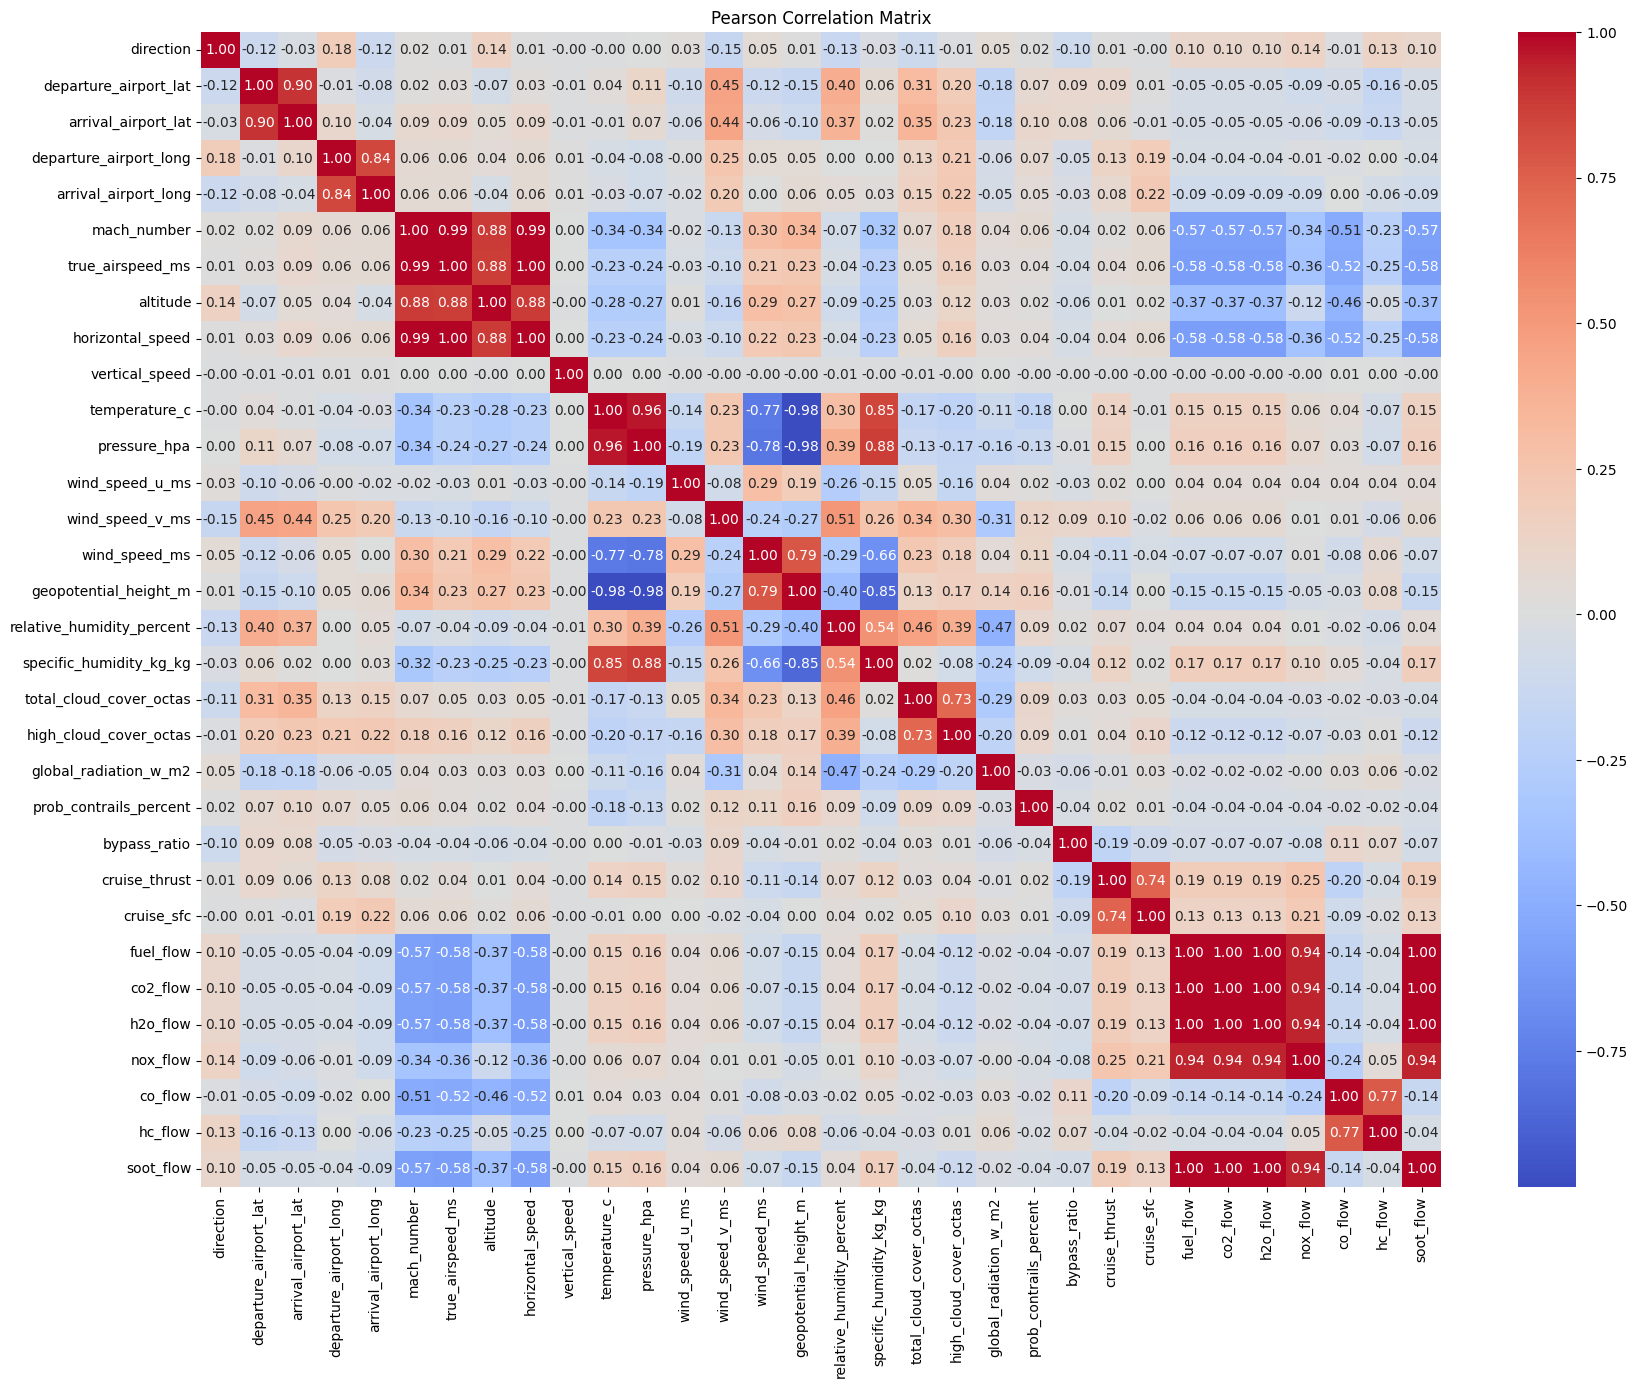

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [
    'direction',
    'departure_airport_lat',
    'arrival_airport_lat',
    'departure_airport_long',
    'arrival_airport_long',
    'mach_number', 
    'true_airspeed_ms', 
    'altitude', 
    'horizontal_speed',
    'vertical_speed', 
    'temperature_c', 
    'pressure_hpa', 
    'wind_speed_u_ms', 
    'wind_speed_v_ms',
    'wind_speed_ms', 
    'geopotential_height_m', 
    'relative_humidity_percent', 
    'specific_humidity_kg_kg', 
    'total_cloud_cover_octas', 
    'high_cloud_cover_octas',
    'global_radiation_w_m2',
    'prob_contrails_percent',  # Existing features
    
    # Newly added numerical features:
    'bypass_ratio',            # Engine bypass ratio
    'cruise_thrust',           # Thrust during cruise
    'cruise_sfc',              # Specific fuel consumption during cruise
    'fuel_flow',               # Fuel flow rate in kg/s
    'co2_flow',                # CO2 emissions flow rate in g/s
    'h2o_flow',                # H2O emissions flow rate in g/s
    'nox_flow',                # NOx emissions flow rate in g/s
    'co_flow',                 # CO emissions flow rate in g/s
    'hc_flow',                 # HC emissions flow rate in g/s
    'soot_flow'                # Soot emissions flow rate in g/s
]

#let's plot the pearson correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_df[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Matrix")

In [5]:
# Step 1: Define the columns to keep based on the analysis
training_columns = [
    
    # Static Flight Information
    'route', 'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long',
    
    # Flight Characteristics and Dynamics
    'altitude', 'latitude', 'longitude', 'vertical_speed', 'mach_number', 'fuel_flow', 'direction', 'flight_phase',

    # Meteorological and Atmospheric Features
    'temperature_c', 'relative_humidity_percent', 'specific_humidity_kg_kg', 'pressure_hpa',
    'wind_speed_u_ms', 'wind_speed_v_ms', 'total_cloud_cover_octas', 'global_radiation_w_m2',

    # Contrail Formation and Prediction
    'prob_contrails_percent', 'contrails_formation'
]

# Step 2: Filter the dataframe to retain only these columns
filtered_df = filtered_df[training_columns]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered_df.head(10)) 

route  departure_airport_lat  \
current_flight_time                                                 
2024-09-14 08:59:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:00:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:01:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:02:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:03:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:04:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:05:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:06:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:07:00  Athens - Thessaloniki              37.936401   
2024-09-14 09:08:00  Athens - Thessaloniki              37.936401   

                     departure_airport_long  arrival_airport_lat  \
current_flight_time                                                
2024-09-14 08:59:00                 23.9445            40.519699   
2024-09-14 09:00:00                 23.9445            40.519699   
2024-09-14 09:01:00                 23.9445            40.519699   
2024-09-14 09:02:00                 23.9445            40.519699   
2024-09-14 09:03:00                 23.9445            40.519699   
2024-09-14 09:04:00                 23.9445            40.519699   
2024-09-14 09:05:00                 23.9445            40.519699   
2024-09-14 09:06:00                 23.9445            40.519699   
2024-09-14 09:07:00                 23.9445            40.519699   
2024-09-14 09:08:00                 23.9445            40.519699   

                     arrival_airport_long  altitude  latitude  longitude  \
current_flight_time                                                        
2024-09-14 08:59:00               22.9709    944.88  37.88970  23.921300   
2024-09-14 09:00:00               22.9709    944.88  37.97228  23.917733   
2024-09-14 09:01:00               22.9709    944.88  38.05486  23.914167   
2024-09-14 09:02:00               22.9709    944.88  38.13744  23.910600   
2024-09-14 09:03:00               22.9709    944.88  38.22002  23.907033   
2024-09-14 09:04:00               22.9709    944.88  38.30260  23.903467   
2024-09-14 09:05:00               22.9709    944.88  38.38518  23.899900   
2024-09-14 09:06:00               22.9709    944.88  38.46776  23.896333   
2024-09-14 09:07:00               22.9709    944.88  38.55034  23.892767   
2024-09-14 09:08:00               22.9709    944.88  38.63292  23.889200   

                     vertical_speed  mach_number  fuel_flow  direction  \
current_flight_time                                                      
2024-09-14 08:59:00             0.0     1.073931   1.096479      208.0   
2024-09-14 09:00:00             0.0     1.182669   0.996109      208.0   
2024-09-14 09:01:00             0.0     1.291407   0.900383      208.0   
2024-09-14 09:02:00             0.0     1.400145   0.809097      208.0   
2024-09-14 09:03:00             0.0     1.508883   0.722035      208.0   
2024-09-14 09:04:00             0.0     1.617621   0.638971      208.0   
2024-09-14 09:05:00             0.0     1.726359   0.559672      208.0   
2024-09-14 09:06:00             0.0     1.835097   0.483907      208.0   
2024-09-14 09:07:00             0.0     1.943836   0.411444      208.0   
2024-09-14 09:08:00             0.0     2.052574   0.342058      208.0   

                    flight_phase  temperature_c  relative_humidity_percent  \
current_flight_time                                                          
2024-09-14 08:59:00       cruise            2.5                       16.2   
2024-09-14 09:00:00       cruise            2.5                       16.2   
2024-09-14 09:01:00       cruise            2.5                       16.2   
2024-09-14 09:02:00       cruise            2.5                       16.2   
2024-09-14 09:03:00       cruise            2.5                       16.2   
2024-09-14 09:04:00       cruise           

Text(0.5, 1.0, 'Pearson Correlation Matrix')

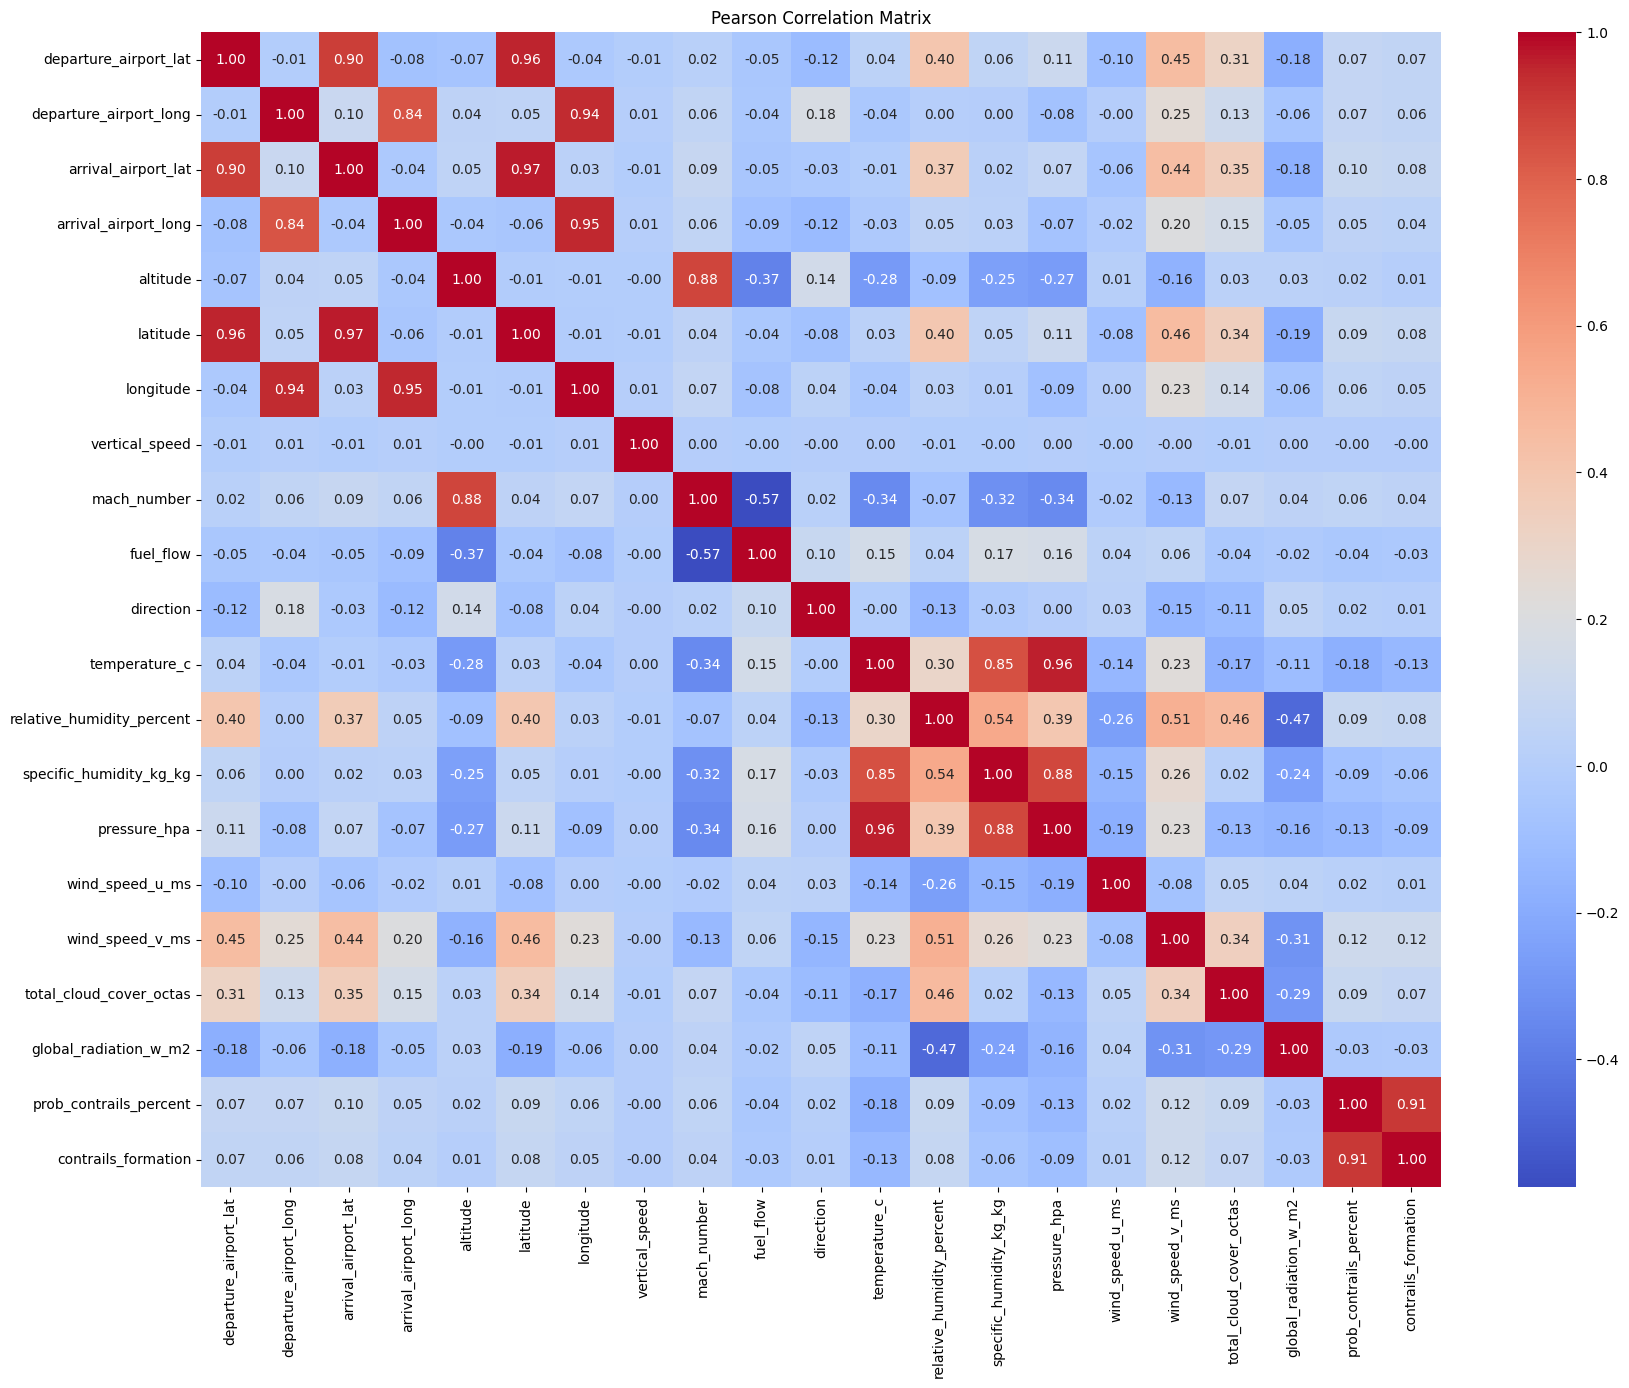

In [6]:
numerical_training_columns = [
    
    # Static Flight Information
    'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long',
    
    # Flight Characteristics and Dynamics
    'altitude', 'latitude', 'longitude', 'vertical_speed', 'mach_number', 'fuel_flow', 'direction',

    # Meteorological and Atmospheric Features
    'temperature_c', 'relative_humidity_percent', 'specific_humidity_kg_kg', 'pressure_hpa',
    'wind_speed_u_ms', 'wind_speed_v_ms', 'total_cloud_cover_octas', 'global_radiation_w_m2',

    # Contrail Formation and Prediction
    'prob_contrails_percent', 'contrails_formation'
]

#let's plot the pearson correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_df[numerical_training_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Matrix")

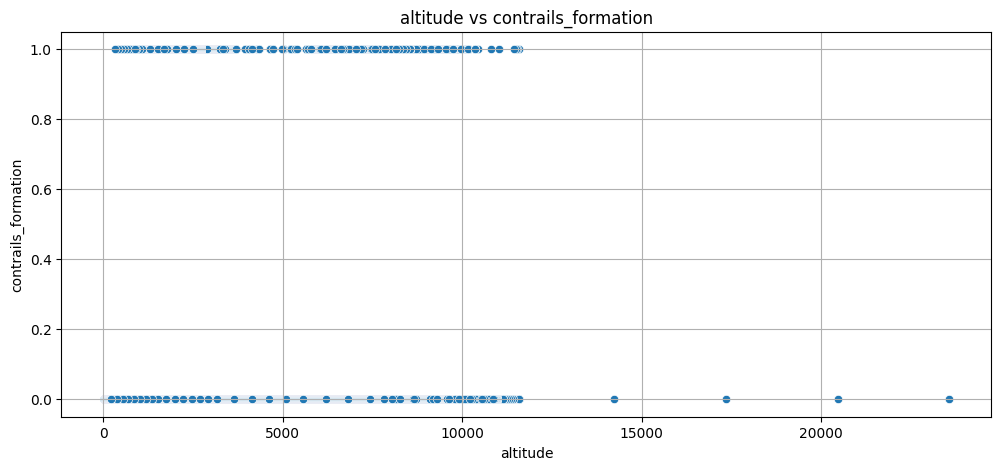

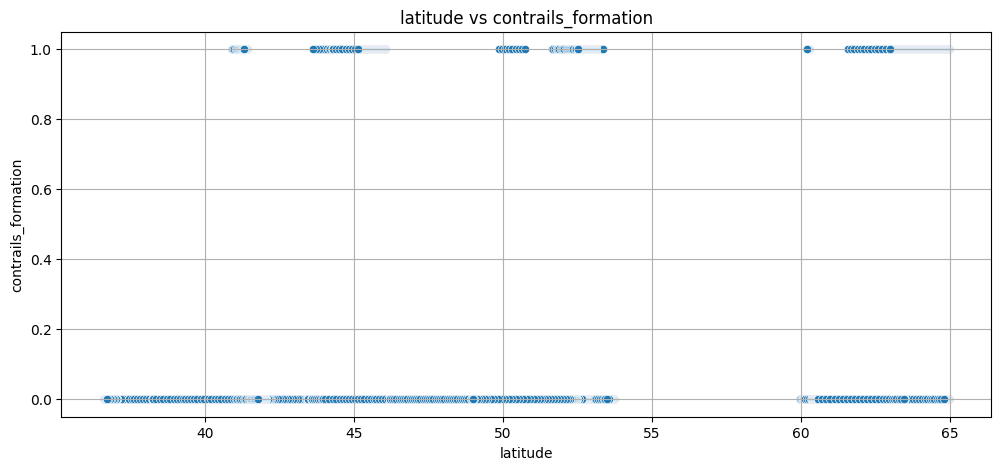

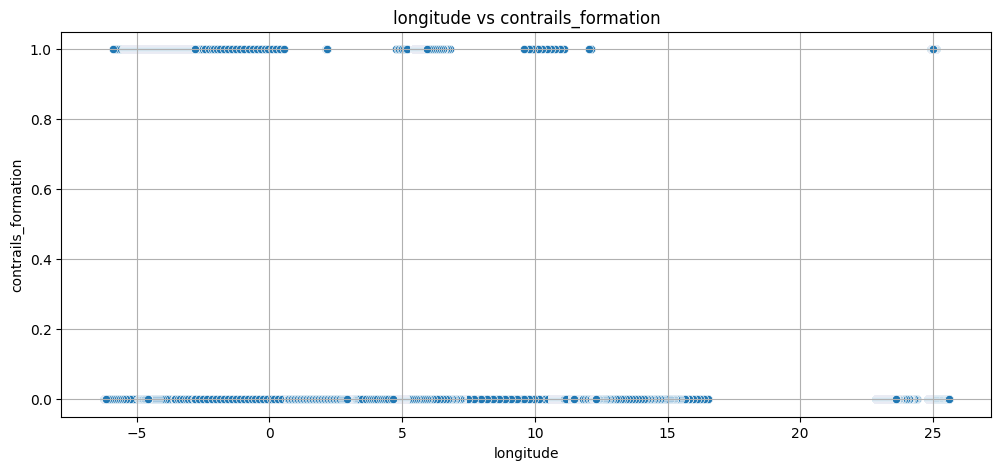

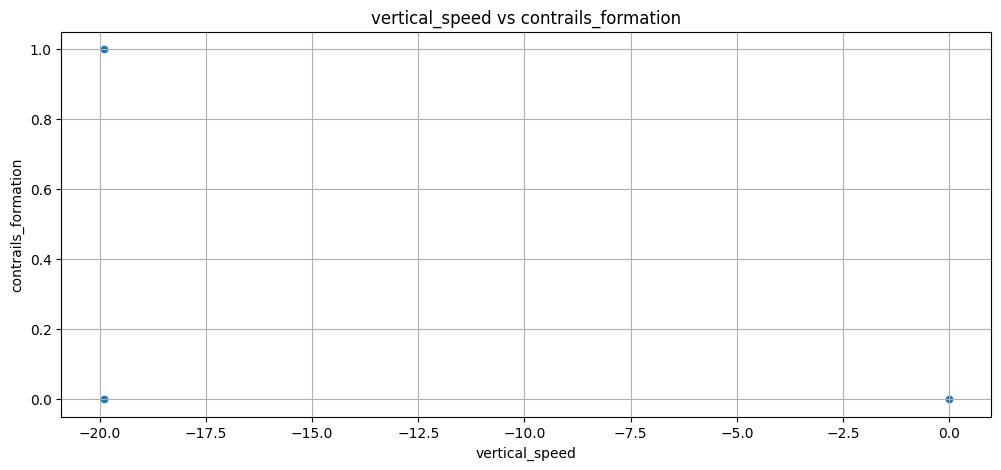

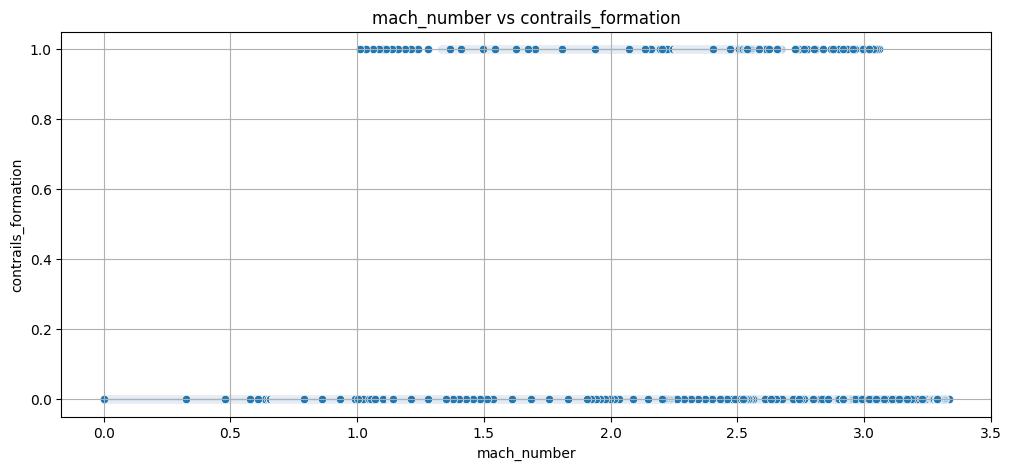

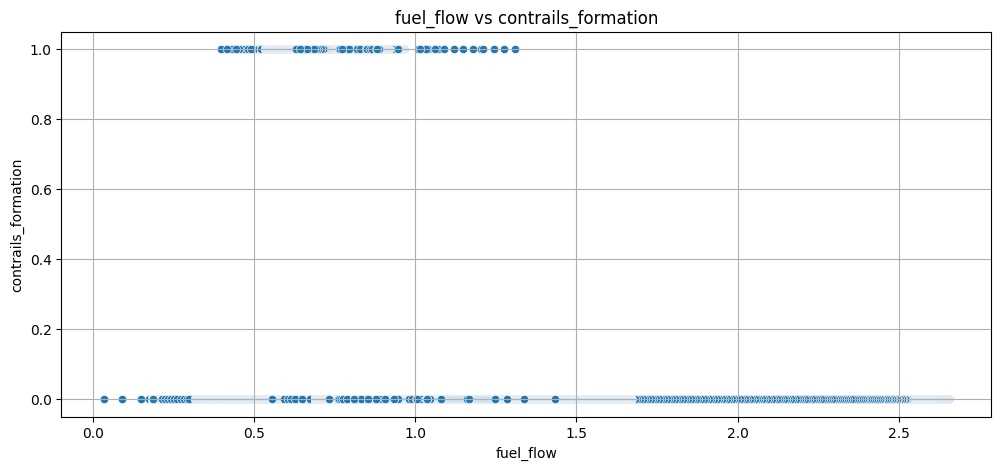

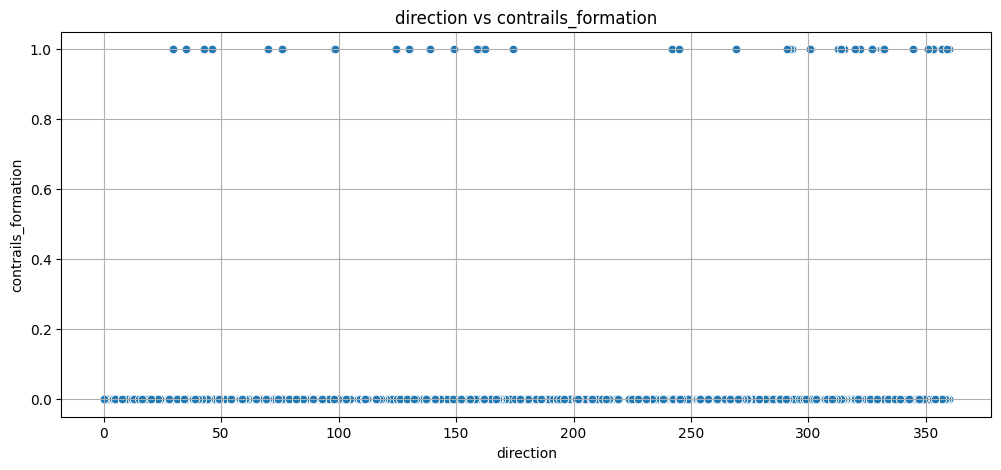

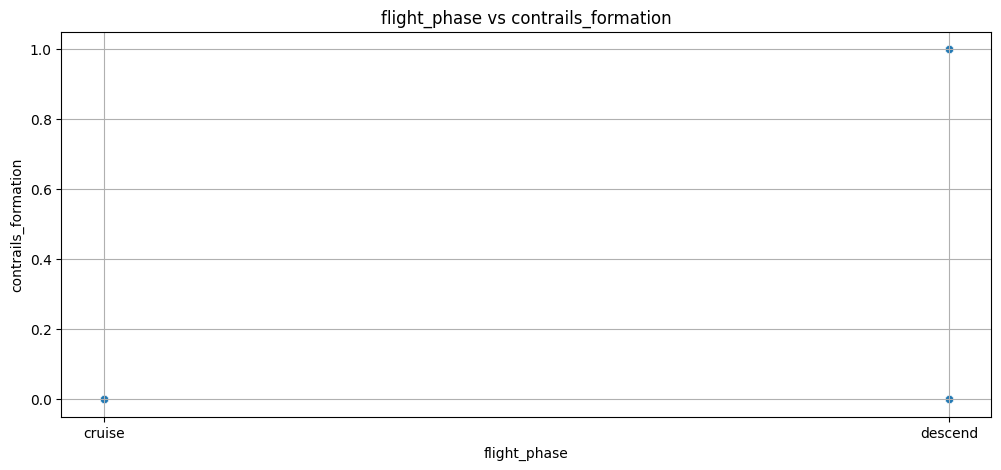

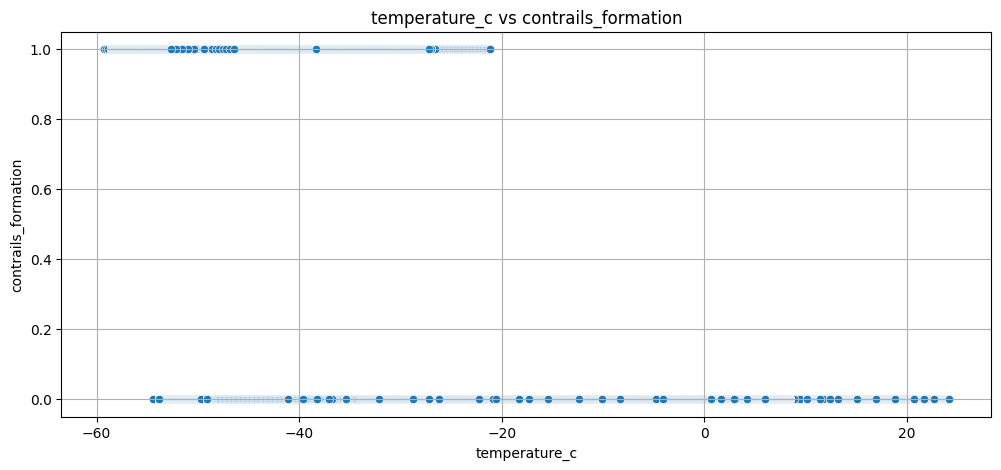

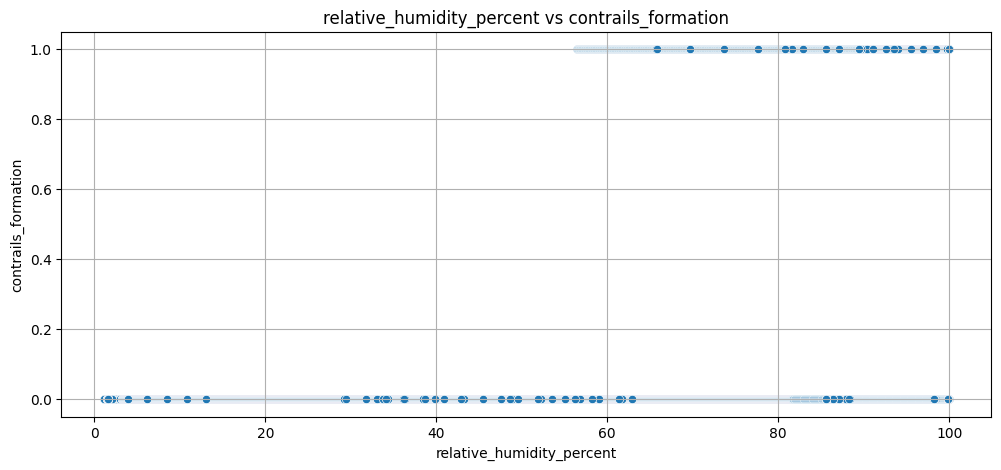

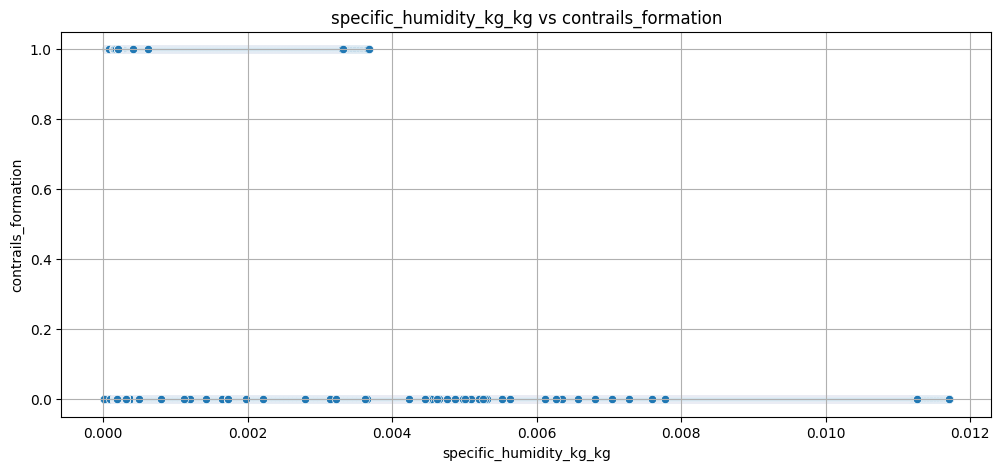

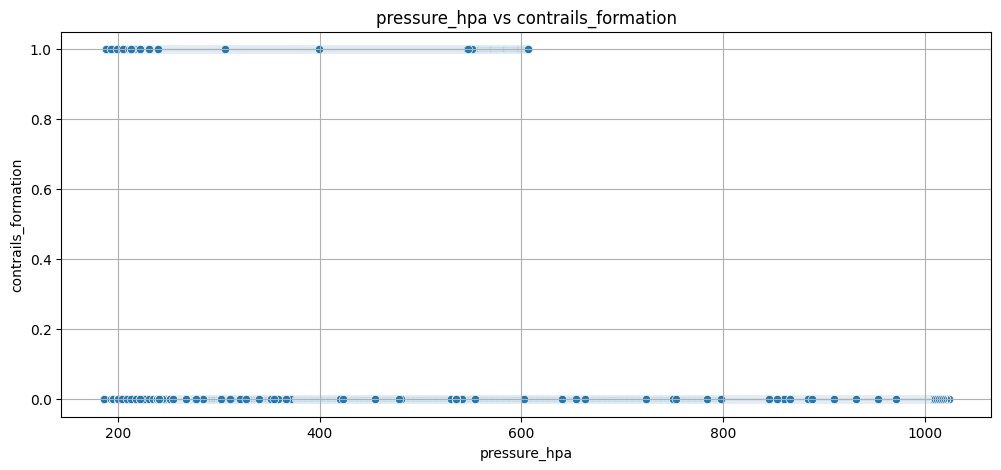

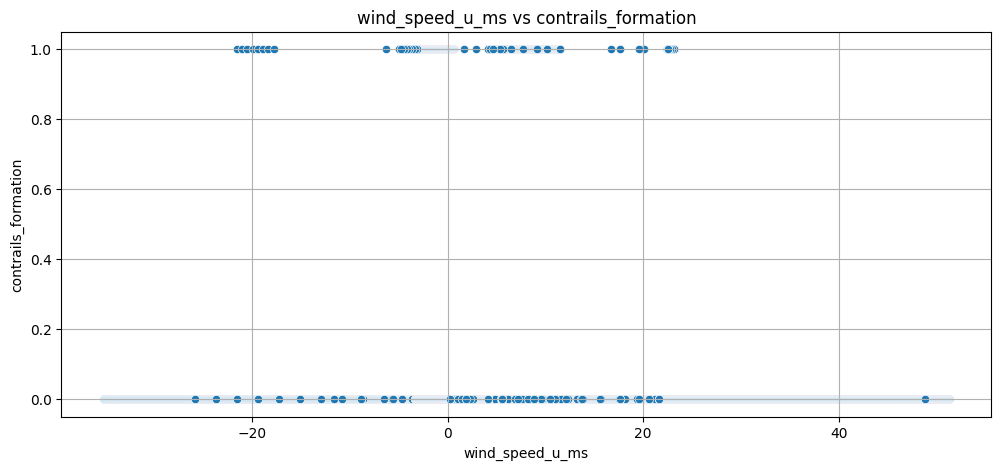

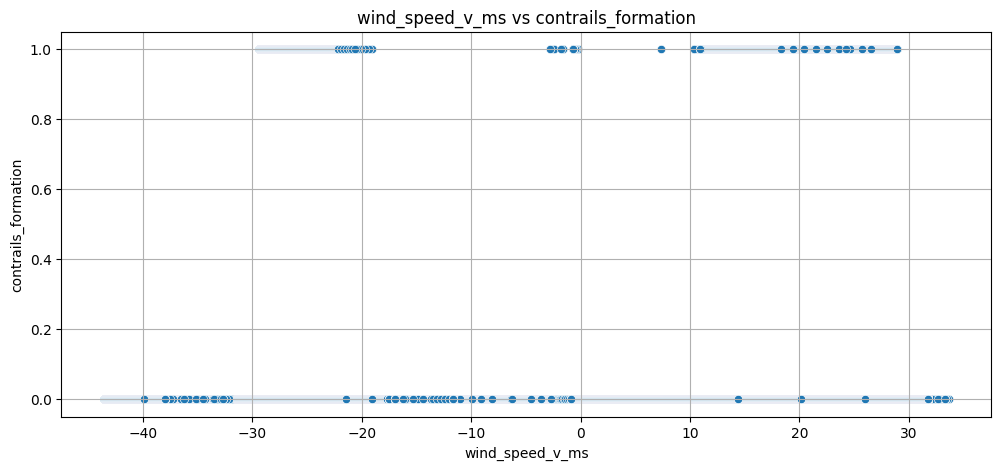

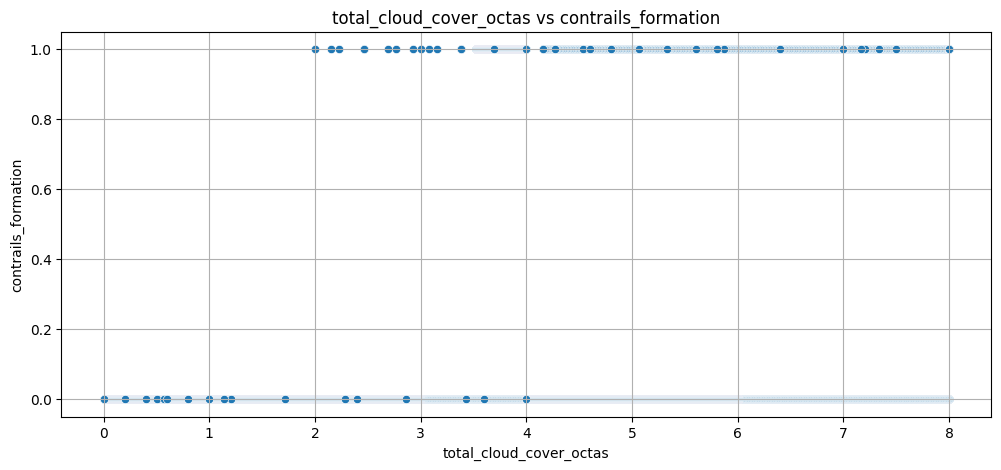

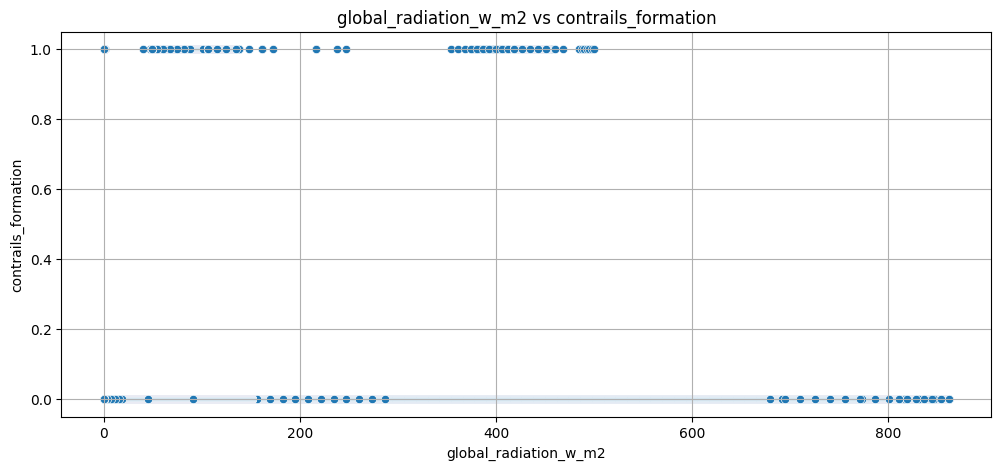

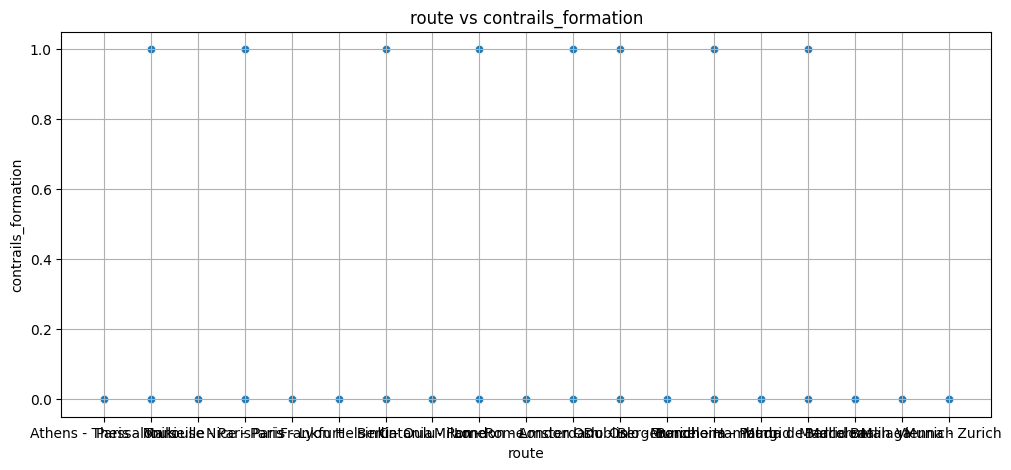

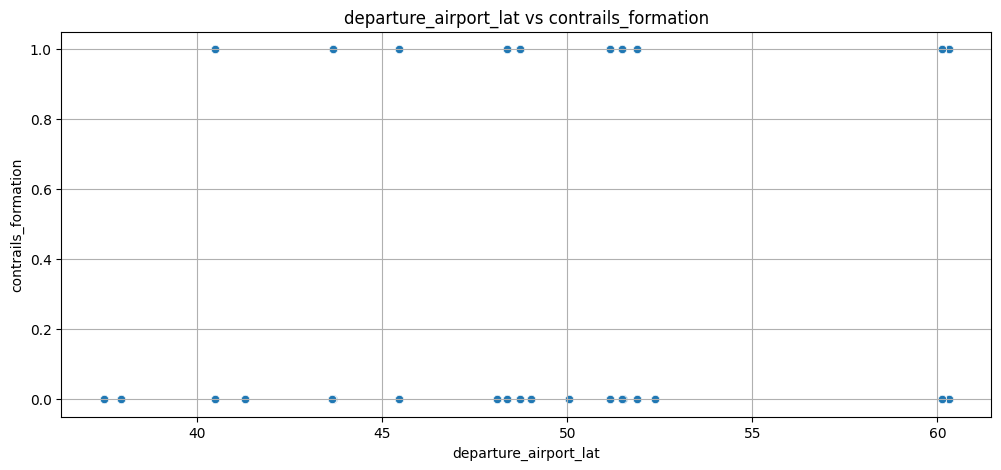

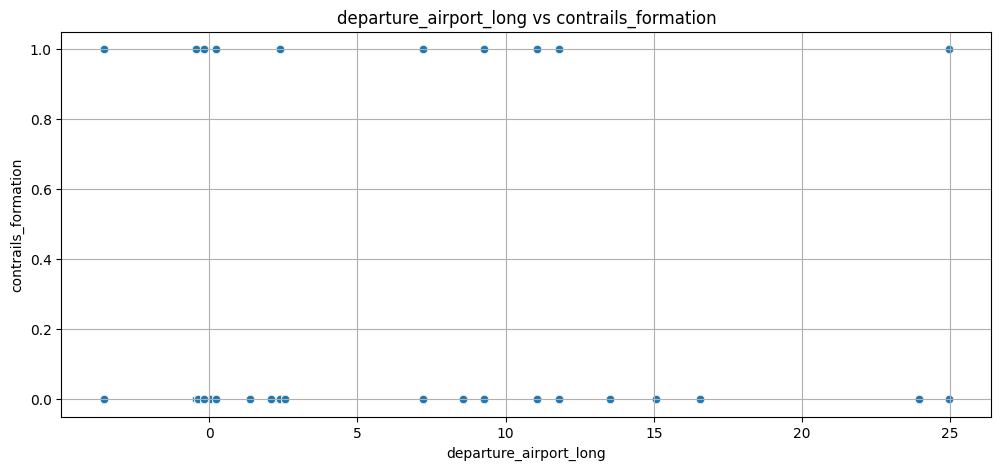

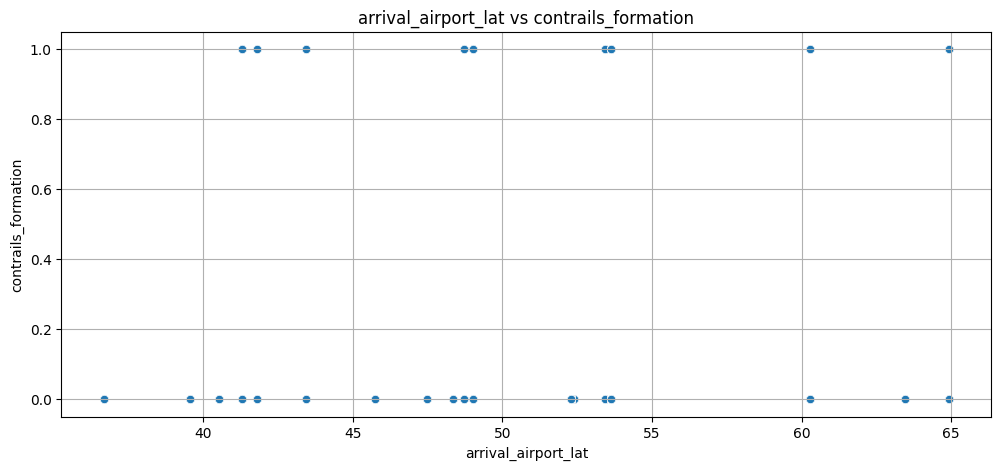

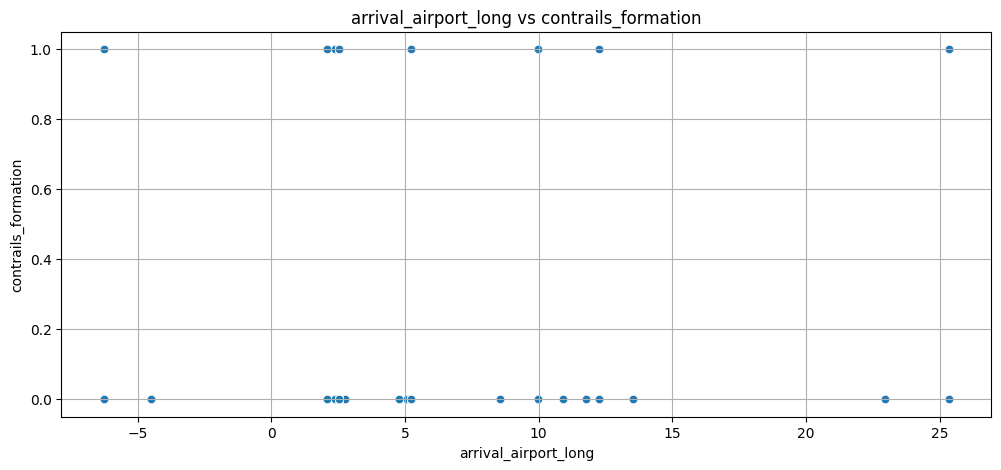

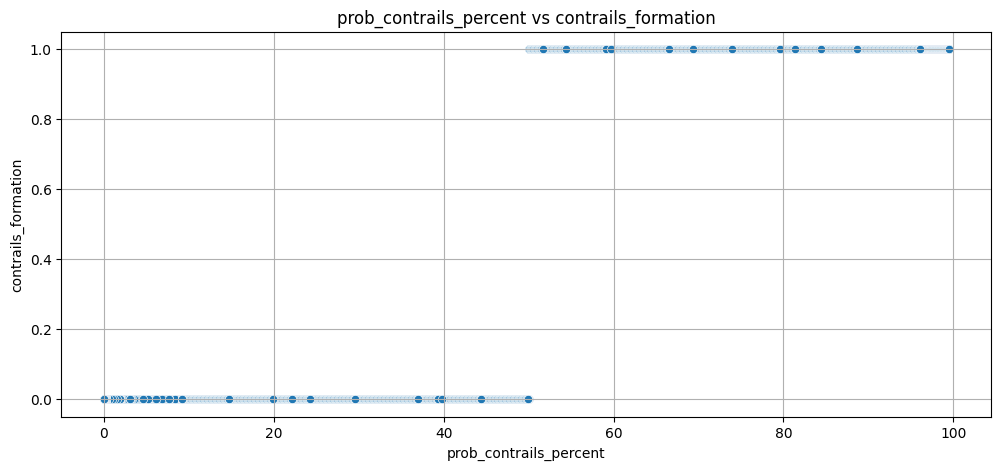

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe with the target variable 'contrails_formation'
def plot_pairwise_features_with_target(df, target_variable='contrails_formation', numerical_training_columns=None):
    """
    Plots scatter plots of each feature against the target variable.

    Parameters:
    - df: pd.DataFrame, DataFrame containing the features and target
    - target_variable: str, name of the target variable
    - columns_to_keep: list of str, features to keep for pairwise plotting
    """

    # Iterate through each feature and plot against the target
    for feature in numerical_training_columns:
        plt.figure(figsize=(12, 5))

        # Scatter plot for numerical variables
        sns.scatterplot(data=df, x=feature, y=target_variable)
        
        # Add title and labels
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.grid(True)

        # Show plot
        plt.show()

# Replace 'your_dataframe' with your actual dataframe variable
numerical_training_columns = [
    'altitude', 'latitude', 'longitude', 'vertical_speed', 'mach_number', 'fuel_flow', 'direction', 'flight_phase',
    'temperature_c', 'relative_humidity_percent', 'specific_humidity_kg_kg', 'pressure_hpa',
    'wind_speed_u_ms', 'wind_speed_v_ms', 'total_cloud_cover_octas', 'global_radiation_w_m2',
    'route', 'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long',
    'prob_contrails_percent'
]

# Assuming your dataframe is called 'flights_data'
plot_pairwise_features_with_target(df=filtered_df, target_variable='contrails_formation', numerical_training_columns=numerical_training_columns)


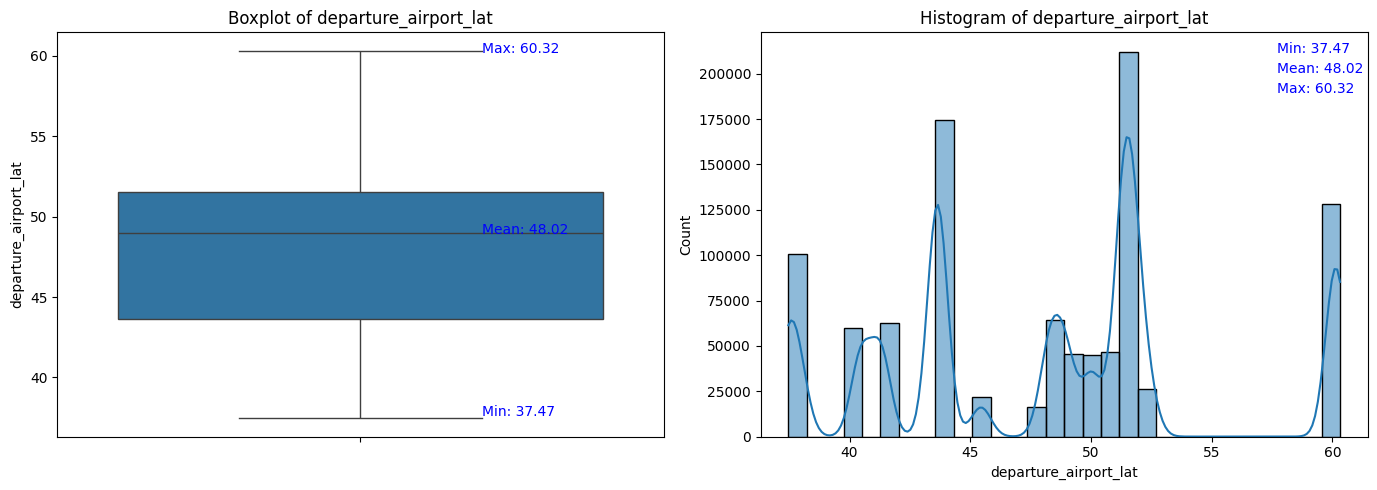

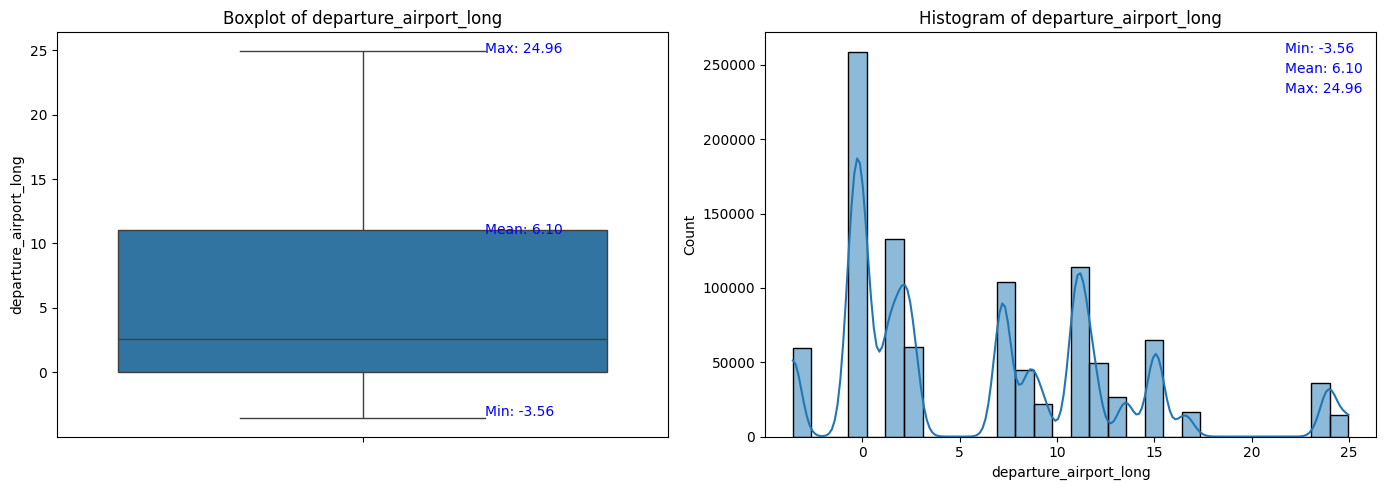

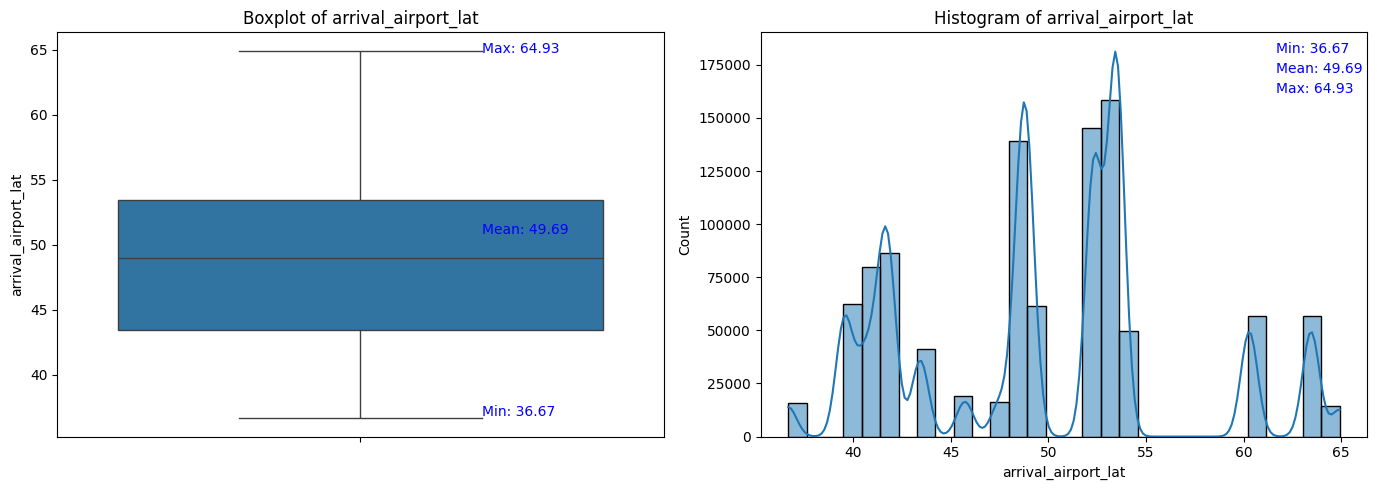

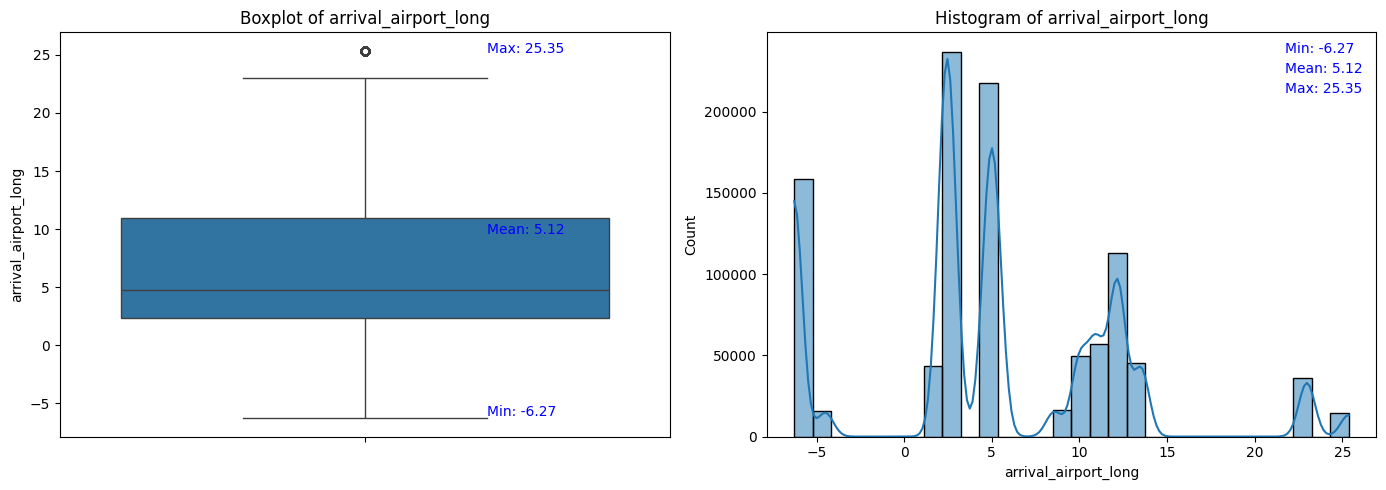

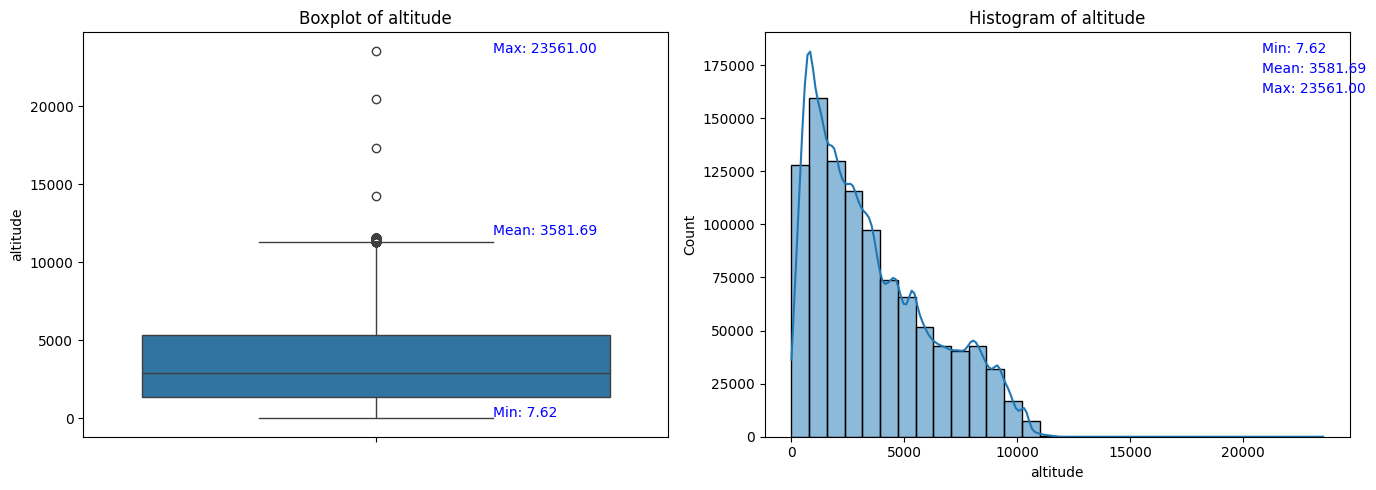

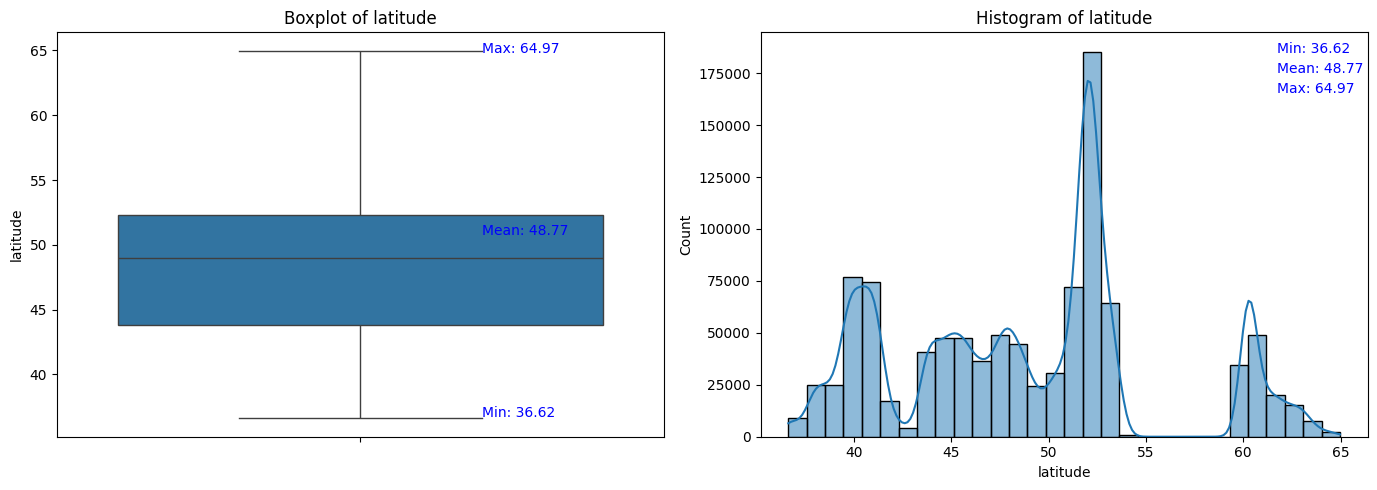

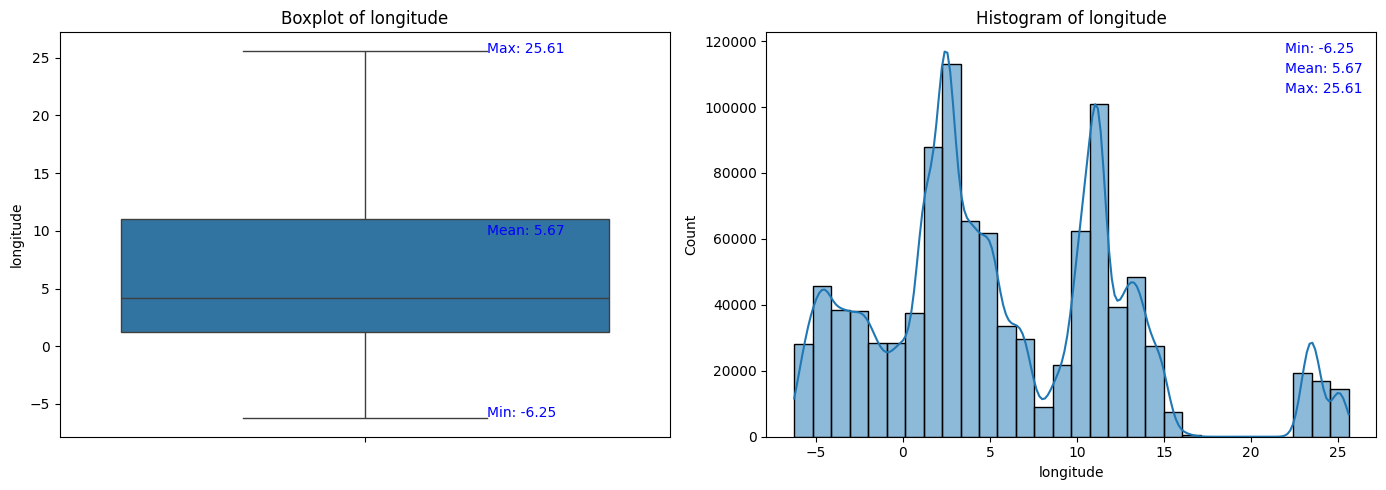

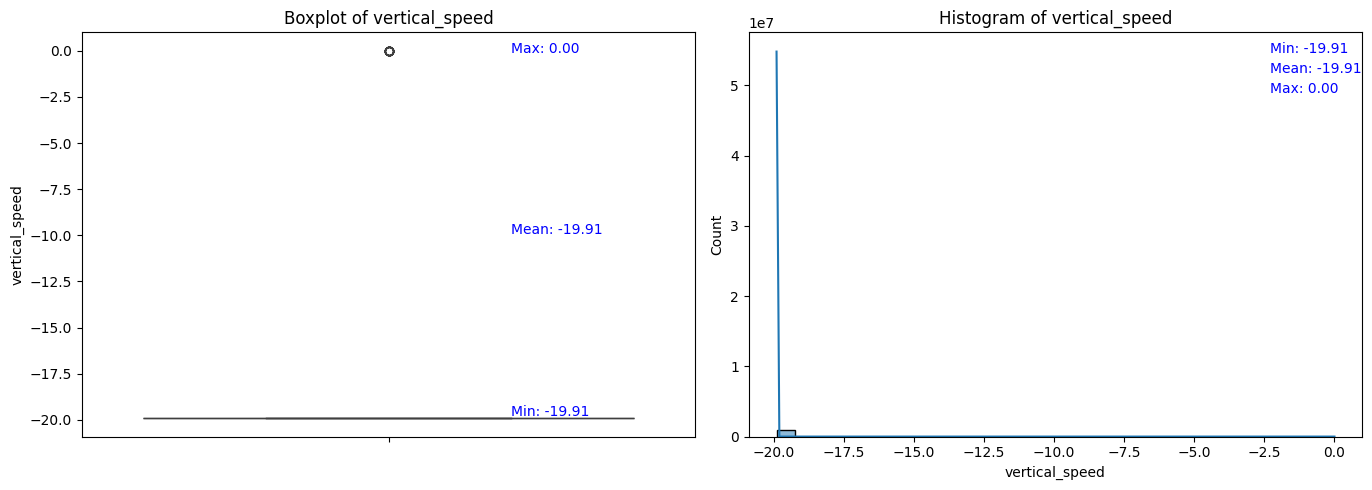

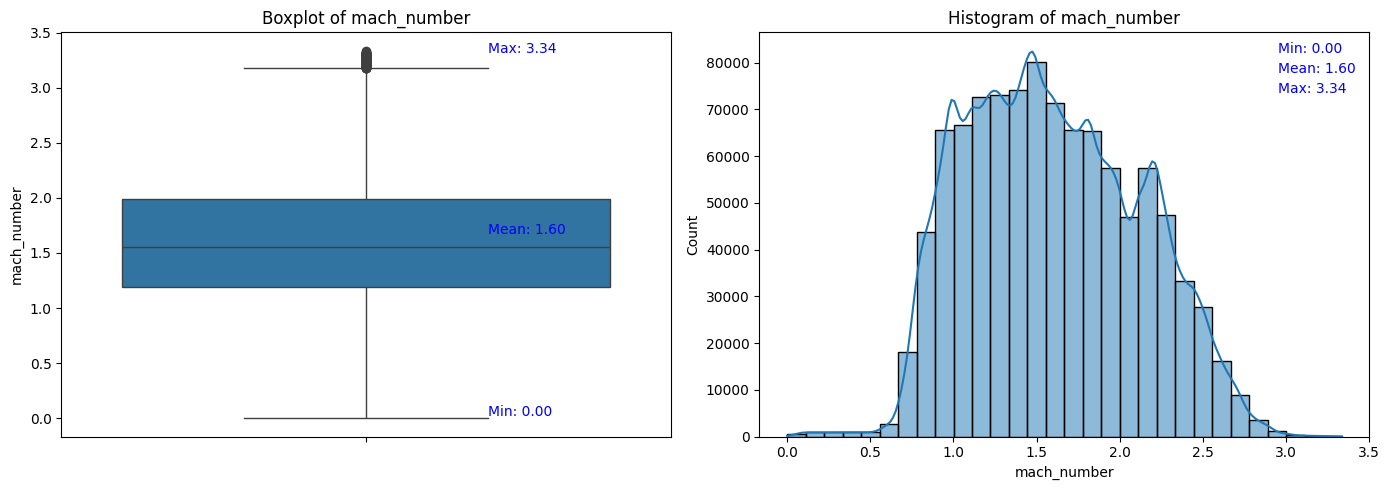

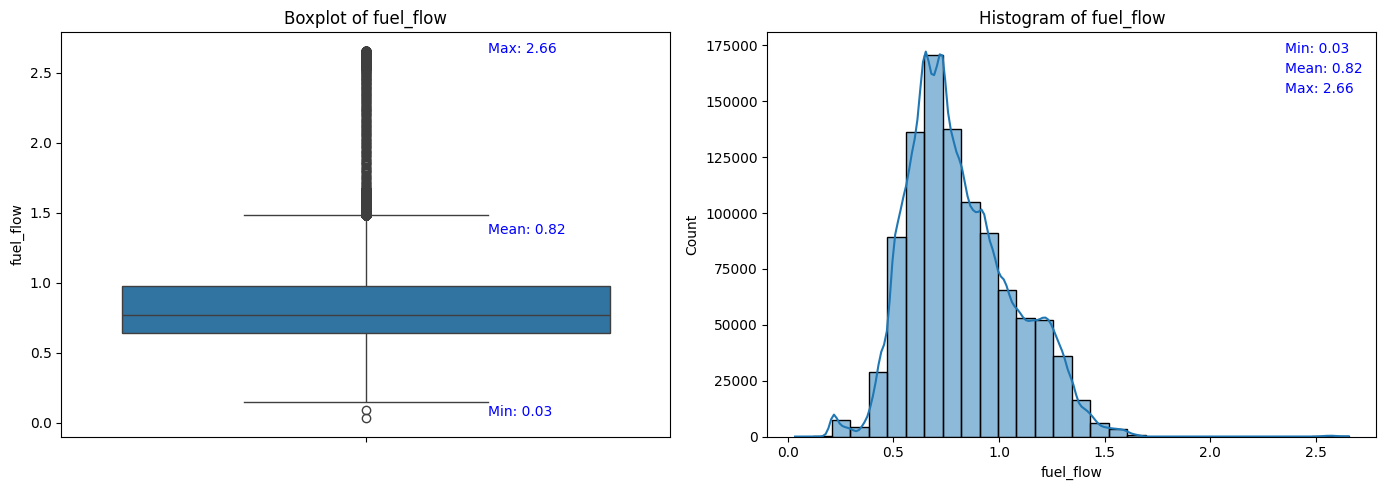

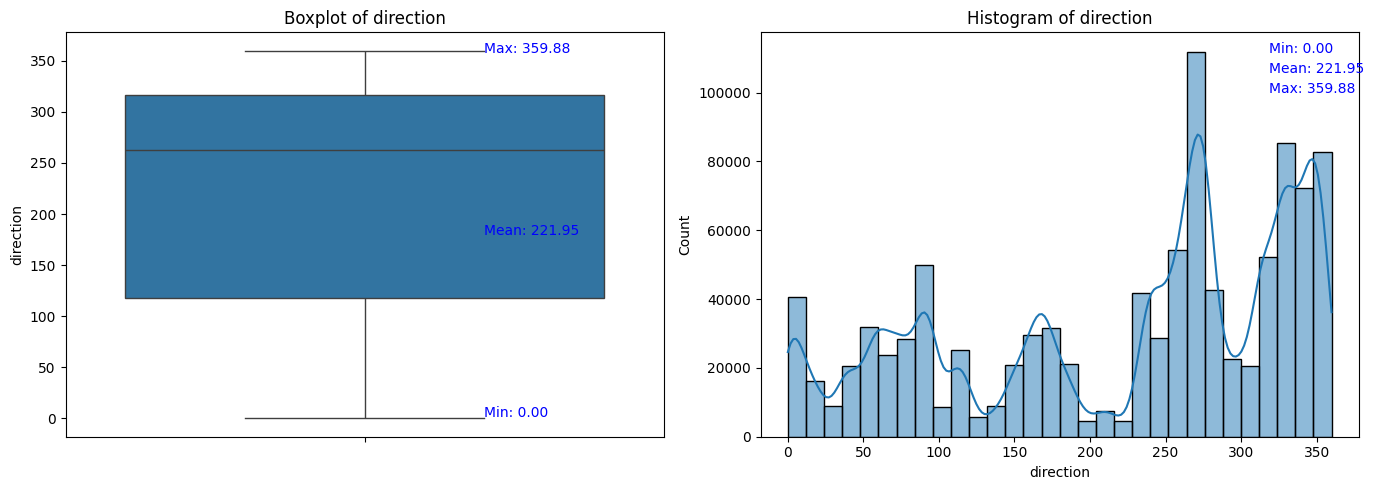

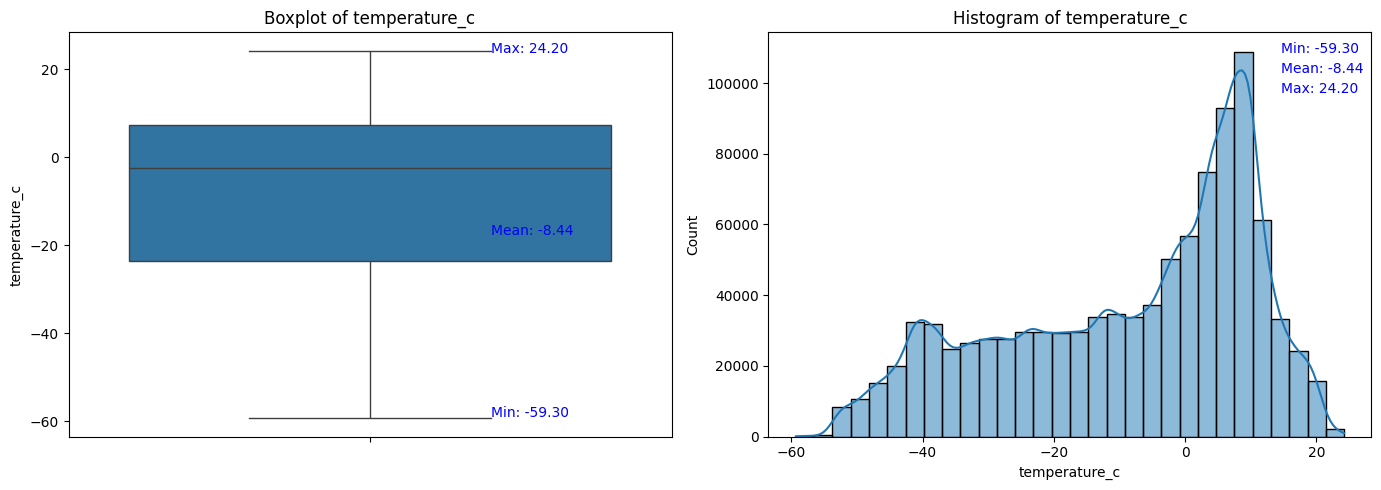

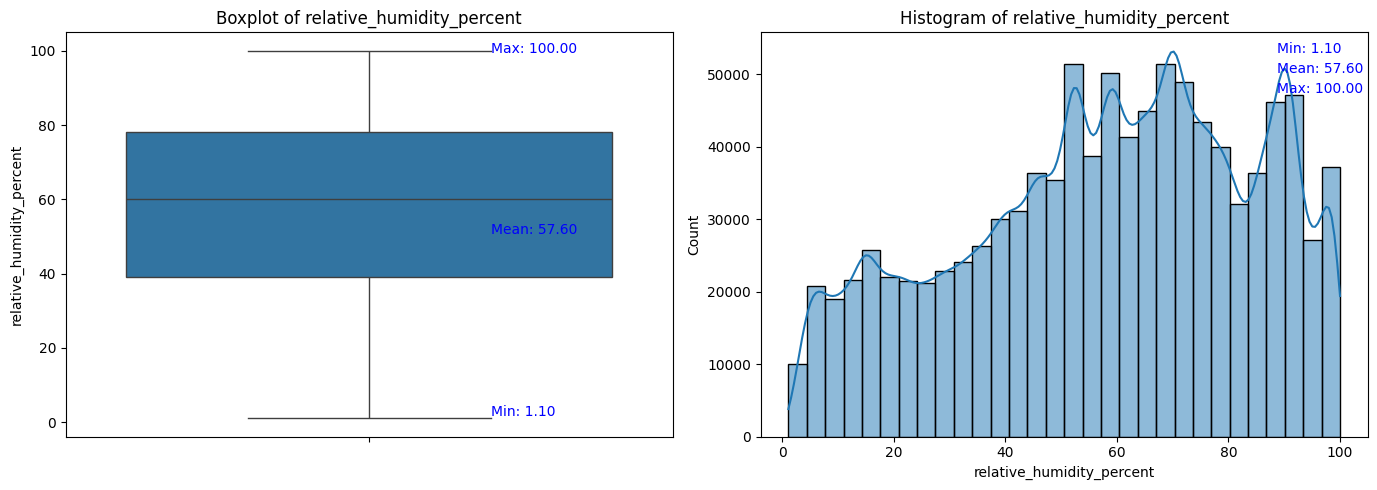

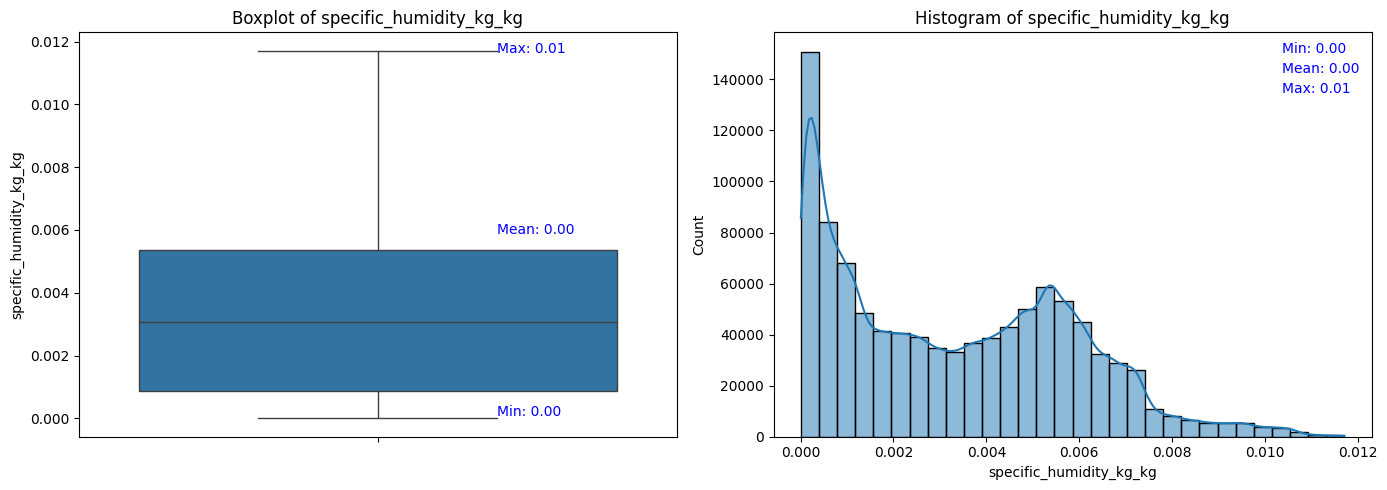

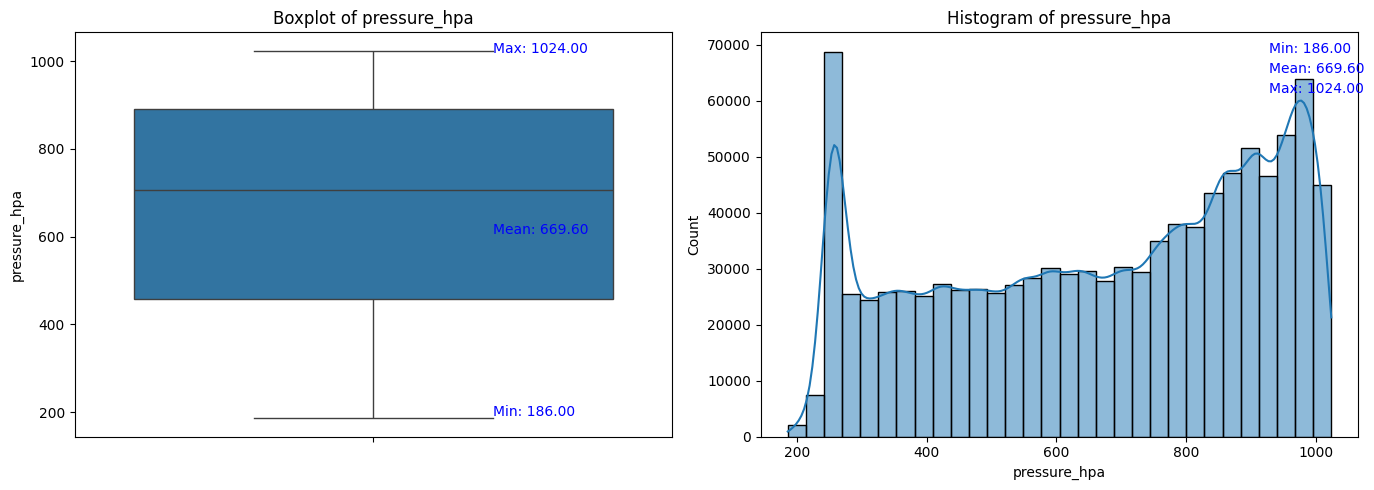

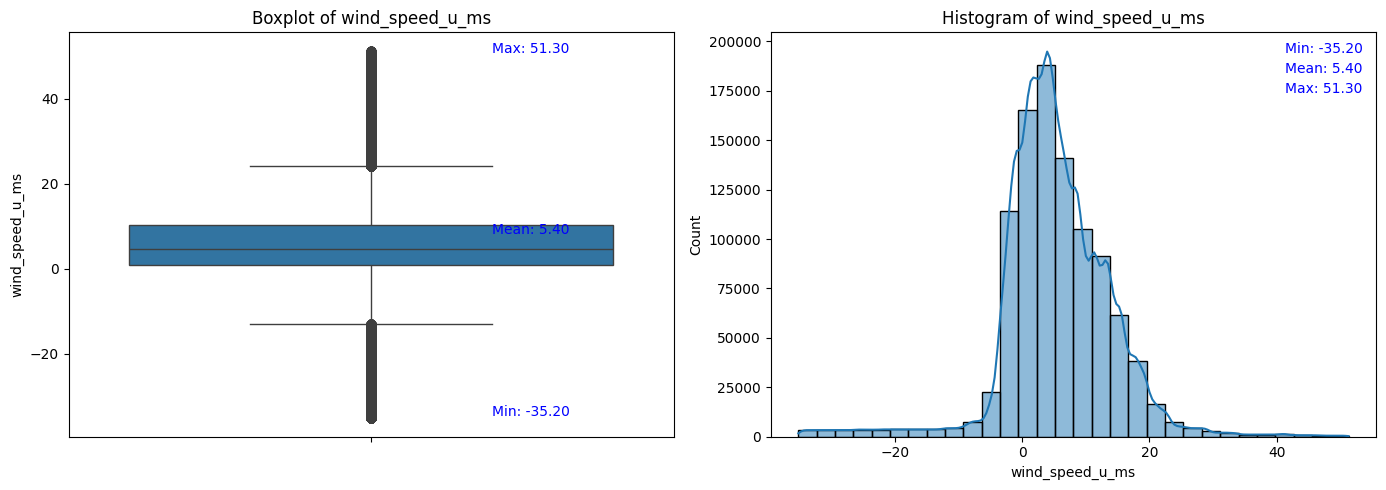

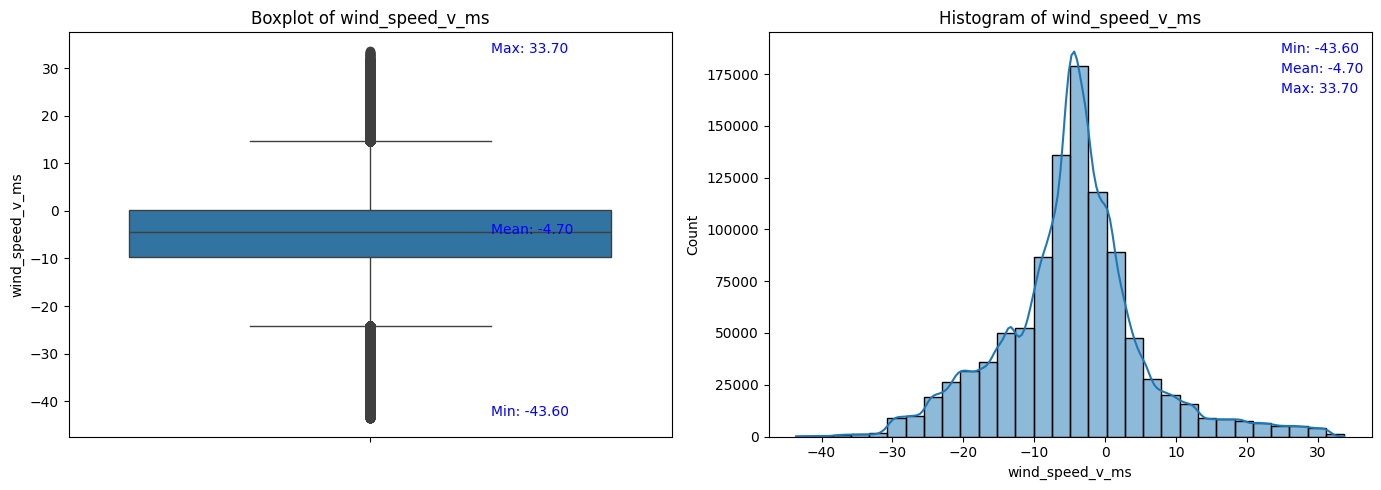

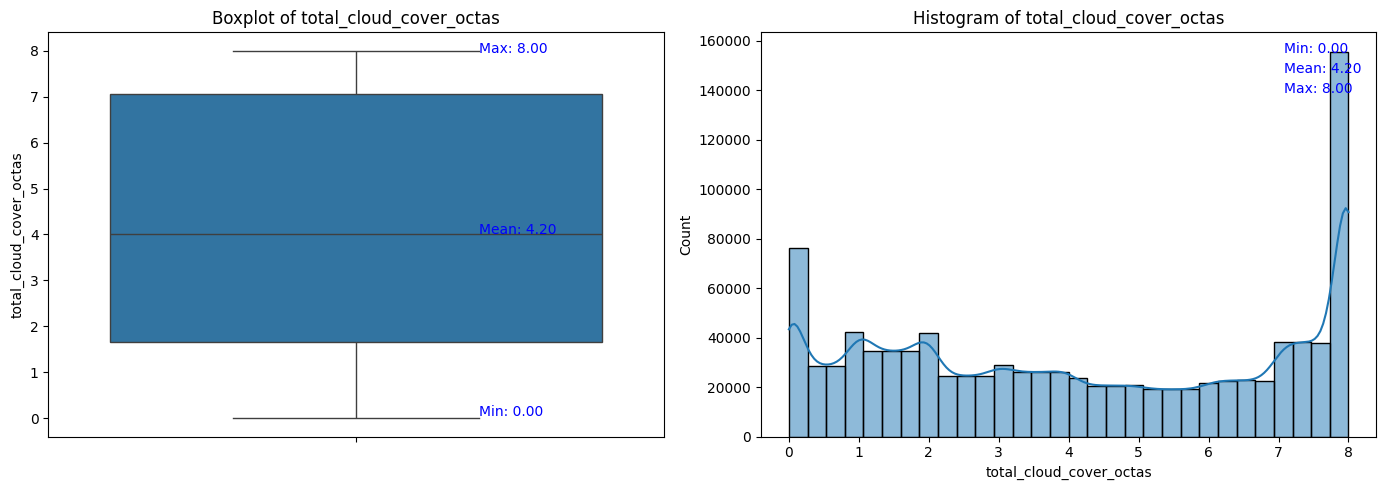

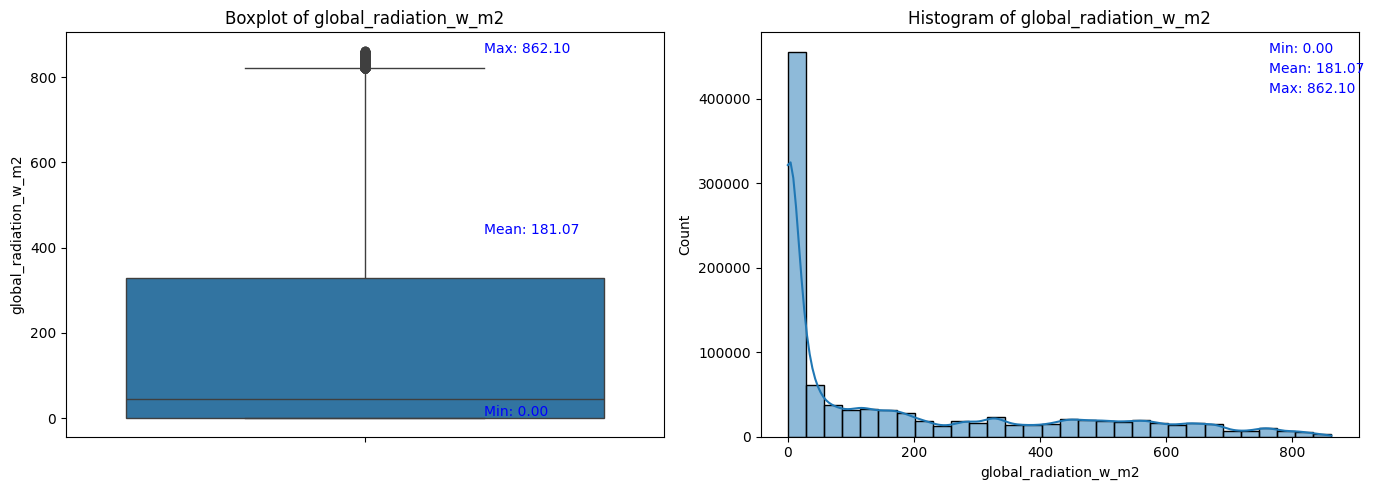

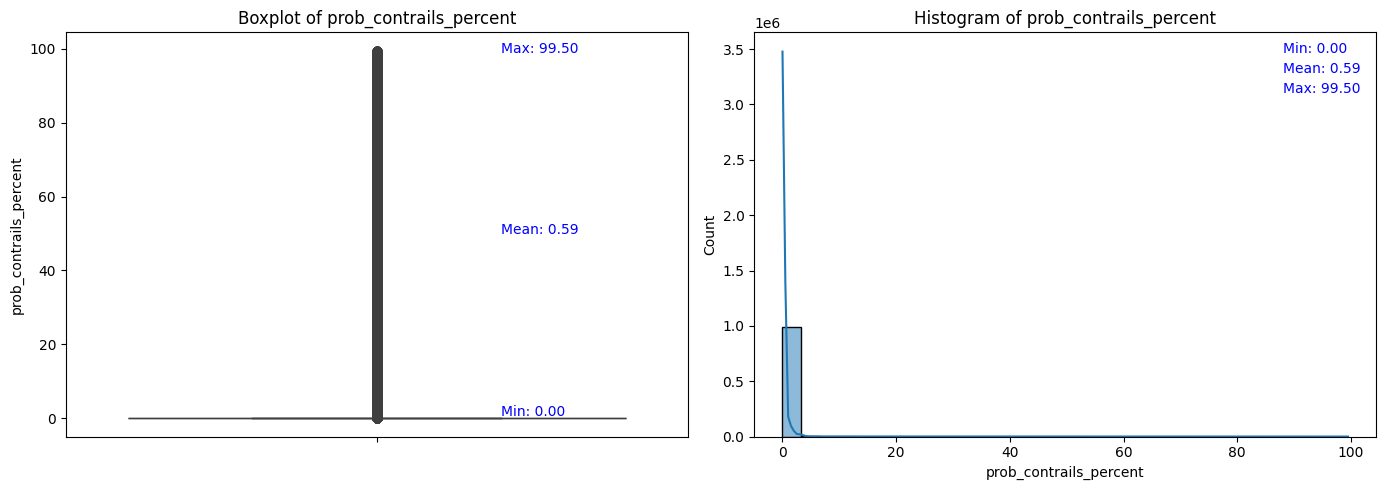

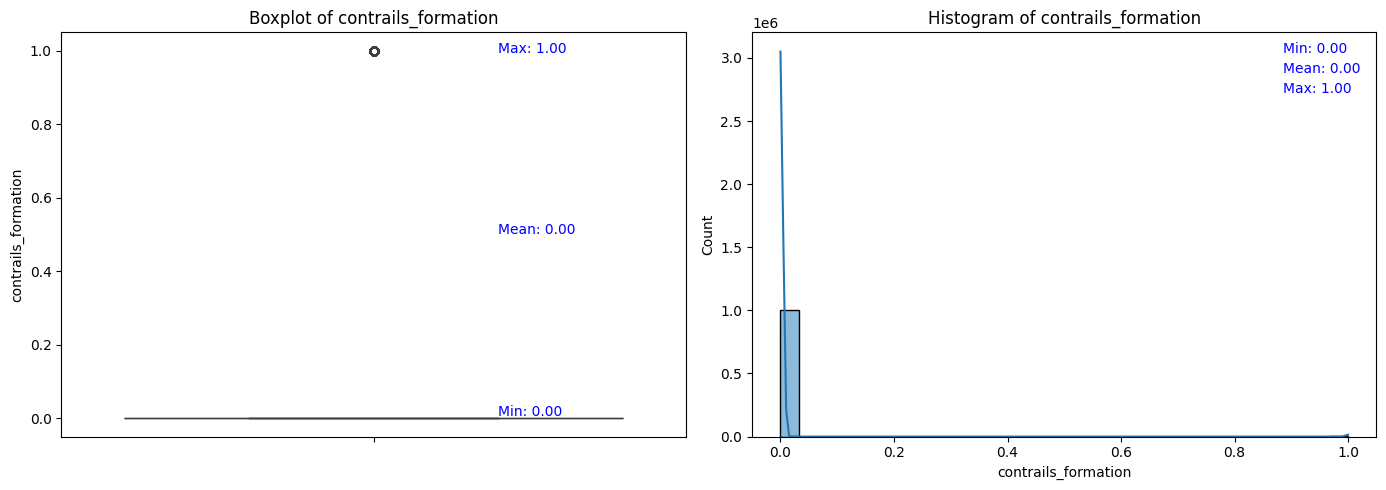

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot boxplot and histogram for each feature with legend for min, max, and mean
def plot_boxplot_and_histogram(df, columns):
    for col in columns:
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        
        # Calculate min, max, and mean
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()

        # Boxplot
        sns.boxplot(y=df[col], ax=axs[0])
        axs[0].set_title(f'Boxplot of {col}')
        axs[0].annotate(f'Min: {min_val:.2f}', xy=(0.7, 0.05), xycoords='axes fraction', color='blue')
        axs[0].annotate(f'Max: {max_val:.2f}', xy=(0.7, 0.95), xycoords='axes fraction', color='blue')
        axs[0].annotate(f'Mean: {mean_val:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', color='blue')

        # Histogram
        sns.histplot(df[col], bins=30, kde=True, ax=axs[1])
        axs[1].set_title(f'Histogram of {col}')
        axs[1].annotate(f'Min: {min_val:.2f}', xy=(0.85, 0.95), xycoords='axes fraction', color='blue')
        axs[1].annotate(f'Mean: {mean_val:.2f}', xy=(0.85, 0.90), xycoords='axes fraction', color='blue')
        axs[1].annotate(f'Max: {max_val:.2f}', xy=(0.85, 0.85), xycoords='axes fraction', color='blue')

        # Display the plots
        plt.tight_layout()
        plt.show()

numerical_training_columns = [
    
    # Static Flight Information
    'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long',
    
    # Flight Characteristics and Dynamics
    'altitude', 'latitude', 'longitude', 'vertical_speed', 'mach_number', 'fuel_flow', 'direction',

    # Meteorological and Atmospheric Features
    'temperature_c', 'relative_humidity_percent', 'specific_humidity_kg_kg', 'pressure_hpa',
    'wind_speed_u_ms', 'wind_speed_v_ms', 'total_cloud_cover_octas', 'global_radiation_w_m2',

    # Contrail Formation and Prediction
    'prob_contrails_percent', 'contrails_formation'
]

plot_boxplot_and_histogram(filtered_df, numerical_training_columns)


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load your dataset (replace with your actual dataset file)
df = filtered_df

# Define the columns for specific transformations based on analysis
columns_normalize = [
    'departure_airport_lat', 'arrival_airport_lat', 
    'departure_airport_long', 'arrival_airport_long',
    'latitude', 'longitude', 'wind_speed_u_ms', 'wind_speed_v_ms'
]

columns_standardize = [
    'altitude', 'mach_number', 'fuel_flow', 'temperature_c',
    'relative_humidity_percent', 'specific_humidity_kg_kg',
    'pressure_hpa'
]

columns_no_transformation = ['total_cloud_cover_octas', 'direction']

columns_log_transform = ['global_radiation_w_m2']

# Handling Outliers: Capping based on recommendations
outlier_cap = {
    'altitude': 15000,  # Cap altitude at 15,000 meters
    'mach_number': 2.5,  # Cap at mach 2.5
    'fuel_flow': 2.0,  # Cap fuel flow at 2.0
    'wind_speed_u_ms': [-30, 30],  # Cap wind speeds between -30 and 30 m/s
    'wind_speed_v_ms': [-30, 30],
    'temperature_c': [-50, 30],  # Range from -50°C to 30°C
    'global_radiation_w_m2': 600  # Cap at 600 W/m²
}

# Create a copy of the original dataframe to apply transformations
df_transformed = df.copy()

# Normalization using MinMaxScaler for specified columns
minmax_scaler = MinMaxScaler()
df_transformed[columns_normalize] = minmax_scaler.fit_transform(df_transformed[columns_normalize])

# Standardization using StandardScaler for specified columns
standard_scaler = StandardScaler()
df_transformed[columns_standardize] = standard_scaler.fit_transform(df_transformed[columns_standardize])

# Log Transformation for highly skewed distributions
for col in columns_log_transform:
    df_transformed[col] = np.log1p(df_transformed[col])

# Apply capping for specified outliers
for col, cap in outlier_cap.items():
    if isinstance(cap, list):
        # Apply lower and upper bounds if a range is specified
        df_transformed[col] = np.clip(df_transformed[col], cap[0], cap[1])
    else:
        # If a single cap value is provided, only apply upper limit
        df_transformed[col] = np.where(df_transformed[col] > cap, cap, df_transformed[col])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_transformed.head(10))

# Save the transformed dataset for further use
df_transformed.to_csv("transformed_dataset_analysis.csv", index=True)

print("Data transformation based on detailed analysis complete!")


route  departure_airport_lat  \
current_flight_time                                                 
2024-09-14 08:59:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:00:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:01:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:02:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:03:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:04:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:05:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:06:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:07:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:08:00  Athens - Thessaloniki               0.020551   

                     departure_airport_long  arrival_airport_lat  \
current_flight_time                                                
2024-09-14 08:59:00                0.964285             0.136074   
2024-09-14 09:00:00                0.964285             0.136074   
2024-09-14 09:01:00                0.964285             0.136074   
2024-09-14 09:02:00                0.964285             0.136074   
2024-09-14 09:03:00                0.964285             0.136074   
2024-09-14 09:04:00                0.964285             0.136074   
2024-09-14 09:05:00                0.964285             0.136074   
2024-09-14 09:06:00                0.964285             0.136074   
2024-09-14 09:07:00                0.964285             0.136074   
2024-09-14 09:08:00                0.964285             0.136074   

                     arrival_airport_long  altitude  latitude  longitude  \
current_flight_time                                                        
2024-09-14 08:59:00              0.924625 -0.998965  0.044906   0.946964   
2024-09-14 09:00:00              0.924625 -0.998965  0.047818   0.946853   
2024-09-14 09:01:00              0.924625 -0.998965  0.050731   0.946741   
2024-09-14 09:02:00              0.924625 -0.998965  0.053643   0.946629   
2024-09-14 09:03:00              0.924625 -0.998965  0.056555   0.946517   
2024-09-14 09:04:00              0.924625 -0.998965  0.059467   0.946405   
2024-09-14 09:05:00              0.924625 -0.998965  0.062379   0.946293   
2024-09-14 09:06:00              0.924625 -0.998965  0.065291   0.946181   
2024-09-14 09:07:00              0.924625 -0.998965  0.068204   0.946069   
2024-09-14 09:08:00              0.924625 -0.998965  0.071116   0.945957   

                     vertical_speed  mach_number  fuel_flow  direction  \
current_flight_time                                                      
2024-09-14 08:59:00             0.0    -1.026692   1.103987      208.0   
2024-09-14 09:00:00             0.0    -0.814249   0.704471      208.0   
2024-09-14 09:01:00             0.0    -0.601807   0.323439      208.0   
2024-09-14 09:02:00             0.0    -0.389364  -0.039917      208.0   
2024-09-14 09:03:00             0.0    -0.176921  -0.386462      208.0   
2024-09-14 09:04:00             0.0     0.035521  -0.717095      208.0   
2024-09-14 09:05:00             0.0     0.247964  -1.032738      208.0   
2024-09-14 09:06:00             0.0     0.460406  -1.334317      208.0   
2024-09-14 09:07:00             0.0     0.672849  -1.622750      208.0   
2024-09-14 09:08:00             0.0     0.885291  -1.898936      208.0   

                    flight_phase  temperature_c  relative_humidity_percent  \
current_flight_time                                                          
2024-09-14 08:59:00       cruise        0.57337                  -1.604985   
2024-09-14 09:00:00       cruise        0.57337                  -1.604985   
2024-09-14 09:01:00       cruise        0.57337                  -1.604985   
2024-09-14 09:02:00       cruise        0.57337                  -1.604985   
2024-09-14 09:03:00       cruise        0.57337                  -1.604985   
2024-09-14 09:04:00       cruise        0.5

Data transformation based on detailed analysis complete!


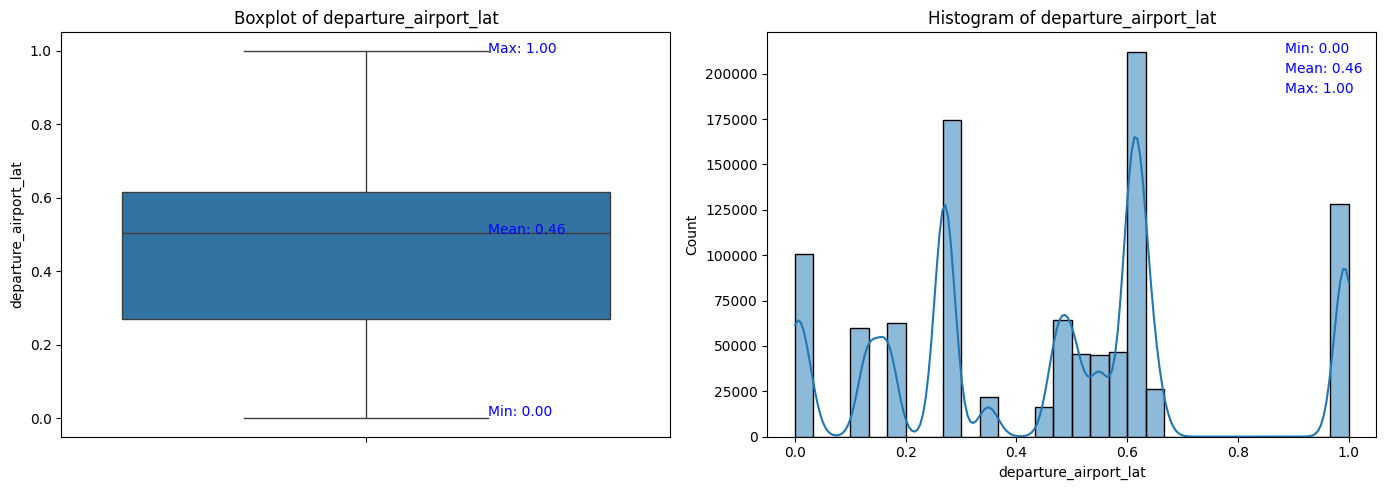

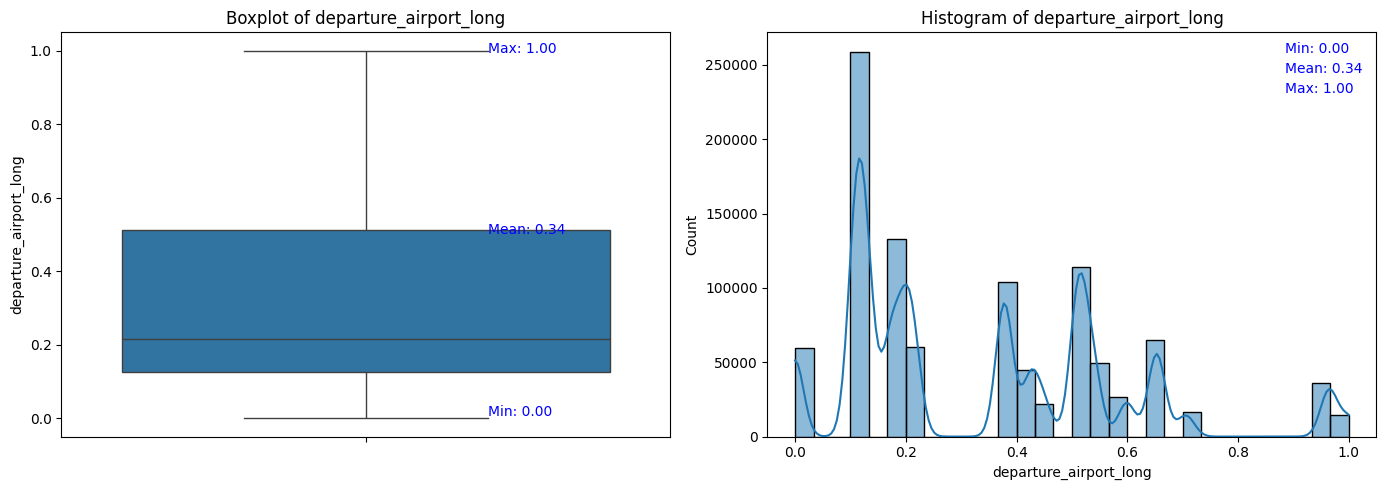

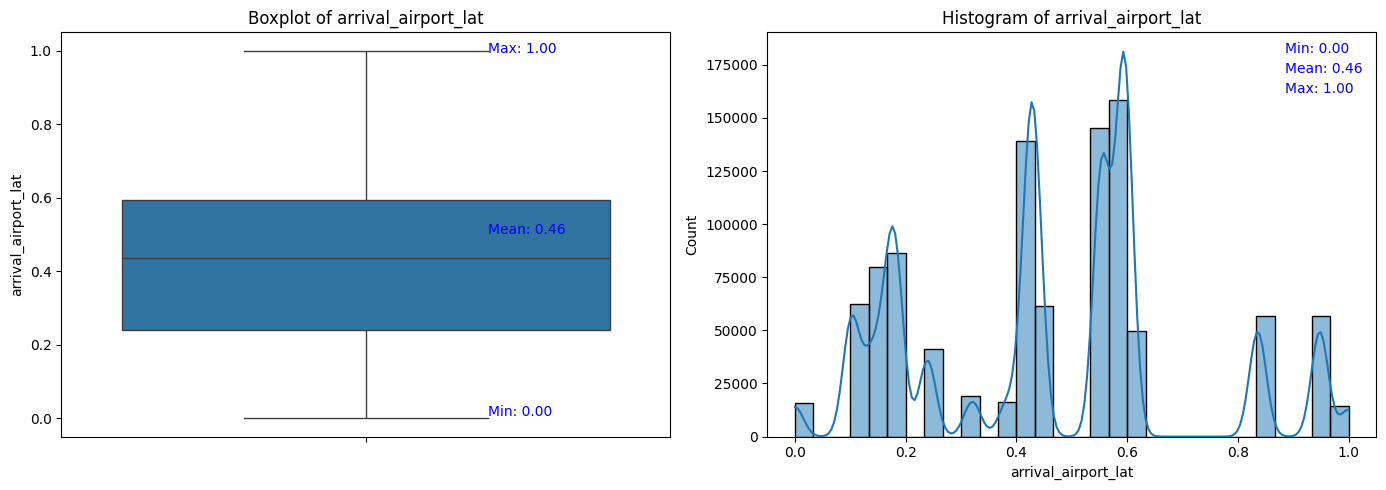

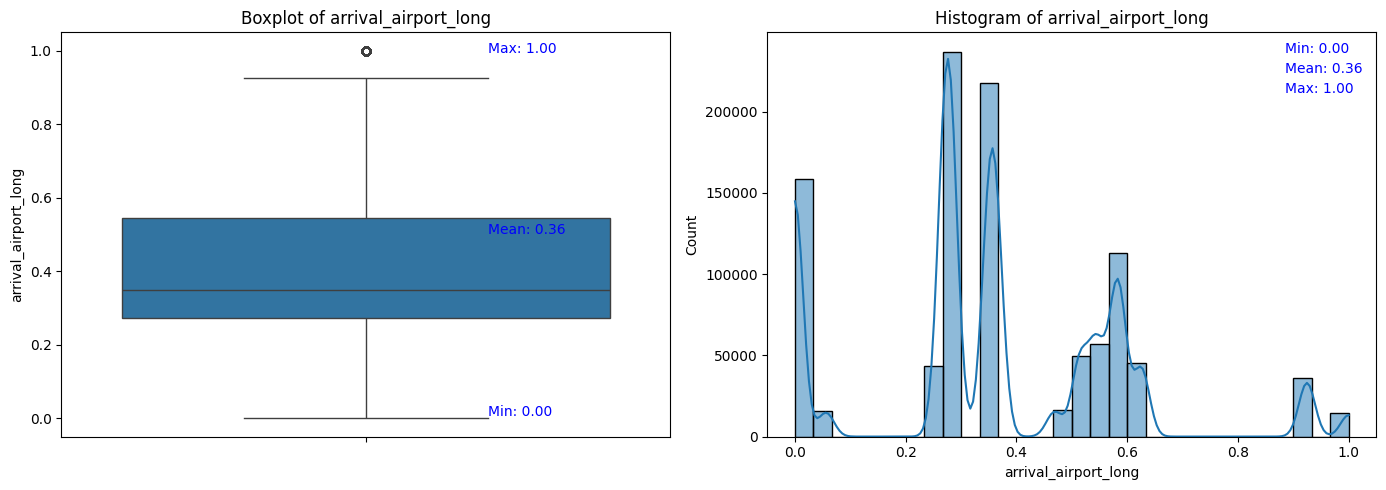

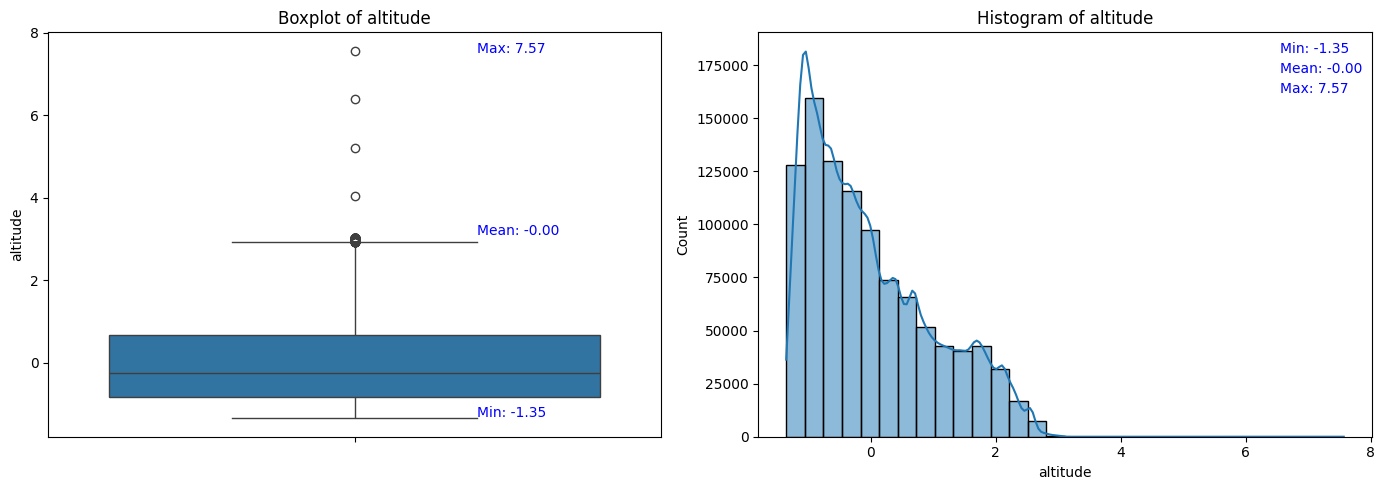

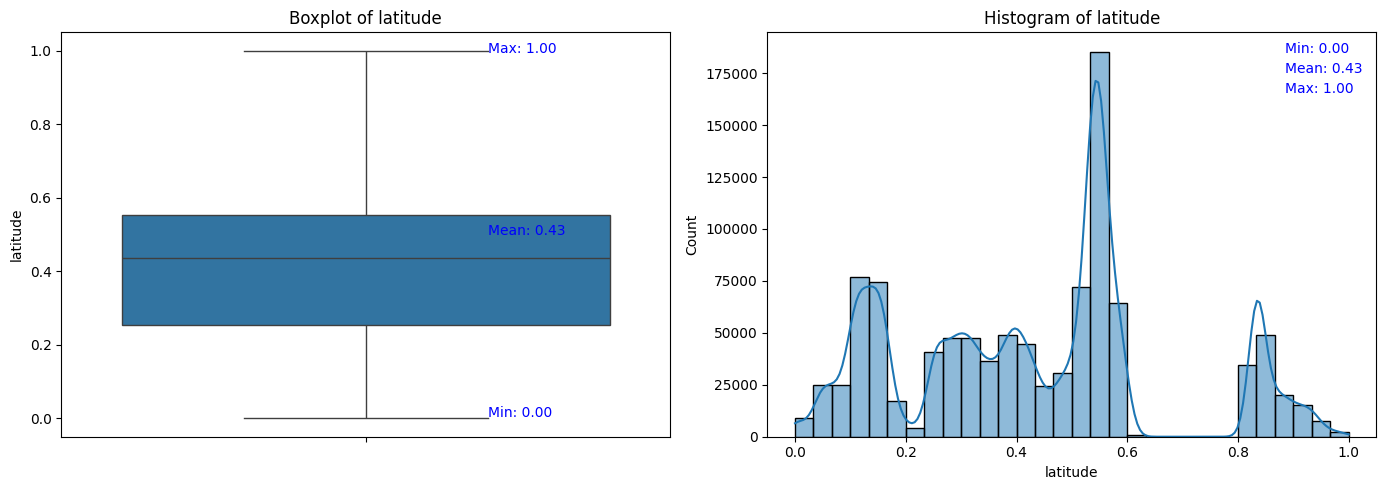

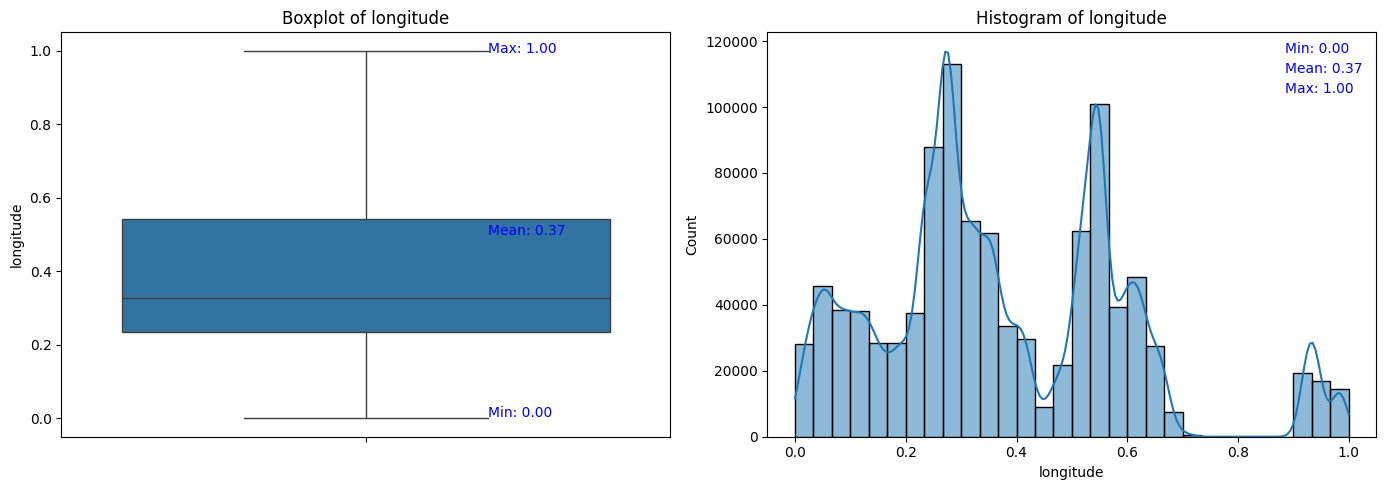

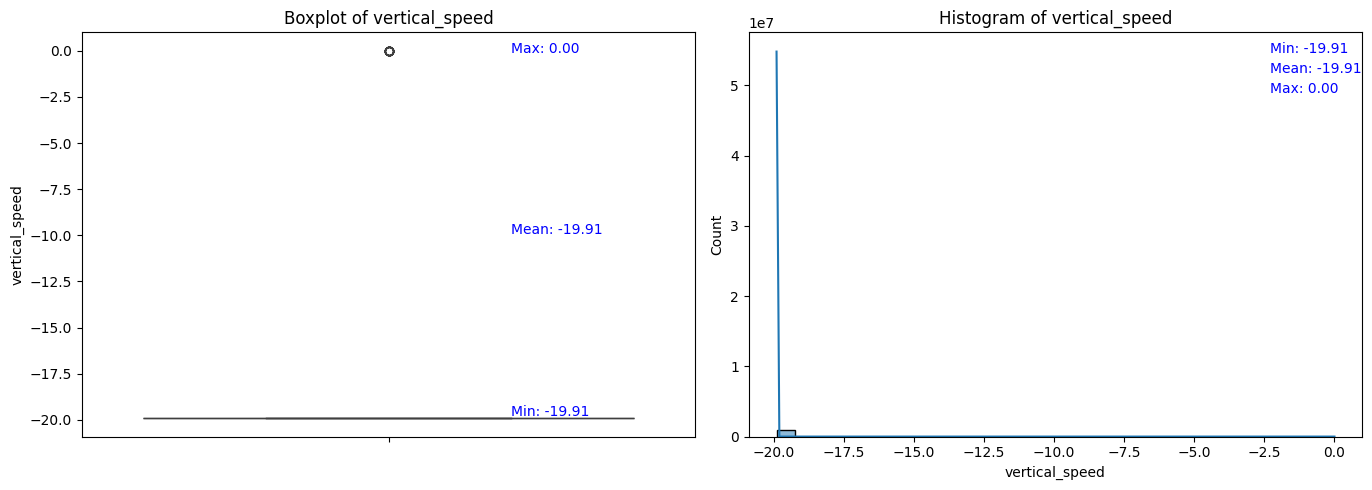

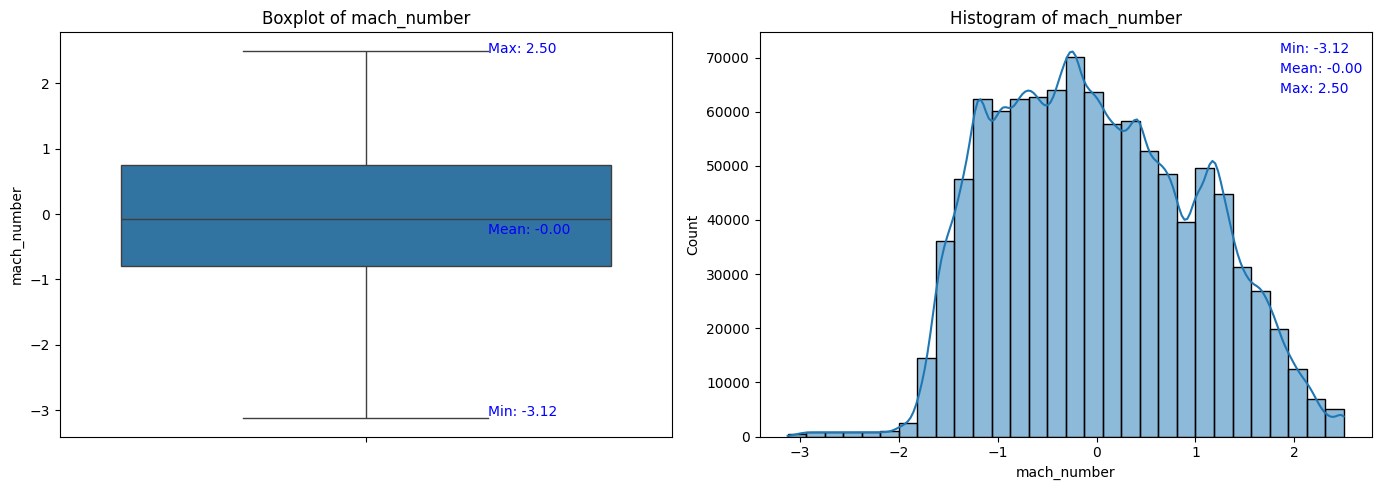

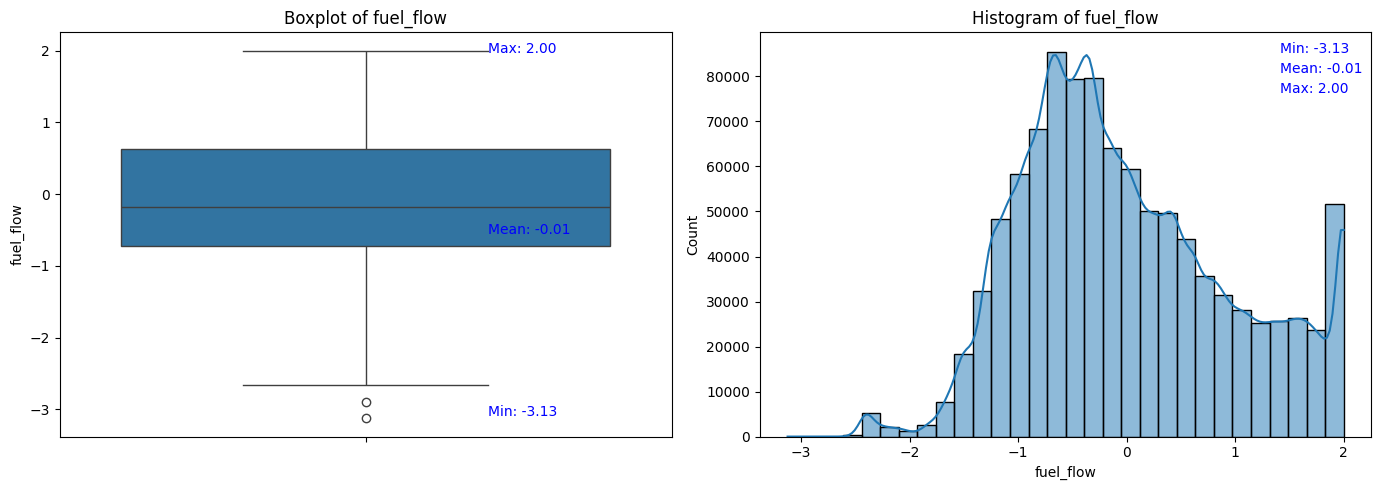

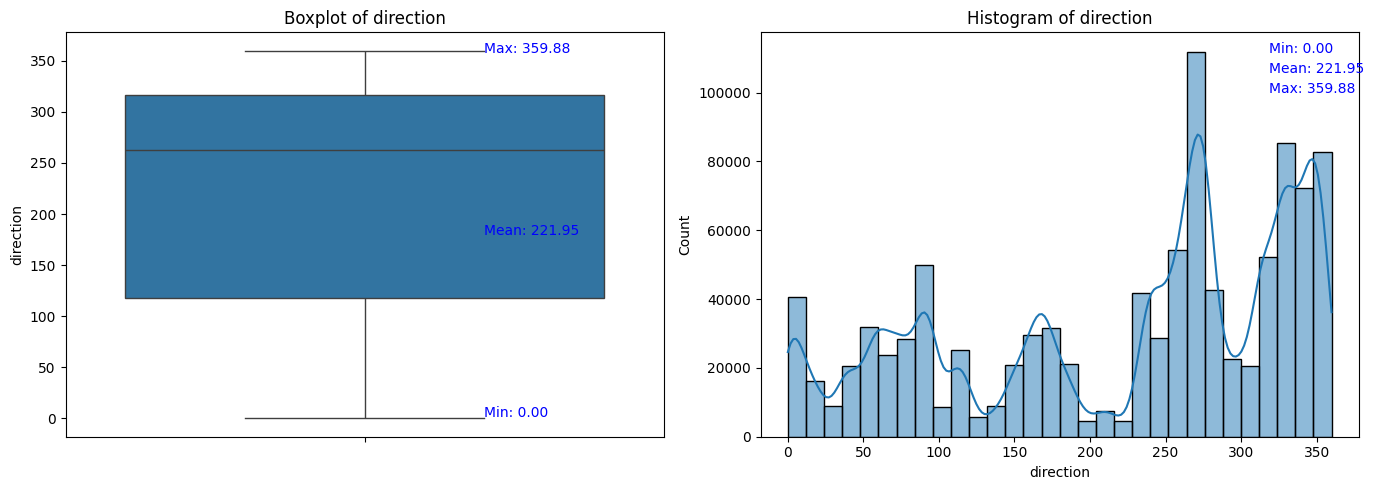

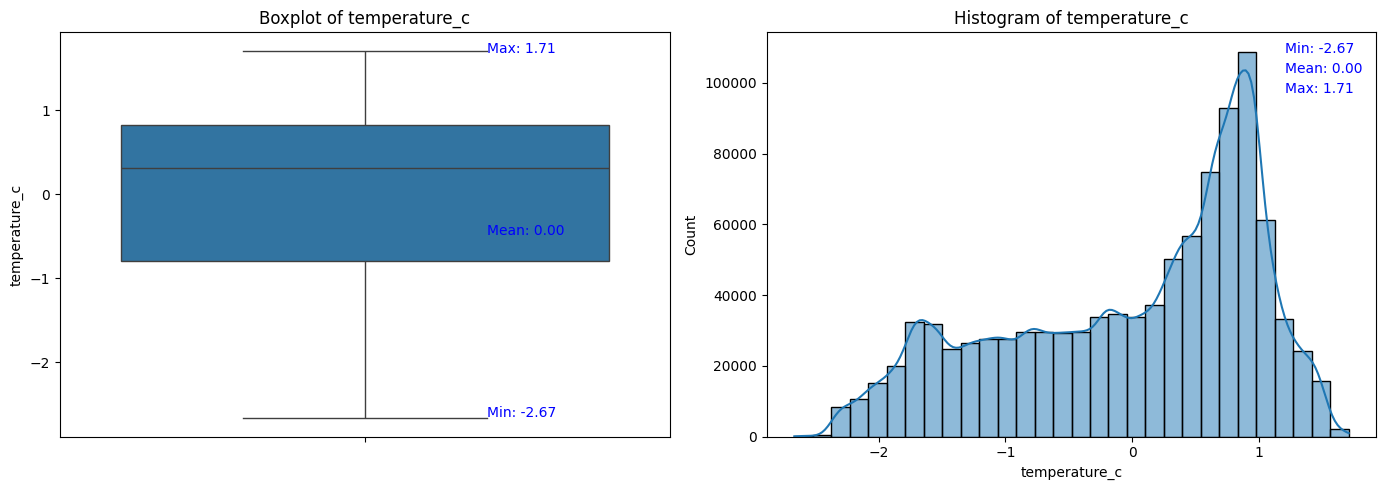

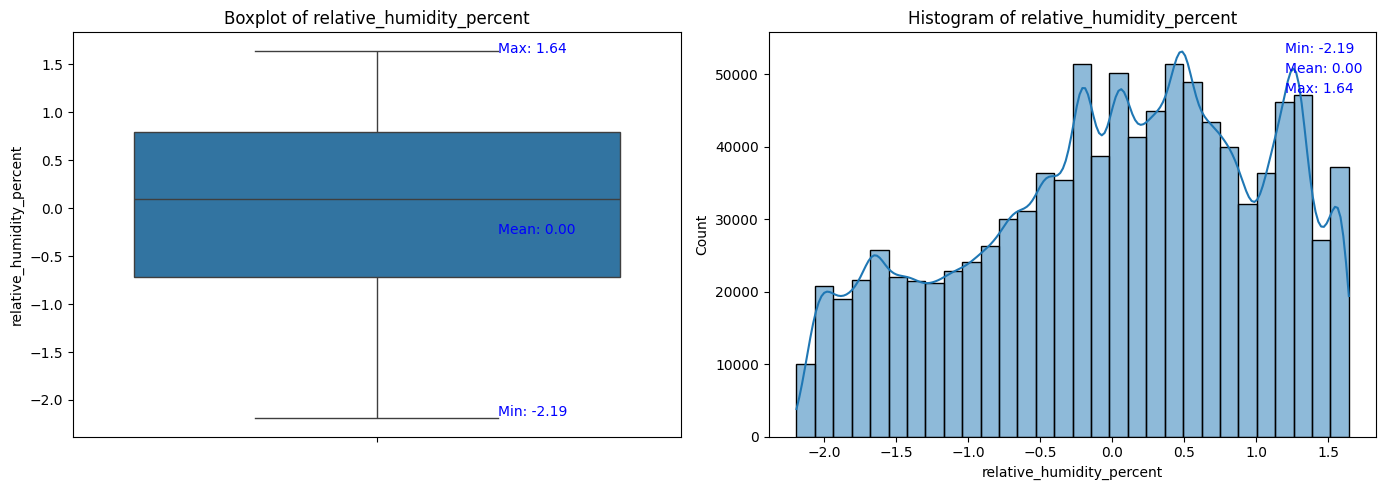

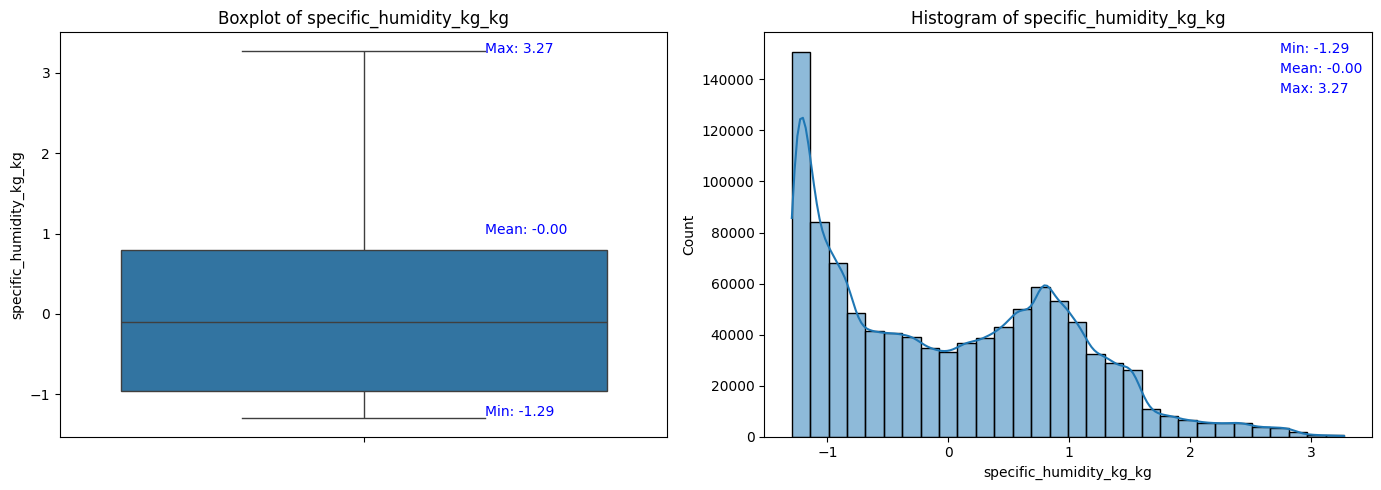

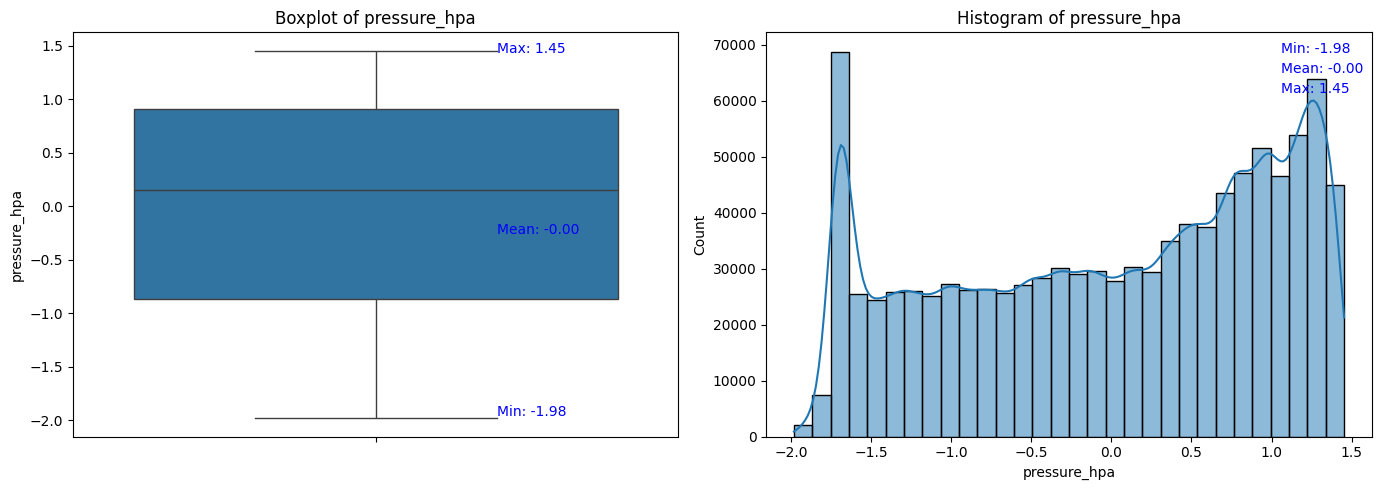

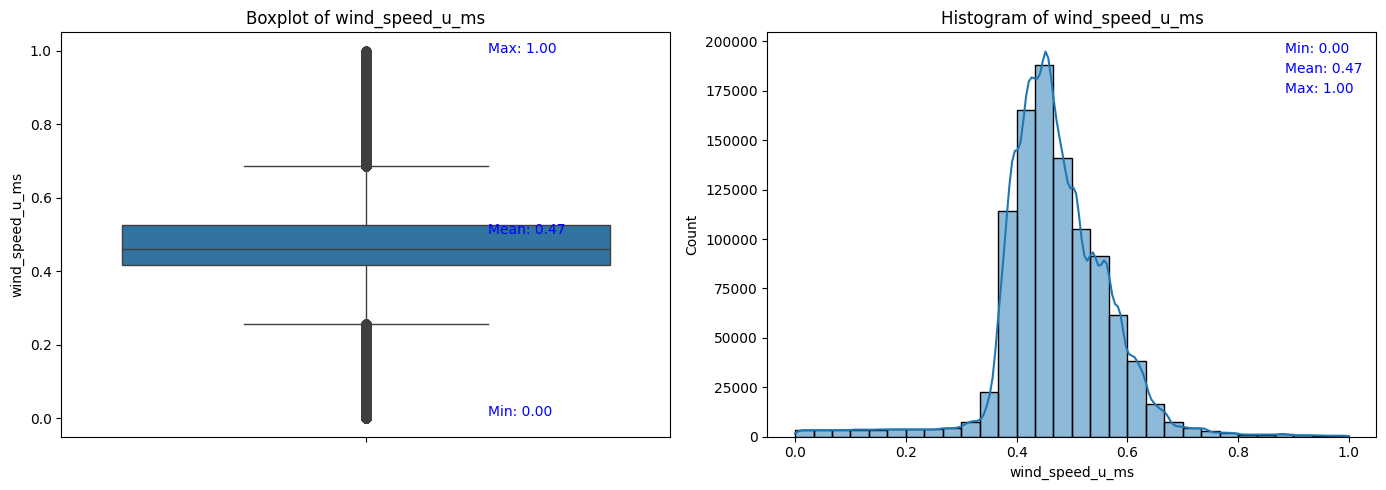

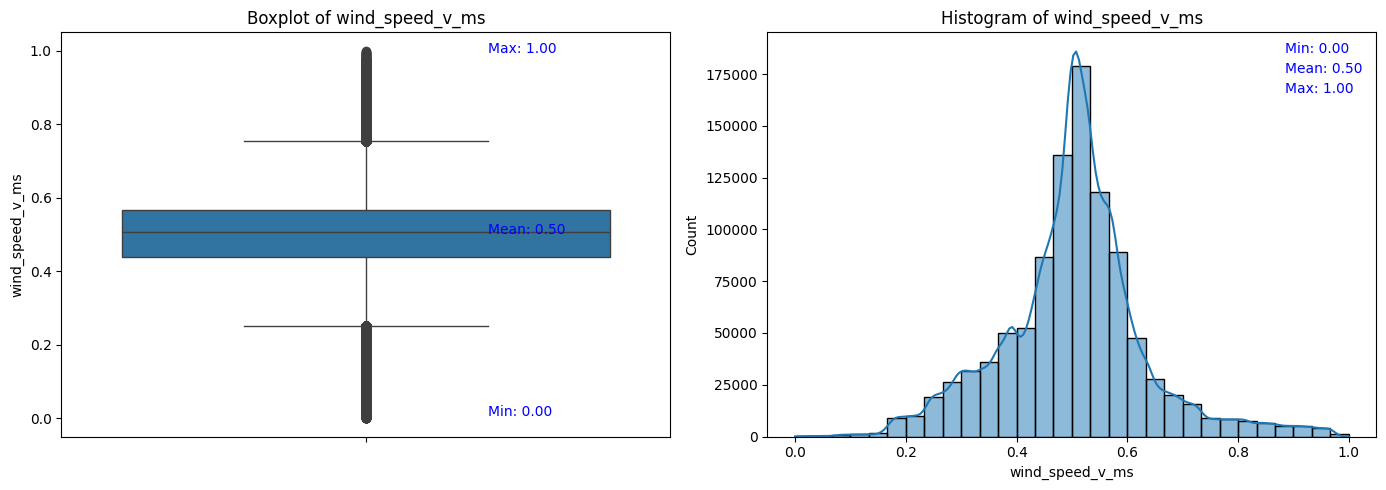

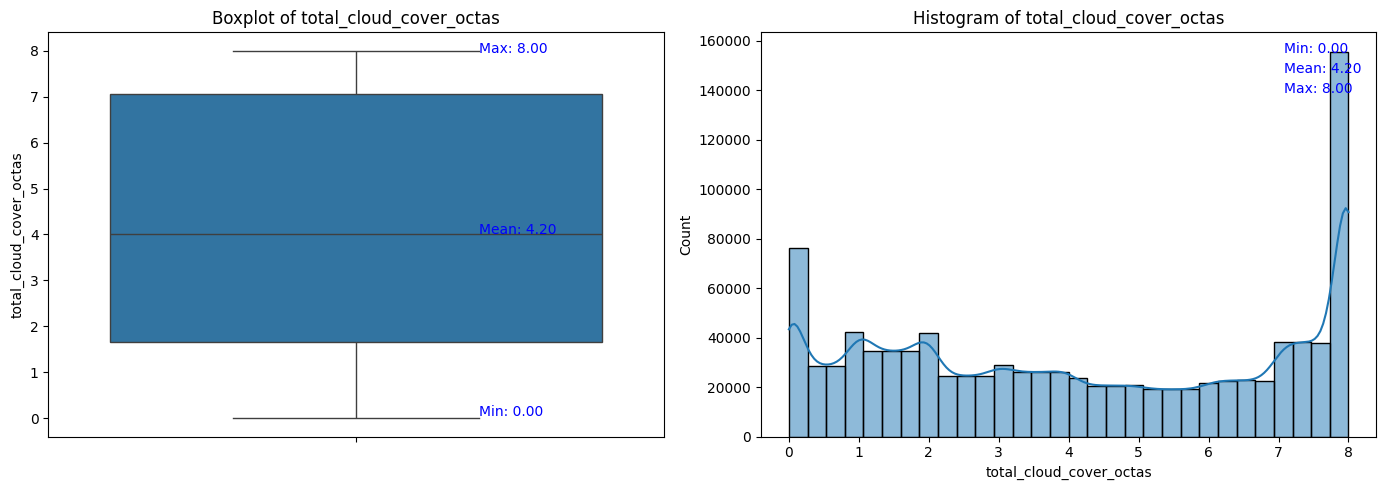

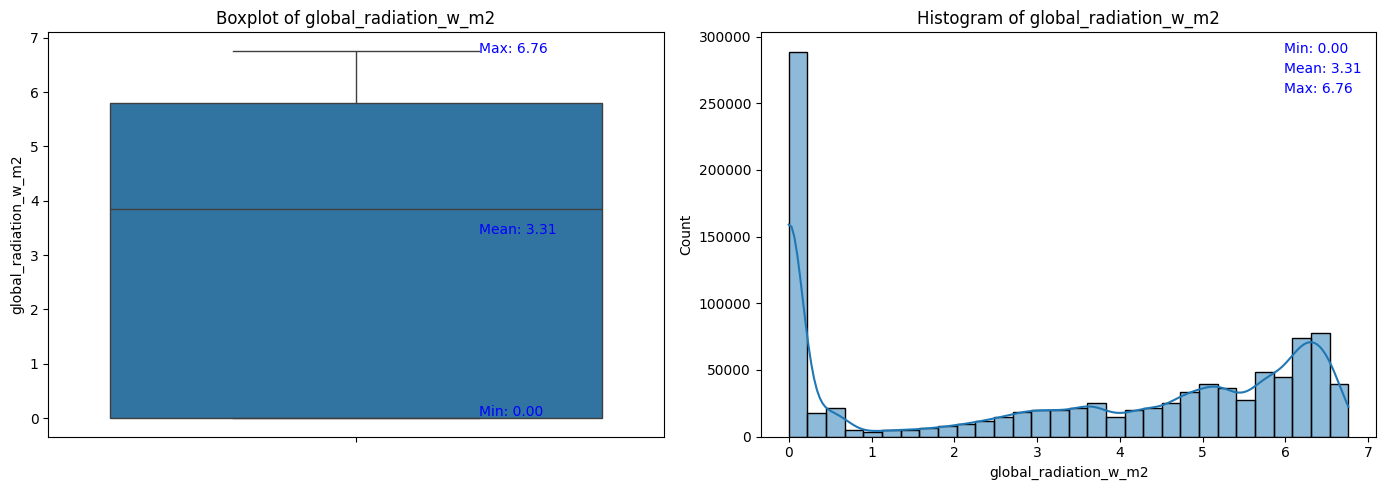

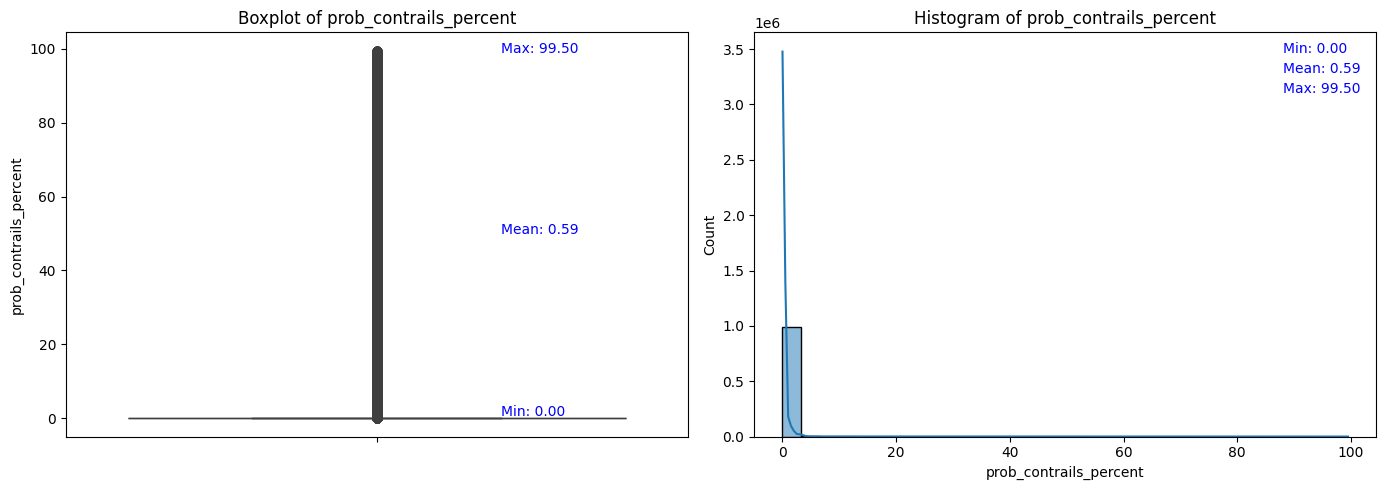

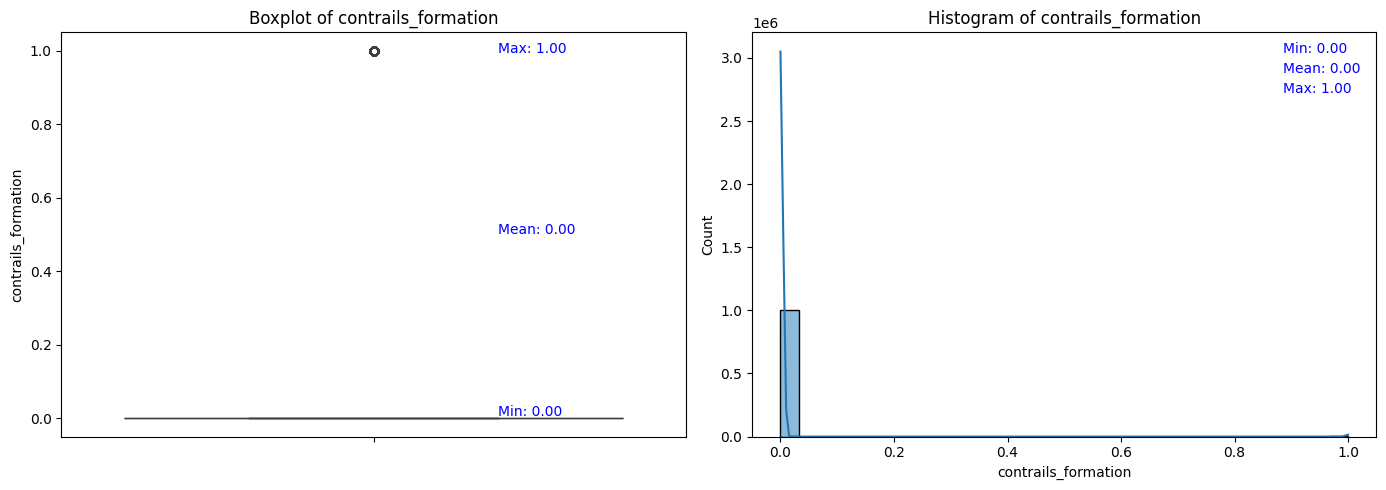

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot boxplot and histogram for each feature with legend for min, max, and mean
def plot_boxplot_and_histogram(df, columns):
    for col in columns:
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        
        # Calculate min, max, and mean
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()

        # Boxplot
        sns.boxplot(y=df[col], ax=axs[0])
        axs[0].set_title(f'Boxplot of {col}')
        axs[0].annotate(f'Min: {min_val:.2f}', xy=(0.7, 0.05), xycoords='axes fraction', color='blue')
        axs[0].annotate(f'Max: {max_val:.2f}', xy=(0.7, 0.95), xycoords='axes fraction', color='blue')
        axs[0].annotate(f'Mean: {mean_val:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', color='blue')

        # Histogram
        sns.histplot(df[col], bins=30, kde=True, ax=axs[1])
        axs[1].set_title(f'Histogram of {col}')
        axs[1].annotate(f'Min: {min_val:.2f}', xy=(0.85, 0.95), xycoords='axes fraction', color='blue')
        axs[1].annotate(f'Mean: {mean_val:.2f}', xy=(0.85, 0.90), xycoords='axes fraction', color='blue')
        axs[1].annotate(f'Max: {max_val:.2f}', xy=(0.85, 0.85), xycoords='axes fraction', color='blue')

        # Display the plots
        plt.tight_layout()
        plt.show()

numerical_training_columns = [
    
    # Static Flight Information
    'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long',
    
    # Flight Characteristics and Dynamics
    'altitude', 'latitude', 'longitude', 'vertical_speed', 'mach_number', 'fuel_flow', 'direction',

    # Meteorological and Atmospheric Features
    'temperature_c', 'relative_humidity_percent', 'specific_humidity_kg_kg', 'pressure_hpa',
    'wind_speed_u_ms', 'wind_speed_v_ms', 'total_cloud_cover_octas', 'global_radiation_w_m2',

    # Contrail Formation and Prediction
    'prob_contrails_percent', 'contrails_formation'
]

plot_boxplot_and_histogram(df_transformed, numerical_training_columns)


In [1]:
import pandas as pd
#load the transformed dataset
df_transformed = pd.read_csv("transformed_dataset_analysis.csv", index_col=0)
# Display the reordered dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_transformed.head(10))

route  departure_airport_lat  \
current_flight_time                                                 
2024-09-14 08:59:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:00:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:01:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:02:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:03:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:04:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:05:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:06:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:07:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:08:00  Athens - Thessaloniki               0.020551   

                     departure_airport_long  arrival_airport_lat  \
current_flight_time                                                
2024-09-14 08:59:00                0.964285             0.136074   
2024-09-14 09:00:00                0.964285             0.136074   
2024-09-14 09:01:00                0.964285             0.136074   
2024-09-14 09:02:00                0.964285             0.136074   
2024-09-14 09:03:00                0.964285             0.136074   
2024-09-14 09:04:00                0.964285             0.136074   
2024-09-14 09:05:00                0.964285             0.136074   
2024-09-14 09:06:00                0.964285             0.136074   
2024-09-14 09:07:00                0.964285             0.136074   
2024-09-14 09:08:00                0.964285             0.136074   

                     arrival_airport_long  altitude  latitude  longitude  \
current_flight_time                                                        
2024-09-14 08:59:00              0.924625 -0.998965  0.044906   0.946964   
2024-09-14 09:00:00              0.924625 -0.998965  0.047818   0.946853   
2024-09-14 09:01:00              0.924625 -0.998965  0.050731   0.946741   
2024-09-14 09:02:00              0.924625 -0.998965  0.053643   0.946629   
2024-09-14 09:03:00              0.924625 -0.998965  0.056555   0.946517   
2024-09-14 09:04:00              0.924625 -0.998965  0.059467   0.946405   
2024-09-14 09:05:00              0.924625 -0.998965  0.062379   0.946293   
2024-09-14 09:06:00              0.924625 -0.998965  0.065291   0.946181   
2024-09-14 09:07:00              0.924625 -0.998965  0.068204   0.946069   
2024-09-14 09:08:00              0.924625 -0.998965  0.071116   0.945957   

                     vertical_speed  mach_number  fuel_flow  direction  \
current_flight_time                                                      
2024-09-14 08:59:00             0.0    -1.026692   1.103987      208.0   
2024-09-14 09:00:00             0.0    -0.814249   0.704471      208.0   
2024-09-14 09:01:00             0.0    -0.601807   0.323439      208.0   
2024-09-14 09:02:00             0.0    -0.389364  -0.039917      208.0   
2024-09-14 09:03:00             0.0    -0.176921  -0.386462      208.0   
2024-09-14 09:04:00             0.0     0.035521  -0.717095      208.0   
2024-09-14 09:05:00             0.0     0.247964  -1.032738      208.0   
2024-09-14 09:06:00             0.0     0.460406  -1.334317      208.0   
2024-09-14 09:07:00             0.0     0.672849  -1.622750      208.0   
2024-09-14 09:08:00             0.0     0.885291  -1.898936      208.0   

                    flight_phase  temperature_c  relative_humidity_percent  \
current_flight_time                                                          
2024-09-14 08:59:00       cruise        0.57337                  -1.604985   
2024-09-14 09:00:00       cruise        0.57337                  -1.604985   
2024-09-14 09:01:00       cruise        0.57337                  -1.604985   
2024-09-14 09:02:00       cruise        0.57337                  -1.604985   
2024-09-14 09:03:00       cruise        0.57337                  -1.604985   
2024-09-14 09:04:00       cruise        0.5

In [2]:
#add the temporal features to the dataframe
import pandas as pd

# Ensure that the dataframe has a datetime index
# Ensure that the index of the dataframe is a datetime type
def ensure_datetime_index(df : pd.DataFrame) -> pd.DataFrame:
    """
    Ensures that the dataframe index is a DatetimeIndex.
    
    Args:
        df (pd.DataFrame): The input dataframe with a datetime index.
    
    Returns:
        pd.DataFrame: The dataframe with a DatetimeIndex.
    """
    # Check if the index is already in datetime format
    if not isinstance(df.index, pd.DatetimeIndex):
        # Convert the index to datetime
        df.index = pd.to_datetime(df.index, errors='coerce')
        
    return df

def add_time_based_features(df : pd.DataFrame) -> pd.DataFrame:
    """
    Adds common time-based features to the dataframe based on its datetime index.

    Args:
        df (pd.DataFrame): The input dataframe with a datetime index.

    Returns:
        pd.DataFrame: The dataframe with additional time-based features.
    """
    # Ensure the dataframe index is datetime type
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("Dataframe index must be a DatetimeIndex")

    # Add standard time-based features
    df['hour_of_day'] = df.index.hour                 # Extract the hour (0-23)
    df['day_of_week'] = df.index.dayofweek            # Extract day of the week (0=Monday, ..., 6=Sunday)
    df['day_of_month'] = df.index.day                 # Extract the day of the month
    df['week_of_year'] = df.index.isocalendar().week  # Extract the week of the year (ISO standard)
    df['month'] = df.index.month                      # Extract the month (1-12)
    df['quarter'] = df.index.quarter                  # Extract the quarter (1-4)
    df['year'] = df.index.year                        # Extract the year

    # Additional boolean features
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Weekend flag (Saturday=5, Sunday=6)
    df['is_night'] = df['hour_of_day'].apply(lambda x: 1 if x < 6 or x > 18 else 0)  # Night hours (Before 6 AM or After 6 PM)

    return df

# Example usage
# Assuming df_transformed is your dataframe and 'current_flight_time' is the column with datetime values
df_transformed = ensure_datetime_index(df_transformed)

# Now you can apply the time-based feature extraction function
df_transformed = add_time_based_features(df_transformed)

# Display the first 10 rows with the new features
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_transformed.head(10))

route  departure_airport_lat  \
current_flight_time                                                 
2024-09-14 08:59:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:00:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:01:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:02:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:03:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:04:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:05:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:06:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:07:00  Athens - Thessaloniki               0.020551   
2024-09-14 09:08:00  Athens - Thessaloniki               0.020551   

                     departure_airport_long  arrival_airport_lat  \
current_flight_time                                                
2024-09-14 08:59:00                0.964285             0.136074   
2024-09-14 09:00:00                0.964285             0.136074   
2024-09-14 09:01:00                0.964285             0.136074   
2024-09-14 09:02:00                0.964285             0.136074   
2024-09-14 09:03:00                0.964285             0.136074   
2024-09-14 09:04:00                0.964285             0.136074   
2024-09-14 09:05:00                0.964285             0.136074   
2024-09-14 09:06:00                0.964285             0.136074   
2024-09-14 09:07:00                0.964285             0.136074   
2024-09-14 09:08:00                0.964285             0.136074   

                     arrival_airport_long  altitude  latitude  longitude  \
current_flight_time                                                        
2024-09-14 08:59:00              0.924625 -0.998965  0.044906   0.946964   
2024-09-14 09:00:00              0.924625 -0.998965  0.047818   0.946853   
2024-09-14 09:01:00              0.924625 -0.998965  0.050731   0.946741   
2024-09-14 09:02:00              0.924625 -0.998965  0.053643   0.946629   
2024-09-14 09:03:00              0.924625 -0.998965  0.056555   0.946517   
2024-09-14 09:04:00              0.924625 -0.998965  0.059467   0.946405   
2024-09-14 09:05:00              0.924625 -0.998965  0.062379   0.946293   
2024-09-14 09:06:00              0.924625 -0.998965  0.065291   0.946181   
2024-09-14 09:07:00              0.924625 -0.998965  0.068204   0.946069   
2024-09-14 09:08:00              0.924625 -0.998965  0.071116   0.945957   

                     vertical_speed  mach_number  fuel_flow  direction  \
current_flight_time                                                      
2024-09-14 08:59:00             0.0    -1.026692   1.103987      208.0   
2024-09-14 09:00:00             0.0    -0.814249   0.704471      208.0   
2024-09-14 09:01:00             0.0    -0.601807   0.323439      208.0   
2024-09-14 09:02:00             0.0    -0.389364  -0.039917      208.0   
2024-09-14 09:03:00             0.0    -0.176921  -0.386462      208.0   
2024-09-14 09:04:00             0.0     0.035521  -0.717095      208.0   
2024-09-14 09:05:00             0.0     0.247964  -1.032738      208.0   
2024-09-14 09:06:00             0.0     0.460406  -1.334317      208.0   
2024-09-14 09:07:00             0.0     0.672849  -1.622750      208.0   
2024-09-14 09:08:00             0.0     0.885291  -1.898936      208.0   

                    flight_phase  temperature_c  relative_humidity_percent  \
current_flight_time                                                          
2024-09-14 08:59:00       cruise        0.57337                  -1.604985   
2024-09-14 09:00:00       cruise        0.57337                  -1.604985   
2024-09-14 09:01:00       cruise        0.57337                  -1.604985   
2024-09-14 09:02:00       cruise        0.57337                  -1.604985   
2024-09-14 09:03:00       cruise        0.57337                  -1.604985   
2024-09-14 09:04:00       cruise        0.5

: 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode Categorical Columns
# Encode 'route' and 'flight_phase' to integers
route_encoder = LabelEncoder()
df_transformed['route_encoded'] = route_encoder.fit_transform(df_transformed['route'])

flight_phase_encoder = LabelEncoder()
df_transformed['flight_phase_encoded'] = flight_phase_encoder.fit_transform(df_transformed['flight_phase'])

# Step 2: Adjust Sequence Creation Function to Handle Categorical Features
def create_sequences_with_categorical(data, seq_length, target_column_index, categorical_indices):
    """
    Create sequences for the LSTM model with categorical features.
    Args:
        data (np.array): The input feature data.
        seq_length (int): The number of time steps in each sequence.
        target_column_index (int): The index of the target column in the data.
        categorical_indices (list): Indices of categorical columns.

    Returns:
        (X, y, X_cat): Sequences of input data, corresponding targets, and categorical columns.
    """
    X, y, X_cat = [], [], []
    for i in range(len(data) - seq_length):
        seq_data = data[i:i+seq_length]
        X.append(np.delete(seq_data, target_column_index, axis=1))  # Exclude target for X
        y.append(data[i+seq_length, target_column_index])  # Target values

        # Extract categorical features for the sequence
        X_cat.append(seq_data[:, categorical_indices].astype(int))  # Use only categorical indices
    return np.array(X), np.array(y), np.array(X_cat)

# Step 3: Define Target and Categorical Columns
target_column = 'contrails_formation'
categorical_columns = ['route_encoded', 'flight_phase_encoded']
target_column_index = df_transformed.columns.get_loc(target_column)
categorical_indices = [df_transformed.columns.get_loc(col) for col in categorical_columns]

# Create Sequences with Categorical Features
seq_length = 10
data = df_transformed.values
X, y, X_cat = create_sequences_with_categorical(data, seq_length, target_column_index, categorical_indices)

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_cat_train, X_cat_test = train_test_split(X_cat, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_cat_train_tensor = torch.tensor(X_cat_train, dtype=torch.long)  # Categorical tensor (long for embedding layer)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_cat_test_tensor = torch.tensor(X_cat_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Step 4: Define the LSTM Model with Embedding Layers
class LSTMWithEmbeddings(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, route_vocab_size, flight_phase_vocab_size, embedding_dim=5):
        super(LSTMWithEmbeddings, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Embedding layers for categorical features
        self.route_embedding = nn.Embedding(route_vocab_size, embedding_dim)
        self.flight_phase_embedding = nn.Embedding(flight_phase_vocab_size, embedding_dim)

        # Adjusted input size to account for additional embedding dimensions
        self.lstm = nn.LSTM(input_size + 2 * embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Single output for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, x_cat):
        # Get embeddings for categorical features
        route_embedded = self.route_embedding(x_cat[:, :, 0])
        flight_phase_embedded = self.flight_phase_embedding(x_cat[:, :, 1])

        # Concatenate embeddings with continuous features
        x = torch.cat((x, route_embedded, flight_phase_embedded), dim=-1)

        # Initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Output of the last LSTM cell
        return self.sigmoid(out)

# Step 5: Initialize the Model
route_vocab_size = len(route_encoder.classes_)
flight_phase_vocab_size = len(flight_phase_encoder.classes_)

model = LSTMWithEmbeddings(input_size=X.shape[2], hidden_size=64, num_layers=2,
                           route_vocab_size=route_vocab_size, flight_phase_vocab_size=flight_phase_vocab_size)

# Device management for GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X_train_tensor = X_train_tensor.to(device)
X_cat_train_tensor = X_cat_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
X_cat_test_tensor = X_cat_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Step 6: Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 7: Training Loop
num_epochs = 50
batch_size = 64

for epoch in range(num_epochs):
    model.train()  
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        X_cat_batch = X_cat_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_batch, X_cat_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))  # Binary classification loss
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [27]:
#import pandas as pd

# Load the dataframe
#file_path = "./filtered_df_fuel_emissions_filled.csv"
#df = pd.read_csv(file_path, index_col="current_flight_time", parse_dates=True)
# Constants
#g = 9.81  # Gravitational acceleration in m/s²
#R = 287.05  # Specific gas constant for dry air in J/(kg·K)

# Ensure required columns exist in the dataframe
#required_columns = ['pressure_hpa', 'temperature_c', 'vertical_speed', 'altitude', 'geopotential_height_m']
#if not all(col in df.columns for col in required_columns):
    #raise ValueError(f"Missing required columns from dataframe: {required_columns}")

# Step 1: Convert units where necessary
#df['pressure_pa'] = df['pressure_hpa'] * 100  # Convert pressure from hPa to Pa
#df['temperature_k'] = df['temperature_c'] + 273.15  # Convert temperature from °C to Kelvin

# Step 2: Calculate air density using the ideal gas law
#df['air_density'] = df['pressure_pa'] / (R * df['temperature_k'])  # Calculate air density in kg/m³

# Step 3: Compute lagrangian tendency of air pressure (omega)
#df['lagrangian_tendency_of_air_pressure'] = -1 * df['air_density'] * g * df['vertical_speed']

# Step 4: Display the updated dataframe with the new column
#df[['pressure_hpa', 'temperature_c', 'vertical_speed', 'air_density', 'lagrangian_tendency_of_air_pressure']].head(10)
#filtered_df = df
#save the filtered_df to a csv file in the current directory
#filtered_df.to_csv('./filtered_df_lagrangian_tendency.csv')


In [28]:
#import pandas as pd
#import xarray as xr
#from pycontrails import MetDataset, Flight
#from pycontrails.models.cocip import Cocip
#from pycontrails.models.humidity_scaling import ConstantHumidityScaling

# Load the dataframe
#filtered_df = pd.read_csv('./filtered_df_lagrangian_tendency.csv', index_col="current_flight_time", parse_dates=True)

# Ensure 'level' column exists and is defined by 'altitude'
#filtered_df['level'] = filtered_df['altitude']

# Add a placeholder value for 'tau_cirrus'
#filtered_df['tau_cirrus'] = 0.1  # Default placeholder value for optical depth

# Rename wind columns to match the expected CoCiP variable names
#filtered_df = filtered_df.rename(columns={
    #"wind_speed_u_ms": "eastward_wind",
    #"wind_speed_v_ms": "northward_wind"
#})

# Prepare columns for results
#filtered_df['contrail_ef'] = None
#filtered_df['contrail_persistent'] = None

# Iterate through each row to process individually with the CoCiP model
#for idx, row in filtered_df.iterrows():
    #try:
        # Create a minimal xarray Dataset for this row's meteorological and radiation data
        #met_data = xr.Dataset(
            #{
                #"air_temperature": (["time", "level", "latitude", "longitude"], [[[[row['temperature_c']]]]]),
                #"specific_humidity": (["time", "level", "latitude", "longitude"], [[[[row['specific_humidity_kg_kg']]]]]),
                #"eastward_wind": (["time", "level", "latitude", "longitude"], [[[[row['eastward_wind']]]]]),
                #"northward_wind": (["time", "level", "latitude", "longitude"], [[[[row['northward_wind']]]]]),
                #"geopotential_height": (["time", "level", "latitude", "longitude"], [[[[row['geopotential_height_m']]]]]),
                #"cloud_cover": (["time", "level", "latitude", "longitude"], [[[[row['total_cloud_cover_octas']]]]]),
                #"lagrangian_tendency_of_air_pressure": (["time", "level", "latitude", "longitude"], [[[[row['lagrangian_tendency_of_air_pressure']]]]]),
                # Use global radiation data to populate the radiation variables
                #"top_net_solar_radiation": (["time", "latitude", "longitude"], [[[row['global_radiation_w_m2']]]]),  # Placeholder for `tsr`
                #"toa_upward_shortwave_flux": (["time", "latitude", "longitude"], [[[0.0]]]),  # Set zero if no data is available
                #"toa_incoming_shortwave_radiation": (["time", "latitude", "longitude"], [[[row['global_radiation_w_m2']]]]),  # Placeholder for `iswrf`
                #"tau_cirrus": (["time", "level", "latitude", "longitude"], [[[[row['tau_cirrus']]]]]),  # Use placeholder value
            #},
            #coords={
                #"time": [idx],
                #"level": [row['level']],
                #"latitude": [row['latitude']],
                #"longitude": [row['longitude']],
            #},
        #)

        # Create a MetDataset for CoCiP
        #met_dataset = MetDataset(met_data)

        # Create a minimal Flight object for this point
        #flight_data = pd.DataFrame({
            #'latitude': [row['latitude']],
            #'longitude': [row['longitude']],
            #'altitude': [row['altitude']],
            #'time': [idx],
        #})

        #flight_attrs = {
            #"flight_id": row['flight_id'],
            #"aircraft_type": row['aircraft_type'],
            #"n_engine": row['aircraft_num_engines'],
            #"true_airspeed": row['true_airspeed_ms'],
        #}

        #flight_point = Flight(data=flight_data, attrs=flight_attrs)

        # Initialize and run CoCiP model for this point
        #cocip = Cocip(met=met_dataset, rad=met_dataset, params={
            #"dt_integration": pd.to_timedelta("10m"),
            #"humidity_scaling": ConstantHumidityScaling(rhi_adj=0.99),
        #})

        #output_flight = cocip.eval(source=flight_point)

        # Store results in the dataframe
        #filtered_df.at[idx, 'contrail_ef'] = output_flight.get('ef', None)
        #filtered_df.at[idx, 'contrail_persistent'] = output_flight.get('persistent', None)

        #print(f"Successfully processed row: {idx}")

    #except Exception as e:
        #print(f"Error processing row at index {idx}: {e}")

# Save the final DataFrame or display a sample
#filtered_df.to_csv('./filtered_df_with_contrail_outputs.csv')
#print("Processing completed. Outputs saved to 'filtered_df_with_contrail_outputs.csv'.")


In [29]:
#import pandas as pd
#from pycontrails import Flight
#from pycontrails.models.ps_model import PSFlight

# Function to calculate aircraft performance and add the outputs to the original dataframe
#def calculate_aircraft_performance_and_add_columns(df : pd.DataFrame) -> pd.DataFrame:
    # Create empty lists to store outputs for each point
    #fuel_flow_list = []
    #engine_efficiency_list = []
    #aircraft_mass_list = []
    #thrust_list = []

    # Get a list of unique flight IDs (assuming each flight has a unique 'flight_id')
    #unique_flight_ids = df['flight_id'].unique()

    # Loop through each flight
    #for flight_id in unique_flight_ids:
        # Filter the dataframe to get the data for this specific flight
        #flight_df = df[df['flight_id'] == flight_id]

        # Create the attributes for the flight based on the first row
        #attrs = {
            #"flight_id": flight_id,
            #"aircraft_type": flight_df['aircraft_type'].iloc[0],     # Mapped aircraft type
            #"aircraft_mtow_kg": flight_df['aircraft_mtow_kg'].iloc[0],  # Max Takeoff Weight
            #"aircraft_num_engines": flight_df['aircraft_num_engines'].iloc[0],  # Number of engines
        #}

        # Loop through each flight point to capture dynamic values
        #for index, row in flight_df.iterrows():
            #dynamic_attrs = {
                #"altitude": row['altitude'],                    # Altitude at the current point
                #"air_temperature": row['temperature_c'],        # Air temperature at the current point
                #"mach_number": row['mach_number'],              # Mach number at the current point
                #"true_airspeed_ms": row['true_airspeed_ms'],    # True airspeed at the current point
                #"pressure_hpa": row['pressure_hpa'],            # Atmospheric pressure at the current point
                #"longitude": row['longitude'],                  # Longitude of the aircraft
                #"latitude": row['latitude'],                    # Latitude of the aircraft
                #"time": row.name,                               # Using current_flight_time as the time, since it's the index
            #}

            # Merge static and dynamic attributes
            #full_attrs = {**attrs, **dynamic_attrs}

            # Ensure that the required keys are included in the data
            #flight_point_data = pd.DataFrame({
                #'longitude': [row['longitude']],
                #'latitude': [row['latitude']],
                #'altitude': [row['altitude']],
                #'time': [row.name]  # Using the index as the time
            #})

            # Create the Flight object using the row's data and full attributes
            #flight_point = Flight(data=flight_point_data, attrs=full_attrs)  # Convert row to DataFrame

            # Initialize the Poll-Schumann flight model
            #ps_model = PSFlight(
                #fill_low_altitude_with_isa_temperature=True,  # Estimate temperature using ISA
                #fill_low_altitude_with_zero_wind=True,        # Estimate airspeed from groundspeed
            #)

            # Evaluate the flight performance for the current point
            #out = ps_model.eval(flight_point)

            # Extract the desired outputs and append them to the corresponding lists
            #fuel_flow_list.append(out.dataframe['fuel_flow'].values[0])
            #engine_efficiency_list.append(out.dataframe['engine_efficiency'].values[0])
            #aircraft_mass_list.append(out.dataframe['aircraft_mass'].values[0])
            #thrust_list.append(out.dataframe['thrust'].values[0])

    # Add the extracted outputs as new columns to the original dataframe
    #df['fuel_flow'] = fuel_flow_list
    #df['engine_efficiency'] = engine_efficiency_list
    #df['aircraft_mass'] = aircraft_mass_list
    #df['thrust'] = thrust_list

    # Return the updated dataframe with new columns
    #return df

# Apply this function to your flight data dataframe
#performance_df = calculate_aircraft_performance_and_add_columns(filled_df)

#with pd.option_context('display.max_rows', None):
    #display(performance_df.head(10))
